# Outline

- [Preparations](#Preparations)
- [Building DecisionTree/LogisticRegression/KNN/SVM/Forest model](#Building-DecisionTree/LogisticRegression/KNN/SVM/Forest-models)
- [Input and preview datasets](#Input-and-preview-datasets)
- [Data preprocessing](#Data-preprocessing)
- [DecisionTree](#DecisionTree)
    - [Learning curve of DecisionTree](#Learning-curve-of-DecisionTree)
    - [ROC & AUC of DecisionTree](#ROC-&-AUC-of-DecisionTree)
- [LogisticRegression](#LogisticRegression)
    - [Learning curve of LogisticRegression](#Learning-curve-of-LogisticRegression)
    - [ROC & AUC of LogisticRegression](#ROC-&-AUC-of-LogisticRegression)
- [KNN](#KNN)
    - [Learning curve of KNN](#Learning-curve-of-KNN)
    - [ROC & AUC of KNN](#ROC-&-AUC-of-KNN)
- [SVM](#SVM)
    - [Learning curve of SVM](#Learning-curve-of-SVM)
    - [ROC & AUC of SVM](#ROC-&-AUC-of-SVM)
- [RandomForest](#RandomForest)
    - [Learning curve of RandomForest](#Learning-curve-of-RandomForest)
    - [ROC & AUC of RandomForest](#ROC-&-AUC-of-RandomForest)


# Preparations

In [587]:
from sklearn import datasets
from sklearn.metrics import roc_curve, auc
from scipy import interp

import numpy as np
import array
import pandas as pd
import random
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.pipeline import make_pipeline
from sklearn.learning_curve import learning_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap

from sklearn.cross_validation import StratifiedKFold
from sklearn.cross_validation import cross_val_score

In [588]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

# Building DecisionTree/LogisticRegression/KNN/SVM/Forest models

In [589]:
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=4, 
                              random_state=1)

lr=LogisticRegression(penalty='l2',random_state=1)

knn = KNeighborsClassifier(n_neighbors=5, 
                           p=2, 
                           metric='minkowski')


svm = SVC(kernel='rbf', C=10, random_state=1)

forest = RandomForestClassifier(criterion='gini',
                                n_estimators=25, 
                                random_state=1,
                                n_jobs=2)

# Input and preview datasets

In [590]:
WdbsData=pd.read_csv('./WdbsData.csv',sep=',')
number=400
WdbsData=WdbsData.sample(number)
list1 = ["radius mean","texture mean","perimeter mean","area mean","smoothness mean","compactness mean","concavity mean",
         "concave points mean","symmetry  mean","fractal dimension mean","radius sde","texture sde","perimeter sde",
         "area sde","smoothness sde","compactness sde","concavity sde","concave points sde","symmetry  sde",
         "fractal dimension sde","radius worst","texture worst","perimeter worst","area worst","smoothness worst",
         "compactness worst","concavity worst","concave points worst","symmetry  worst","fractal dimension worst"]

WdbsData.head()

diagnosis  radius mean  texture mean  perimeter mean  area mean  \
115         B       11.340         21.26           72.48      396.5   
375         B       14.590         22.68           96.39      657.1   
108         B        6.981         13.43           43.79      143.5   
307         B       14.530         13.98           93.86      644.2   
79          M       19.210         18.57          125.50     1152.0   

     smoothness mean  compactness mean  concavity mean  concave points mean  \
115          0.08759           0.06575         0.05133              0.01899   
375          0.08473           0.13300         0.10290              0.03736   
108          0.11700           0.07568         0.00000              0.00000   
307          0.10990           0.09242         0.06895              0.06495   
79           0.10530           0.12670         0.13230              0.08994   

     symmetry  mean           ...             radius worst  texture worst  \
115          0.1487           ...                    13.01          29.15   
375          0.1454           ...                    15.48          27.27   
108          0.1930           ...                     7.93          19.54   
307          0.1650           ...                    15.80          16.93   
79           0.1917           ...                    26.14          28.14   

     perimeter worst  area worst  smoothness worst  compactness worst  \
115            83.99       518.1            0.1699             0.2196   
375           105.90       733.5            0.1026             0.3171   
108            50.41       185.2            0.1584             0.1202   
307           103.10       749.9            0.1347             0.1478   
79            170.10      2145.0            0.1624             0.3511   

     concavity worst  concave points worst  symmetry  worst  \
115           0.3120               0.08278           0.2829   
375           0.3662               0.11050           0.2258   
108           0.0000               0.00000           0.2932   
307           0.1373               0.10690           0.2606   
79            0.3879               0.20910           0.3537   

     fractal dimension worst  
115                  0.08832  
375                  0.08004  
108                  0.09382  
307                  0.07810  
79                   0.08294  

[5 rows x 31 columns]

# Data preprocessing 

### including:

replace 'M'(Malignant) and 'B'(Benign) in 'diagnosis' with '1' and '0'

choose 2/3/4 features from the 30 features(in the later process)

split the data into training and testing datasets(in the later process) （test size=30%）

standardize the datasets(in the later process)

In [591]:
WdbsData=WdbsData.replace({'diagnosis':'M'},1)
WdbsData=WdbsData.replace({'diagnosis':'B'},0)
y=WdbsData.diagnosis
y=np.array(y)
X=WdbsData.iloc[:,1:30]

# DecisionTree

### Learning curve of DecisionTree

##### 2 features

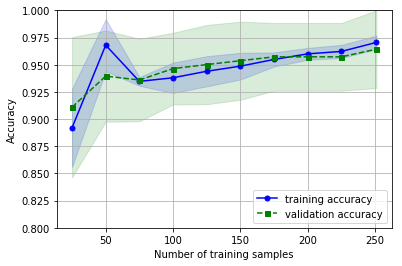

In [592]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.3, random_state=1, stratify=y)

pipe_tree2 = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_tree2,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('1.jpg', dpi=300)
plt.show()

##### 3 features

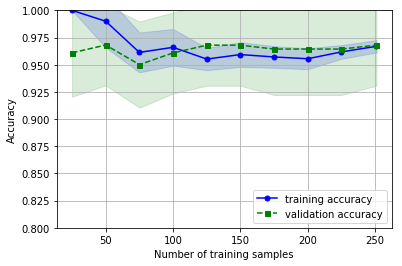

In [593]:
pipe_tree3 = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_tree3,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('2.jpg', dpi=300)
plt.show()

##### 4 features

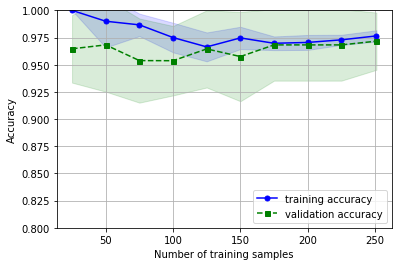

In [594]:
pipe_tree4 = make_pipeline(StandardScaler(),
                        PCA(n_components=4),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_tree4,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('3.jpg', dpi=300)
plt.show()

### ROC & AUC of DecisionTree

##### 2 features

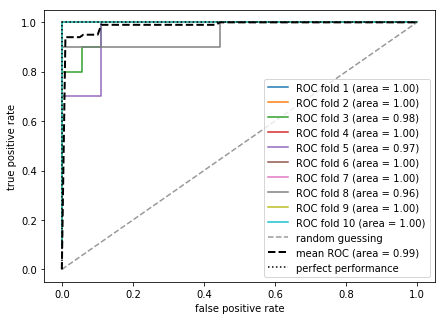

In [595]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_tree2.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('4.jpg', dpi=300)
plt.show()

##### 3 features

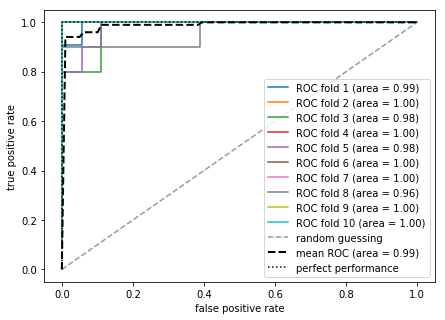

In [596]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_tree3.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('5.jpg', dpi=300)
plt.show()

##### 4 features

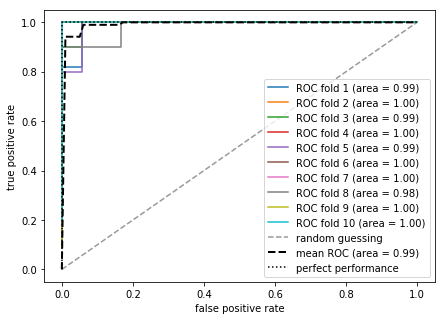

In [597]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_tree4.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('6.jpg', dpi=300)
plt.show()

# LogisticRegression

### Learning curve of LogisticRegression

##### 2 features

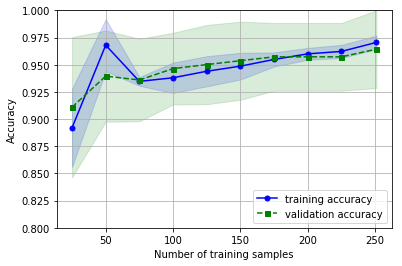

In [598]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.3, random_state=1, stratify=y)

pipe_lr2 = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr2,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('7.jpg', dpi=300)
plt.show()

##### 3 features

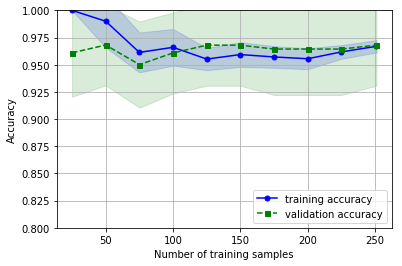

In [599]:
pipe_lr3 = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr3,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('8.jpg', dpi=300)
plt.show()

##### 4 features

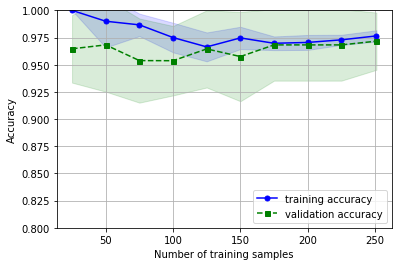

In [600]:
pipe_lr4 = make_pipeline(StandardScaler(),
                        PCA(n_components=4),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_lr4,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('9.jpg', dpi=300)
plt.show()

### ROC & AUC of LogisticRegression

##### 2 features

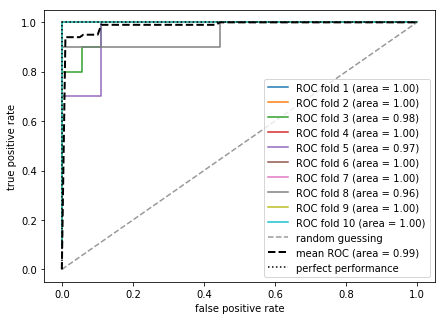

In [601]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr2.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('10.jpg', dpi=300)
plt.show()

##### 3 features

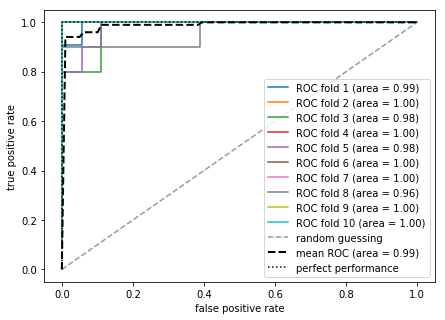

In [602]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr3.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('11.jpg', dpi=300)
plt.show()

##### 4 features

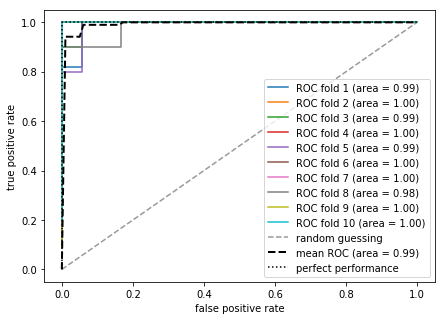

In [603]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_lr4.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('12.jpg', dpi=300)
plt.show()

# KNN

### Learning curve of KNN

##### 2 features

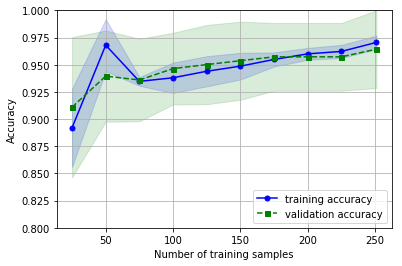

In [604]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.3, random_state=1, stratify=y)

pipe_knn2 = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_knn2,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('13.jpg', dpi=300)
plt.show()

##### 3 features

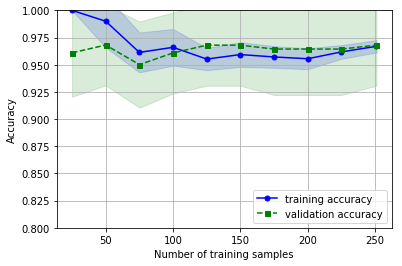

In [605]:
pipe_knn3 = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_knn3,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('14.jpg', dpi=300)
plt.show()

##### 4 features

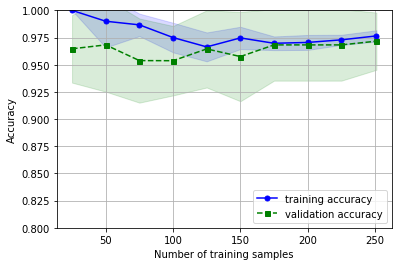

In [606]:
pipe_knn4 = make_pipeline(StandardScaler(),
                        PCA(n_components=4),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_knn4,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('15.jpg', dpi=300)
plt.show()

### ROC & AUC of KNN

##### 2 features

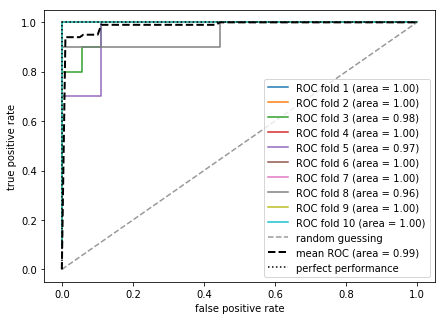

In [607]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_knn2.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('16.jpg', dpi=300)
plt.show()

##### 3 features

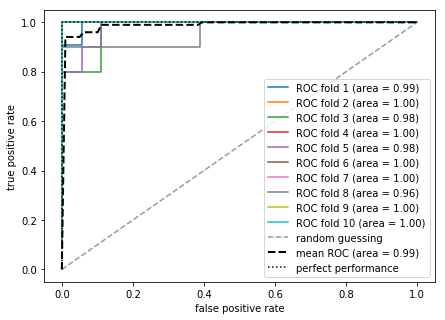

In [608]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_knn3.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('17.jpg', dpi=300)
plt.show()

##### 4 features

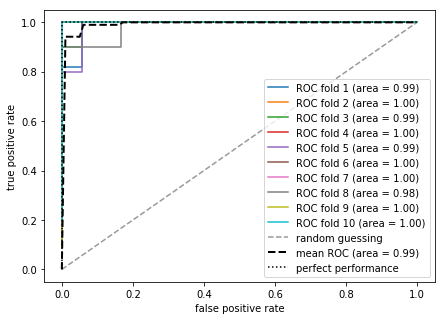

In [609]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_knn4.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('18.jpg', dpi=300)
plt.show()

# SVM

### Learning curve of SVM

##### 2 features

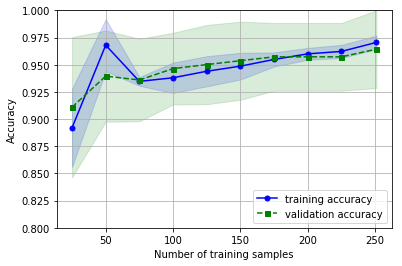

In [610]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.3, random_state=1, stratify=y)

pipe_svm2 = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_svm2,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('19.jpg', dpi=300)
plt.show()

##### 3 features

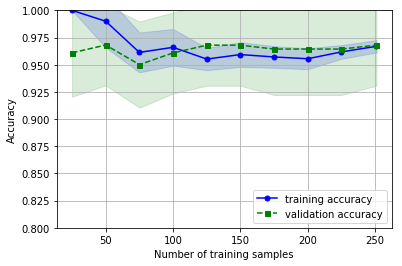

In [611]:
pipe_svm3 = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_svm3,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('20.jpg', dpi=300)
plt.show()

##### 4 features

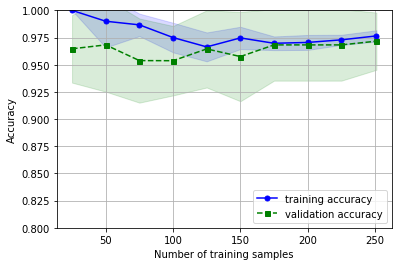

In [612]:
pipe_svm4 = make_pipeline(StandardScaler(),
                        PCA(n_components=4),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_svm4,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('21.jpg', dpi=300)
plt.show()

### ROC & AUC of SVM

##### 2 features

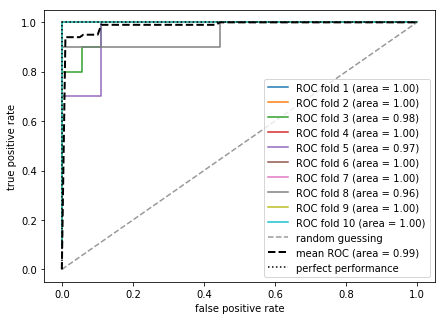

In [613]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_svm2.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('22.jpg', dpi=300)
plt.show()

##### 3 features

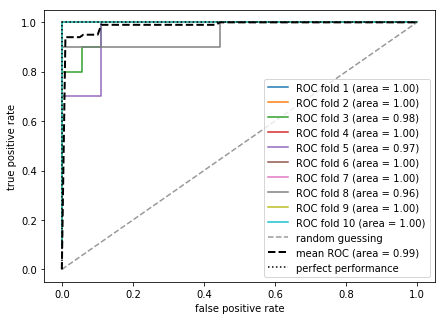

In [614]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_svm.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('23.jpg', dpi=300)
plt.show()

##### 4 features

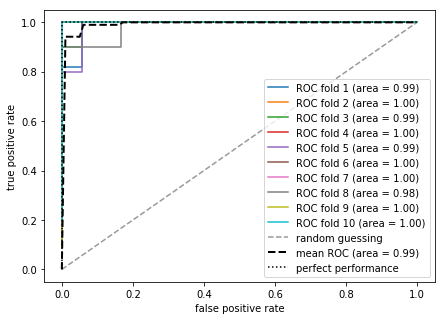

In [615]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_svm4.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('24.jpg', dpi=300)
plt.show()

# RandomForest

### Learning curve of RandomForest

##### 2 features

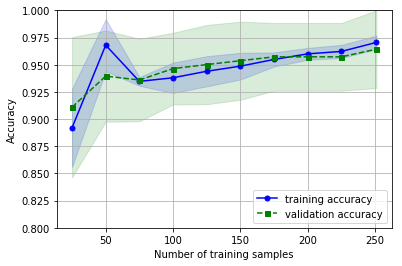

In [616]:
X_train, X_test, y_train, y_test = train_test_split(
    X.values, y, test_size=0.3, random_state=1, stratify=y)

pipe_forest2 = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_forest2,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('25.jpg', dpi=300)
plt.show()

##### 3 features

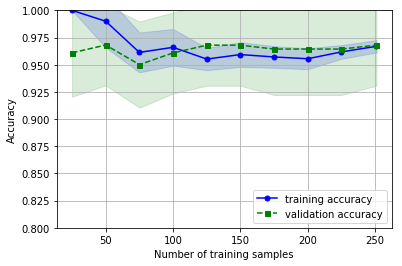

In [617]:
pipe_forest3 = make_pipeline(StandardScaler(),
                        PCA(n_components=3),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_forest3,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('26.jpg', dpi=300)
plt.show()

##### 4 features

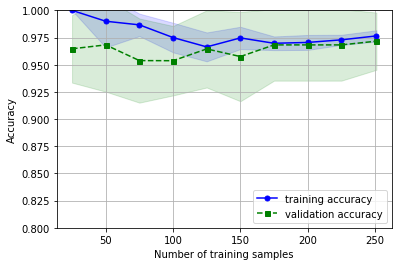

In [618]:
pipe_forest4 = make_pipeline(StandardScaler(),
                        PCA(n_components=4),
                        LogisticRegression(penalty='l2',
                                           random_state=1,
                                           C=100.0))

train_sizes, train_scores, test_scores =learning_curve(estimator=pipe_forest4,
                                                       X=X_train,
                                                       y=y_train,
                                                       train_sizes=np.linspace(0.1, 1.0, 10),
                                                       cv=10,
                                                       n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')
plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')
plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')
plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')
plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.8, 1.0])
plt.savefig('27.jpg', dpi=300)
plt.show()

### ROC & AUC of RandomForest

##### 2 features

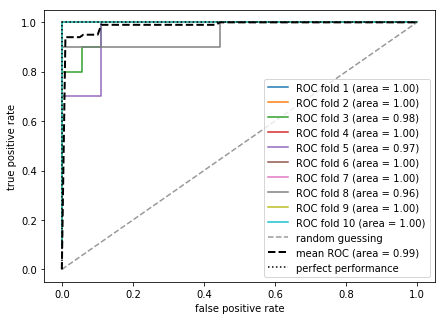

In [619]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_forest2.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('28.jpg', dpi=300)
plt.show()

##### 3 features

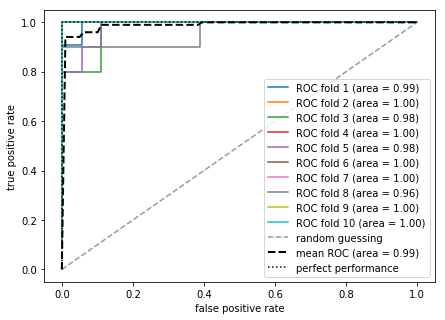

In [620]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_forest3.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('29.jpg', dpi=300)
plt.show()

##### 4 features

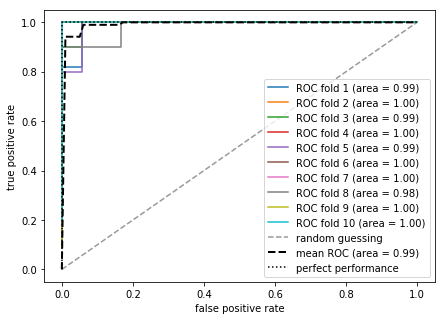

In [621]:
cv=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

fig = plt.figure(figsize=(7, 5))
mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    probas = pipe_forest4.fit(X_train[train],
                         y_train[train]).predict_proba(X_train[test])
    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
             % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='random guessing')
mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='perfect performance')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.legend(loc="lower right")
plt.savefig('30.jpg', dpi=300)
plt.show()

### Combination of 2 features

In [284]:
kfold=StratifiedKFold(y=y,
                     n_folds=10,
                     random_state=1)

for index1, item1 in enumerate(list1):
    for index2, item2 in enumerate(list1):         
        if index1<index2:
            print("\n\nresults of",item1,"&",item2,":\n\n")
            scores=[]
            X=WdbsData.loc[:,[item1,item2]]
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=1, stratify=y)

            sc = StandardScaler()
            sc.fit(X_train)
            X_train_std = sc.transform(X_train)
            X_test_std = sc.transform(X_test)

            kfold=StratifiedKFold(y=y_train,
                     n_folds=10,
                     random_state=1)

            for k,(train,test) in enumerate(kfold):   
                tree.fit(X_train_std, y_train)
                score=tree.score(X_train_std[test], y_train[test])
                scores.append(score)
                print('Fold:%s, Class dist. :%s, Acc:%3f'%(k+1,np.bincount(y_train[train]),score))
                print('CV accuracy:%.3f +/- %.3f'%(np.mean(scores),np.std(scores)))             

            scores=cross_val_score(estimator=tree,
                                   X=X_train_std,
                                  y=y_train,
                                  cv=10,
                                  n_jobs=1)
            
            print('\nCV accuracy scores: \n %s' %scores)
            print('\nCV accuracy: %.3f +/- %.3f' %(np.mean(scores),np.std(scores)))



results of radius mean & texture mean :


Fold:1, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.914 +/- 0.017
Fold:3, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.908 +/- 0.016
Fold:4, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.914 +/- 0.017
Fold:5, Class dist. :[158  94], Acc:0.928571
CV accuracy:0.917 +/- 0.017
Fold:6, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.931 +/- 0.034
Fold:7, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.935 +/- 0.034
Fold:8, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.934 +/- 0.032
Fold:9, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.933 +/- 0.030
Fold:10, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.936 +/- 0.030

CV accuracy scores: 
 [0.89655172 0.75862069 0.75862069 0.82758621 0.85714286 0.92857143
 0.88888889 0.92592593 0.85185185 0.88888889]

CV accuracy: 0.858 +/- 0.058


results of radius mean & perimeter mean :


Fold:1, Class


CV accuracy scores: 
 [0.96551724 0.86206897 0.82758621 0.82758621 0.82142857 0.85714286
 0.77777778 0.96296296 0.92592593 0.85185185]

CV accuracy: 0.868 +/- 0.060


results of radius mean & symmetry  sde :


Fold:1, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.948 +/- 0.017
Fold:3, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.931 +/- 0.028
Fold:4, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.024
Fold:5, Class dist. :[158  94], Acc:0.857143
CV accuracy:0.916 +/- 0.037
Fold:6, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.930 +/- 0.046
Fold:7, Class dist. :[159  94], Acc:0.851852
CV accuracy:0.919 +/- 0.051
Fold:8, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.925 +/- 0.049
Fold:9, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.925 +/- 0.047
Fold:10, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.925 +/- 0.044

CV accuracy scores: 
 [0.93103448 0.93103448 0.79310345 0

Fold:10, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.964 +/- 0.023

CV accuracy scores: 
 [0.96551724 0.79310345 0.96551724 0.75862069 0.96428571 0.96428571
 0.92592593 0.88888889 0.92592593 0.96296296]

CV accuracy: 0.912 +/- 0.072


results of radius mean & concave points worst :


Fold:1, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.000
Fold:3, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.000
Fold:4, Class dist. :[158  93], Acc:1.000000
CV accuracy:0.974 +/- 0.015
Fold:5, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.979 +/- 0.017
Fold:6, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.983 +/- 0.017
Fold:7, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.985 +/- 0.017
Fold:8, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.987 +/- 0.017
Fold:9, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.989 +/- 0.016
Fold:10, Class dist. :[159  94], Acc:0.962963
CV ac

Fold:4, Class dist. :[158  93], Acc:0.724138
CV accuracy:0.741 +/- 0.030
Fold:5, Class dist. :[158  94], Acc:0.785714
CV accuracy:0.750 +/- 0.032
Fold:6, Class dist. :[158  94], Acc:0.750000
CV accuracy:0.750 +/- 0.029
Fold:7, Class dist. :[159  94], Acc:0.888889
CV accuracy:0.770 +/- 0.056
Fold:8, Class dist. :[159  94], Acc:0.814815
CV accuracy:0.776 +/- 0.054
Fold:9, Class dist. :[159  94], Acc:0.777778
CV accuracy:0.776 +/- 0.051
Fold:10, Class dist. :[159  94], Acc:0.814815
CV accuracy:0.780 +/- 0.050

CV accuracy scores: 
 [0.5862069  0.62068966 0.72413793 0.65517241 0.57142857 0.75
 0.77777778 0.77777778 0.74074074 0.66666667]

CV accuracy: 0.687 +/- 0.074


results of texture mean & compactness sde :


Fold:1, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.793 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.845 +/- 0.052
Fold:3, Class dist. :[158  93], Acc:0.827586
CV accuracy:0.839 +/- 0.043
Fold:4, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.85

Fold:1, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.793 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.827586
CV accuracy:0.810 +/- 0.017
Fold:3, Class dist. :[158  93], Acc:0.758621
CV accuracy:0.793 +/- 0.028
Fold:4, Class dist. :[158  93], Acc:0.724138
CV accuracy:0.776 +/- 0.039
Fold:5, Class dist. :[158  94], Acc:0.821429
CV accuracy:0.785 +/- 0.039
Fold:6, Class dist. :[158  94], Acc:0.892857
CV accuracy:0.803 +/- 0.054
Fold:7, Class dist. :[159  94], Acc:0.851852
CV accuracy:0.810 +/- 0.053
Fold:8, Class dist. :[159  94], Acc:0.814815
CV accuracy:0.811 +/- 0.049
Fold:9, Class dist. :[159  94], Acc:0.814815
CV accuracy:0.811 +/- 0.046
Fold:10, Class dist. :[159  94], Acc:0.851852
CV accuracy:0.815 +/- 0.046

CV accuracy scores: 
 [0.62068966 0.75862069 0.65517241 0.62068966 0.67857143 0.78571429
 0.81481481 0.66666667 0.74074074 0.81481481]

CV accuracy: 0.716 +/- 0.072


results of perimeter mean & area mean :


Fold:1, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.


CV accuracy scores: 
 [1.         0.86206897 0.68965517 0.86206897 0.85714286 0.92857143
 0.81481481 0.96296296 0.92592593 0.92592593]

CV accuracy: 0.883 +/- 0.083


results of perimeter mean & symmetry  sde :


Fold:1, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:3, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:4, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:5, Class dist. :[158  94], Acc:0.892857
CV accuracy:0.923 +/- 0.015
Fold:6, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.936 +/- 0.032
Fold:7, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.935 +/- 0.030
Fold:8, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.938 +/- 0.029
Fold:9, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.941 +/- 0.029
Fold:10, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.939 +/- 0.028

CV accuracy scores: 
 [0.93103448 0.86206897 0.7586206


CV accuracy scores: 
 [0.96551724 0.86206897 0.93103448 0.89655172 0.96428571 0.96428571
 0.92592593 0.92592593 0.92592593 0.96296296]

CV accuracy: 0.932 +/- 0.032


results of perimeter mean & concave points worst :


Fold:1, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.000
Fold:3, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.000
Fold:4, Class dist. :[158  93], Acc:1.000000
CV accuracy:0.974 +/- 0.015
Fold:5, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.979 +/- 0.017
Fold:6, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.983 +/- 0.017
Fold:7, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.985 +/- 0.017
Fold:8, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.987 +/- 0.017
Fold:9, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.989 +/- 0.016
Fold:10, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.986 +/- 0.017

CV accuracy scores: 
 [0.93103448 0.93103448 0.


CV accuracy scores: 
 [0.96551724 0.89655172 0.79310345 0.93103448 0.85714286 0.92857143
 0.81481481 0.96296296 0.92592593 0.85185185]

CV accuracy: 0.893 +/- 0.057


results of area mean & concave points sde :


Fold:1, Class dist. :[158  93], Acc:1.000000
CV accuracy:1.000 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.983 +/- 0.017
Fold:3, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.954 +/- 0.043
Fold:4, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.957 +/- 0.038
Fold:5, Class dist. :[158  94], Acc:0.892857
CV accuracy:0.944 +/- 0.042
Fold:6, Class dist. :[158  94], Acc:0.964286
CV accuracy:0.947 +/- 0.039
Fold:7, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.944 +/- 0.037
Fold:8, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.947 +/- 0.035
Fold:9, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.944 +/- 0.034
Fold:10, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.946 +/- 0.033

CV accuracy scores: 
 [1.         0.93103448 0.8275862

Fold:1, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.000
Fold:3, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.954 +/- 0.016
Fold:4, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.948 +/- 0.017
Fold:5, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.959 +/- 0.026
Fold:6, Class dist. :[158  94], Acc:0.964286
CV accuracy:0.960 +/- 0.024
Fold:7, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.960 +/- 0.022
Fold:8, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.960 +/- 0.021
Fold:9, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.957 +/- 0.022
Fold:10, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.957 +/- 0.021

CV accuracy scores: 
 [0.93103448 0.93103448 0.89655172 0.82758621 0.96428571 0.89285714
 0.81481481 0.96296296 0.92592593 0.81481481]

CV accuracy: 0.896 +/- 0.055


results of smoothness mean & concave points mean :


Fold:1, Class dist. :[158  93], Acc:1.000000
CV 

Fold:3, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.028
Fold:4, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.024
Fold:5, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.972 +/- 0.026
Fold:6, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.977 +/- 0.026
Fold:7, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.980 +/- 0.025
Fold:8, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.978 +/- 0.024
Fold:9, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.972 +/- 0.028
Fold:10, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.971 +/- 0.027

CV accuracy scores: 
 [0.96551724 0.93103448 0.86206897 0.93103448 0.85714286 0.92857143
 0.96296296 0.96296296 0.92592593 0.88888889]

CV accuracy: 0.922 +/- 0.038


results of smoothness mean & smoothness worst :


Fold:1, Class dist. :[158  93], Acc:0.827586
CV accuracy:0.828 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.862 +/- 0.034
Fold:3, Class dist. :[158  93], Acc:0.758621
CV acc


CV accuracy scores: 
 [0.96551724 0.86206897 0.86206897 0.86206897 0.85714286 0.92857143
 0.85185185 0.85185185 0.92592593 0.85185185]

CV accuracy: 0.882 +/- 0.040


results of compactness mean & smoothness sde :


Fold:1, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:3, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.920 +/- 0.016
Fold:4, Class dist. :[158  93], Acc:0.862069
CV accuracy:0.905 +/- 0.029
Fold:5, Class dist. :[158  94], Acc:0.821429
CV accuracy:0.888 +/- 0.042
Fold:6, Class dist. :[158  94], Acc:0.928571
CV accuracy:0.895 +/- 0.041
Fold:7, Class dist. :[159  94], Acc:0.814815
CV accuracy:0.884 +/- 0.047
Fold:8, Class dist. :[159  94], Acc:0.888889
CV accuracy:0.884 +/- 0.044
Fold:9, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.897 +/- 0.055
Fold:10, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.900 +/- 0.053

CV accuracy scores: 
 [0.79310345 0.86206897 0.7586

Fold:1, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:3, Class dist. :[158  93], Acc:0.862069
CV accuracy:0.908 +/- 0.033
Fold:4, Class dist. :[158  93], Acc:0.827586
CV accuracy:0.888 +/- 0.045
Fold:5, Class dist. :[158  94], Acc:0.785714
CV accuracy:0.867 +/- 0.057
Fold:6, Class dist. :[158  94], Acc:0.928571
CV accuracy:0.878 +/- 0.057
Fold:7, Class dist. :[159  94], Acc:0.851852
CV accuracy:0.874 +/- 0.054
Fold:8, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.885 +/- 0.058
Fold:9, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.894 +/- 0.060
Fold:10, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.897 +/- 0.058

CV accuracy scores: 
 [0.82758621 0.86206897 0.72413793 0.82758621 0.78571429 0.78571429
 0.74074074 0.88888889 0.92592593 0.81481481]

CV accuracy: 0.818 +/- 0.060


results of concavity mean & concave points mean :


Fold:1, Class dist. :[158  93], Acc:1.000000
CV a


CV accuracy scores: 
 [0.96551724 0.93103448 0.96551724 0.96551724 0.92857143 0.89285714
 0.85185185 0.96296296 0.92592593 0.92592593]

CV accuracy: 0.932 +/- 0.035


results of concavity mean & area worst :


Fold:1, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.948 +/- 0.017
Fold:3, Class dist. :[158  93], Acc:1.000000
CV accuracy:0.966 +/- 0.028
Fold:4, Class dist. :[158  93], Acc:1.000000
CV accuracy:0.974 +/- 0.029
Fold:5, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.979 +/- 0.028
Fold:6, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.983 +/- 0.026
Fold:7, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.985 +/- 0.025
Fold:8, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.987 +/- 0.024
Fold:9, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.989 +/- 0.023
Fold:10, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.986 +/- 0.023

CV accuracy scores: 
 [0.96551724 0.89655172 0.96551724 0


CV accuracy scores: 
 [1.         0.96551724 0.86206897 1.         0.96428571 0.96428571
 0.92592593 0.92592593 1.         0.92592593]

CV accuracy: 0.953 +/- 0.042


results of concave points mean & radius sde :


Fold:1, Class dist. :[158  93], Acc:1.000000
CV accuracy:1.000 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:1.000000
CV accuracy:1.000 +/- 0.000
Fold:3, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.977 +/- 0.033
Fold:4, Class dist. :[158  93], Acc:1.000000
CV accuracy:0.983 +/- 0.030
Fold:5, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.986 +/- 0.028
Fold:6, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.989 +/- 0.026
Fold:7, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.980 +/- 0.032
Fold:8, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.982 +/- 0.031
Fold:9, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.984 +/- 0.030
Fold:10, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.978 +/- 0.033

CV accuracy scores: 
 [1.         0.96551724 0.86206

Fold:2, Class dist. :[158  93], Acc:1.000000
CV accuracy:1.000 +/- 0.000
Fold:3, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.977 +/- 0.033
Fold:4, Class dist. :[158  93], Acc:1.000000
CV accuracy:0.983 +/- 0.030
Fold:5, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.986 +/- 0.028
Fold:6, Class dist. :[158  94], Acc:0.964286
CV accuracy:0.983 +/- 0.026
Fold:7, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.974 +/- 0.032
Fold:8, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.978 +/- 0.031
Fold:9, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.980 +/- 0.030
Fold:10, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.982 +/- 0.029

CV accuracy scores: 
 [1.         0.96551724 0.86206897 0.96551724 0.96428571 0.92857143
 0.96296296 1.         0.96296296 0.92592593]

CV accuracy: 0.954 +/- 0.038


results of concave points mean & concavity worst :


Fold:1, Class dist. :[158  93], Acc:1.000000
CV accuracy:1.000 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.965517
CV 

Fold:1, Class dist. :[158  93], Acc:0.689655
CV accuracy:0.690 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.741 +/- 0.052
Fold:3, Class dist. :[158  93], Acc:0.724138
CV accuracy:0.736 +/- 0.043
Fold:4, Class dist. :[158  93], Acc:0.827586
CV accuracy:0.759 +/- 0.055
Fold:5, Class dist. :[158  94], Acc:0.857143
CV accuracy:0.778 +/- 0.063
Fold:6, Class dist. :[158  94], Acc:0.714286
CV accuracy:0.768 +/- 0.062
Fold:7, Class dist. :[159  94], Acc:0.814815
CV accuracy:0.774 +/- 0.060
Fold:8, Class dist. :[159  94], Acc:0.888889
CV accuracy:0.789 +/- 0.068
Fold:9, Class dist. :[159  94], Acc:0.777778
CV accuracy:0.787 +/- 0.064
Fold:10, Class dist. :[159  94], Acc:0.814815
CV accuracy:0.790 +/- 0.061

CV accuracy scores: 
 [0.65517241 0.68965517 0.62068966 0.65517241 0.71428571 0.67857143
 0.74074074 0.77777778 0.66666667 0.77777778]

CV accuracy: 0.698 +/- 0.051


results of symmetry  mean & fractal dimension sde :


Fold:1, Class dist. :[158  93], Acc:0.827586
CV


CV accuracy scores: 
 [0.75862069 0.72413793 0.89655172 0.79310345 0.78571429 0.85714286
 0.81481481 0.81481481 0.81481481 0.85185185]

CV accuracy: 0.811 +/- 0.047


results of symmetry  mean & concave points worst :


Fold:1, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:1.000000
CV accuracy:0.983 +/- 0.017
Fold:3, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.966 +/- 0.028
Fold:4, Class dist. :[158  93], Acc:1.000000
CV accuracy:0.974 +/- 0.029
Fold:5, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.979 +/- 0.028
Fold:6, Class dist. :[158  94], Acc:0.964286
CV accuracy:0.977 +/- 0.026
Fold:7, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.980 +/- 0.025
Fold:8, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.978 +/- 0.024
Fold:9, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.972 +/- 0.028
Fold:10, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.971 +/- 0.027

CV accuracy scores: 
 [0.86206897 1.         0.


CV accuracy scores: 
 [0.82758621 0.75862069 0.75862069 0.51724138 0.75       0.71428571
 0.66666667 0.7037037  0.7037037  0.7037037 ]

CV accuracy: 0.710 +/- 0.077


results of fractal dimension mean & concavity sde :


Fold:1, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.793 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.793 +/- 0.000
Fold:3, Class dist. :[158  93], Acc:0.827586
CV accuracy:0.805 +/- 0.016
Fold:4, Class dist. :[158  93], Acc:0.724138
CV accuracy:0.784 +/- 0.038
Fold:5, Class dist. :[158  94], Acc:0.857143
CV accuracy:0.799 +/- 0.044
Fold:6, Class dist. :[158  94], Acc:0.892857
CV accuracy:0.815 +/- 0.054
Fold:7, Class dist. :[159  94], Acc:0.740741
CV accuracy:0.804 +/- 0.056
Fold:8, Class dist. :[159  94], Acc:0.814815
CV accuracy:0.805 +/- 0.052
Fold:9, Class dist. :[159  94], Acc:0.777778
CV accuracy:0.802 +/- 0.050
Fold:10, Class dist. :[159  94], Acc:0.814815
CV accuracy:0.804 +/- 0.048

CV accuracy scores: 
 [0.75862069 0.72413793 0

Fold:6, Class dist. :[158  94], Acc:0.821429
CV accuracy:0.849 +/- 0.051
Fold:7, Class dist. :[159  94], Acc:0.888889
CV accuracy:0.855 +/- 0.050
Fold:8, Class dist. :[159  94], Acc:0.851852
CV accuracy:0.854 +/- 0.046
Fold:9, Class dist. :[159  94], Acc:0.888889
CV accuracy:0.858 +/- 0.045
Fold:10, Class dist. :[159  94], Acc:0.888889
CV accuracy:0.861 +/- 0.044

CV accuracy scores: 
 [0.89655172 0.75862069 0.72413793 0.82758621 0.75       0.75
 0.77777778 0.85185185 0.85185185 0.85185185]

CV accuracy: 0.804 +/- 0.056


results of radius sde & perimeter sde :


Fold:1, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.862069
CV accuracy:0.897 +/- 0.034
Fold:3, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.862 +/- 0.056
Fold:4, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.845 +/- 0.057
Fold:5, Class dist. :[158  94], Acc:0.857143
CV accuracy:0.847 +/- 0.051
Fold:6, Class dist. :[158  94], Acc:0.892857
CV accuracy:0.855 +/

Fold:1, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.862069
CV accuracy:0.897 +/- 0.034
Fold:3, Class dist. :[158  93], Acc:0.862069
CV accuracy:0.885 +/- 0.033
Fold:4, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.888 +/- 0.029
Fold:5, Class dist. :[158  94], Acc:0.928571
CV accuracy:0.896 +/- 0.030
Fold:6, Class dist. :[158  94], Acc:0.892857
CV accuracy:0.896 +/- 0.028
Fold:7, Class dist. :[159  94], Acc:0.851852
CV accuracy:0.889 +/- 0.030
Fold:8, Class dist. :[159  94], Acc:0.888889
CV accuracy:0.889 +/- 0.028
Fold:9, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.893 +/- 0.029
Fold:10, Class dist. :[159  94], Acc:0.888889
CV accuracy:0.893 +/- 0.027

CV accuracy scores: 
 [0.93103448 0.82758621 0.82758621 0.82758621 0.89285714 0.78571429
 0.81481481 0.88888889 0.92592593 0.85185185]

CV accuracy: 0.857 +/- 0.047


results of radius sde & fractal dimension worst :


Fold:1, Class dist. :[158  93], Acc:0.931034
CV a


CV accuracy scores: 
 [0.51724138 0.72413793 0.65517241 0.65517241 0.67857143 0.64285714
 0.59259259 0.59259259 0.7037037  0.62962963]

CV accuracy: 0.639 +/- 0.057


results of texture sde & fractal dimension sde :


Fold:1, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.793 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.793 +/- 0.000
Fold:3, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.793 +/- 0.000
Fold:4, Class dist. :[158  93], Acc:0.724138
CV accuracy:0.776 +/- 0.030
Fold:5, Class dist. :[158  94], Acc:0.750000
CV accuracy:0.771 +/- 0.029
Fold:6, Class dist. :[158  94], Acc:0.821429
CV accuracy:0.779 +/- 0.032
Fold:7, Class dist. :[159  94], Acc:0.777778
CV accuracy:0.779 +/- 0.030
Fold:8, Class dist. :[159  94], Acc:0.629630
CV accuracy:0.760 +/- 0.057
Fold:9, Class dist. :[159  94], Acc:0.740741
CV accuracy:0.758 +/- 0.054
Fold:10, Class dist. :[159  94], Acc:0.777778
CV accuracy:0.760 +/- 0.051

CV accuracy scores: 
 [0.72413793 0.79310345 0.68

Fold:8, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.978 +/- 0.025
Fold:9, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.976 +/- 0.024
Fold:10, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.975 +/- 0.023

CV accuracy scores: 
 [0.89655172 1.         0.89655172 0.93103448 0.89285714 0.92857143
 0.92592593 0.92592593 0.88888889 0.96296296]

CV accuracy: 0.925 +/- 0.033


results of texture sde & symmetry  worst :


Fold:1, Class dist. :[158  93], Acc:0.724138
CV accuracy:0.724 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.724138
CV accuracy:0.724 +/- 0.000
Fold:3, Class dist. :[158  93], Acc:0.758621
CV accuracy:0.736 +/- 0.016
Fold:4, Class dist. :[158  93], Acc:0.827586
CV accuracy:0.759 +/- 0.042
Fold:5, Class dist. :[158  94], Acc:0.857143
CV accuracy:0.778 +/- 0.055
Fold:6, Class dist. :[158  94], Acc:0.714286
CV accuracy:0.768 +/- 0.055
Fold:7, Class dist. :[159  94], Acc:0.703704
CV accuracy:0.759 +/- 0.056
Fold:8, Class dist. :[159  94], Acc:0.777778
CV accuracy

Fold:2, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.983 +/- 0.017
Fold:3, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.977 +/- 0.016
Fold:4, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.974 +/- 0.015
Fold:5, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.979 +/- 0.017
Fold:6, Class dist. :[158  94], Acc:0.964286
CV accuracy:0.977 +/- 0.016
Fold:7, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.975 +/- 0.016
Fold:8, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.973 +/- 0.015
Fold:9, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.976 +/- 0.017
Fold:10, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.979 +/- 0.017

CV accuracy scores: 
 [0.96551724 0.93103448 0.93103448 0.93103448 0.96428571 0.92857143
 0.92592593 0.92592593 0.96296296 0.96296296]

CV accuracy: 0.943 +/- 0.017


results of perimeter sde & symmetry  worst :


Fold:1, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.931034
CV accura

Fold:3, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.056
Fold:4, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.049
Fold:5, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.945 +/- 0.052
Fold:6, Class dist. :[158  94], Acc:0.964286
CV accuracy:0.948 +/- 0.048
Fold:7, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.950 +/- 0.044
Fold:8, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.947 +/- 0.042
Fold:9, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.949 +/- 0.040
Fold:10, Class dist. :[159  94], Acc:0.888889
CV accuracy:0.943 +/- 0.042

CV accuracy scores: 
 [1.         0.82758621 0.86206897 0.82758621 0.92857143 0.82142857
 0.92592593 0.85185185 0.92592593 0.88888889]

CV accuracy: 0.886 +/- 0.055


results of area sde & fractal dimension worst :


Fold:1, Class dist. :[158  93], Acc:1.000000
CV accuracy:1.000 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.966 +/- 0.034
Fold:3, Class dist. :[158  93], Acc:0.931034
CV acc

Fold:3, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.782 +/- 0.016
Fold:4, Class dist. :[158  93], Acc:0.724138
CV accuracy:0.767 +/- 0.029
Fold:5, Class dist. :[158  94], Acc:0.821429
CV accuracy:0.778 +/- 0.034
Fold:6, Class dist. :[158  94], Acc:0.785714
CV accuracy:0.779 +/- 0.031
Fold:7, Class dist. :[159  94], Acc:0.629630
CV accuracy:0.758 +/- 0.060
Fold:8, Class dist. :[159  94], Acc:0.703704
CV accuracy:0.751 +/- 0.059
Fold:9, Class dist. :[159  94], Acc:0.814815
CV accuracy:0.758 +/- 0.059
Fold:10, Class dist. :[159  94], Acc:0.777778
CV accuracy:0.760 +/- 0.056

CV accuracy scores: 
 [0.72413793 0.65517241 0.68965517 0.65517241 0.64285714 0.75
 0.59259259 0.59259259 0.77777778 0.7037037 ]

CV accuracy: 0.678 +/- 0.059


results of compactness sde & concavity sde :


Fold:1, Class dist. :[158  93], Acc:0.724138
CV accuracy:0.724 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.862069
CV accuracy:0.793 +/- 0.069
Fold:3, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.8

Fold:1, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.914 +/- 0.017
Fold:3, Class dist. :[158  93], Acc:0.827586
CV accuracy:0.885 +/- 0.043
Fold:4, Class dist. :[158  93], Acc:0.758621
CV accuracy:0.853 +/- 0.066
Fold:5, Class dist. :[158  94], Acc:0.857143
CV accuracy:0.854 +/- 0.059
Fold:6, Class dist. :[158  94], Acc:0.928571
CV accuracy:0.867 +/- 0.061
Fold:7, Class dist. :[159  94], Acc:0.703704
CV accuracy:0.843 +/- 0.080
Fold:8, Class dist. :[159  94], Acc:0.740741
CV accuracy:0.830 +/- 0.082
Fold:9, Class dist. :[159  94], Acc:0.740741
CV accuracy:0.821 +/- 0.083
Fold:10, Class dist. :[159  94], Acc:0.814815
CV accuracy:0.820 +/- 0.078

CV accuracy scores: 
 [0.75862069 0.82758621 0.72413793 0.68965517 0.82142857 0.85714286
 0.66666667 0.59259259 0.74074074 0.74074074]

CV accuracy: 0.742 +/- 0.076


results of compactness sde & compactness worst :


Fold:1, Class dist. :[158  93], Acc:0.862069
CV ac


CV accuracy scores: 
 [0.72413793 0.75862069 0.75862069 0.62068966 0.85714286 0.82142857
 0.7037037  0.74074074 0.7037037  0.77777778]

CV accuracy: 0.747 +/- 0.063


results of concavity sde & radius worst :


Fold:1, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.948 +/- 0.017
Fold:3, Class dist. :[158  93], Acc:1.000000
CV accuracy:0.966 +/- 0.028
Fold:4, Class dist. :[158  93], Acc:1.000000
CV accuracy:0.974 +/- 0.029
Fold:5, Class dist. :[158  94], Acc:0.892857
CV accuracy:0.958 +/- 0.041
Fold:6, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.965 +/- 0.041
Fold:7, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.965 +/- 0.038
Fold:8, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.964 +/- 0.035
Fold:9, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.964 +/- 0.033
Fold:10, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.964 +/- 0.032

CV accuracy scores: 
 [0.96551724 0.82758621 1.         

Fold:1, Class dist. :[158  93], Acc:0.758621
CV accuracy:0.759 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.827586
CV accuracy:0.793 +/- 0.034
Fold:3, Class dist. :[158  93], Acc:0.862069
CV accuracy:0.816 +/- 0.043
Fold:4, Class dist. :[158  93], Acc:0.758621
CV accuracy:0.802 +/- 0.045
Fold:5, Class dist. :[158  94], Acc:0.857143
CV accuracy:0.813 +/- 0.046
Fold:6, Class dist. :[158  94], Acc:0.892857
CV accuracy:0.826 +/- 0.051
Fold:7, Class dist. :[159  94], Acc:0.814815
CV accuracy:0.825 +/- 0.048
Fold:8, Class dist. :[159  94], Acc:0.777778
CV accuracy:0.819 +/- 0.047
Fold:9, Class dist. :[159  94], Acc:0.777778
CV accuracy:0.814 +/- 0.046
Fold:10, Class dist. :[159  94], Acc:0.740741
CV accuracy:0.807 +/- 0.049

CV accuracy scores: 
 [0.62068966 0.68965517 0.82758621 0.5862069  0.71428571 0.71428571
 0.66666667 0.55555556 0.77777778 0.7037037 ]

CV accuracy: 0.686 +/- 0.079


results of concave points sde & symmetry  sde :


Fold:1, Class dist. :[158  93], Acc:0.827586
CV acc


CV accuracy scores: 
 [0.82758621 0.89655172 0.75862069 0.68965517 0.85714286 0.82142857
 0.7037037  0.85185185 0.77777778 0.81481481]

CV accuracy: 0.800 +/- 0.064


results of concave points sde & concavity worst :


Fold:1, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.931 +/- 0.000
Fold:3, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.920 +/- 0.016
Fold:4, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.914 +/- 0.017
Fold:5, Class dist. :[158  94], Acc:0.964286
CV accuracy:0.924 +/- 0.025
Fold:6, Class dist. :[158  94], Acc:0.928571
CV accuracy:0.925 +/- 0.023
Fold:7, Class dist. :[159  94], Acc:0.851852
CV accuracy:0.914 +/- 0.033
Fold:8, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.925 +/- 0.042
Fold:9, Class dist. :[159  94], Acc:0.888889
CV accuracy:0.921 +/- 0.041
Fold:10, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.921 +/- 0.039

CV accuracy scores: 
 [0.86206897 0.89655172 0.9

Fold:1, Class dist. :[158  93], Acc:0.827586
CV accuracy:0.828 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.689655
CV accuracy:0.759 +/- 0.069
Fold:3, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.770 +/- 0.059
Fold:4, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.776 +/- 0.052
Fold:5, Class dist. :[158  94], Acc:0.785714
CV accuracy:0.778 +/- 0.046
Fold:6, Class dist. :[158  94], Acc:0.678571
CV accuracy:0.761 +/- 0.056
Fold:7, Class dist. :[159  94], Acc:0.777778
CV accuracy:0.764 +/- 0.052
Fold:8, Class dist. :[159  94], Acc:0.703704
CV accuracy:0.756 +/- 0.053
Fold:9, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.775 +/- 0.073
Fold:10, Class dist. :[159  94], Acc:0.777778
CV accuracy:0.775 +/- 0.069

CV accuracy scores: 
 [0.68965517 0.72413793 0.65517241 0.62068966 0.71428571 0.60714286
 0.74074074 0.51851852 0.81481481 0.7037037 ]

CV accuracy: 0.679 +/- 0.078


results of symmetry  sde & compactness worst :


Fold:1, Class dist. :[158  93], Acc:0.862069
CV accu

Fold:1, Class dist. :[158  93], Acc:1.000000
CV accuracy:1.000 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.966 +/- 0.034
Fold:3, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.028
Fold:4, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.024
Fold:5, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.972 +/- 0.026
Fold:6, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.977 +/- 0.026
Fold:7, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.980 +/- 0.025
Fold:8, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.978 +/- 0.024
Fold:9, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.976 +/- 0.023
Fold:10, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.975 +/- 0.022

CV accuracy scores: 
 [0.96551724 0.93103448 0.89655172 0.89655172 0.92857143 0.96428571
 0.92592593 0.96296296 0.96296296 0.92592593]

CV accuracy: 0.936 +/- 0.026


results of fractal dimension sde & smoothness worst :


Fold:1, Class dist. :[158  93], Acc:0.862069



CV accuracy scores: 
 [0.93103448 0.93103448 0.89655172 0.96551724 0.89285714 0.92857143
 0.88888889 0.96296296 0.92592593 0.96296296]

CV accuracy: 0.929 +/- 0.028


results of radius worst & area worst :


Fold:1, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.931 +/- 0.034
Fold:3, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.920 +/- 0.033
Fold:4, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.922 +/- 0.029
Fold:5, Class dist. :[158  94], Acc:0.964286
CV accuracy:0.931 +/- 0.031
Fold:6, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.942 +/- 0.038
Fold:7, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.940 +/- 0.036
Fold:8, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.943 +/- 0.034
Fold:9, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.941 +/- 0.033
Fold:10, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.943 +/- 0.032

CV accuracy scores: 
 [0.93103448 0.89655172 0.82758621 0.9

Fold:9, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.965 +/- 0.024
Fold:10, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.964 +/- 0.023

CV accuracy scores: 
 [0.89655172 0.89655172 0.82758621 0.86206897 0.85714286 0.96428571
 0.96296296 0.96296296 0.85185185 0.92592593]

CV accuracy: 0.901 +/- 0.049


results of texture worst & smoothness worst :


Fold:1, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.793 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.827586
CV accuracy:0.810 +/- 0.017
Fold:3, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.839 +/- 0.043
Fold:4, Class dist. :[158  93], Acc:0.896552
CV accuracy:0.853 +/- 0.045
Fold:5, Class dist. :[158  94], Acc:0.857143
CV accuracy:0.854 +/- 0.040
Fold:6, Class dist. :[158  94], Acc:0.821429
CV accuracy:0.849 +/- 0.039
Fold:7, Class dist. :[159  94], Acc:0.814815
CV accuracy:0.844 +/- 0.038
Fold:8, Class dist. :[159  94], Acc:0.777778
CV accuracy:0.836 +/- 0.041
Fold:9, Class dist. :[159  94], Acc:0.777778
CV accur


CV accuracy scores: 
 [0.93103448 1.         0.86206897 0.96551724 0.96428571 1.
 0.96296296 1.         0.96296296 0.96296296]

CV accuracy: 0.961 +/- 0.039


results of area worst & symmetry  worst :


Fold:1, Class dist. :[158  93], Acc:1.000000
CV accuracy:1.000 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.983 +/- 0.017
Fold:3, Class dist. :[158  93], Acc:0.931034
CV accuracy:0.966 +/- 0.028
Fold:4, Class dist. :[158  93], Acc:0.965517
CV accuracy:0.966 +/- 0.024
Fold:5, Class dist. :[158  94], Acc:0.964286
CV accuracy:0.965 +/- 0.022
Fold:6, Class dist. :[158  94], Acc:1.000000
CV accuracy:0.971 +/- 0.024
Fold:7, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.975 +/- 0.024
Fold:8, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.978 +/- 0.024
Fold:9, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.977 +/- 0.023
Fold:10, Class dist. :[159  94], Acc:0.925926
CV accuracy:0.972 +/- 0.027

CV accuracy scores: 
 [0.93103448 0.96551724 0.93103448 0.896551

Fold:6, Class dist. :[158  94], Acc:0.964286
CV accuracy:0.977 +/- 0.026
Fold:7, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.975 +/- 0.024
Fold:8, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.973 +/- 0.023
Fold:9, Class dist. :[159  94], Acc:0.962963
CV accuracy:0.972 +/- 0.022
Fold:10, Class dist. :[159  94], Acc:1.000000
CV accuracy:0.975 +/- 0.023

CV accuracy scores: 
 [0.86206897 1.         0.79310345 0.89655172 1.         0.89285714
 0.88888889 0.92592593 0.88888889 0.96296296]

CV accuracy: 0.911 +/- 0.060


results of symmetry  worst & fractal dimension worst :


Fold:1, Class dist. :[158  93], Acc:0.758621
CV accuracy:0.759 +/- 0.000
Fold:2, Class dist. :[158  93], Acc:0.655172
CV accuracy:0.707 +/- 0.052
Fold:3, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.736 +/- 0.059
Fold:4, Class dist. :[158  93], Acc:0.793103
CV accuracy:0.750 +/- 0.057
Fold:5, Class dist. :[158  94], Acc:0.785714
CV accuracy:0.757 +/- 0.053
Fold:6, Class dist. :[158  94], Acc:0.785714

### Combination of 2 features

In [12]:
for index1, item1 in enumerate(list1):
    for index2, item2 in enumerate(list1):         
        if index1<index2:
            X=WdbsData.loc[:,[item1,item2]]
            
            X_train, X_test, y_train, y_test = train_test_split(
                X, y, test_size=0.3, random_state=1, stratify=y)

            sc = StandardScaler()
            sc.fit(X_train)
            X_train_std = sc.transform(X_train)
            X_test_std = sc.transform(X_test)
            
            sc = StandardScaler()
            sc.fit(X_train)
            X_train_std = sc.transform(X_train)
            X_test_std = sc.transform(X_test)
            
            tree.fit(X_train_std, y_train)
            
            print(index1,item1,index2,item2,':','Accuracy: %.2f' % tree.score(X_test_std, y_test))

0 radius mean 1 texture mean : Accuracy: 0.85
0 radius mean 2 perimeter mean : Accuracy: 0.90
0 radius mean 3 area mean : Accuracy: 0.85
0 radius mean 4 smoothness mean : Accuracy: 0.87
0 radius mean 5 compactness mean : Accuracy: 0.88
0 radius mean 6 concavity mean : Accuracy: 0.88
0 radius mean 7 concave points mean : Accuracy: 0.90
0 radius mean 8 symmetry  mean : Accuracy: 0.86
0 radius mean 9 fractal dimension mean : Accuracy: 0.86
0 radius mean 10 radius sde : Accuracy: 0.86
0 radius mean 11 texture sde : Accuracy: 0.82
0 radius mean 12 perimeter sde : Accuracy: 0.87
0 radius mean 13 area sde : Accuracy: 0.92
0 radius mean 14 smoothness sde : Accuracy: 0.85
0 radius mean 15 compactness sde : Accuracy: 0.88
0 radius mean 16 concavity sde : Accuracy: 0.84
0 radius mean 17 concave points sde : Accuracy: 0.88
0 radius mean 18 symmetry  sde : Accuracy: 0.86
0 radius mean 19 fractal dimension sde : Accuracy: 0.83
0 radius mean 20 radius worst : Accuracy: 0.89
0 radius mean 21 texture w

6 concavity mean 10 radius sde : Accuracy: 0.89
6 concavity mean 11 texture sde : Accuracy: 0.83
6 concavity mean 12 perimeter sde : Accuracy: 0.89
6 concavity mean 13 area sde : Accuracy: 0.91
6 concavity mean 14 smoothness sde : Accuracy: 0.82
6 concavity mean 15 compactness sde : Accuracy: 0.89
6 concavity mean 16 concavity sde : Accuracy: 0.85
6 concavity mean 17 concave points sde : Accuracy: 0.84
6 concavity mean 18 symmetry  sde : Accuracy: 0.87
6 concavity mean 19 fractal dimension sde : Accuracy: 0.92
6 concavity mean 20 radius worst : Accuracy: 0.92
6 concavity mean 21 texture worst : Accuracy: 0.88
6 concavity mean 22 perimeter worst : Accuracy: 0.88
6 concavity mean 23 area worst : Accuracy: 0.91
6 concavity mean 24 smoothness worst : Accuracy: 0.87
6 concavity mean 25 compactness worst : Accuracy: 0.82
6 concavity mean 26 concavity worst : Accuracy: 0.81
6 concavity mean 27 concave points worst : Accuracy: 0.91
6 concavity mean 28 symmetry  worst : Accuracy: 0.85
6 concavi

15 compactness sde 19 fractal dimension sde : Accuracy: 0.69
15 compactness sde 20 radius worst : Accuracy: 0.87
15 compactness sde 21 texture worst : Accuracy: 0.69
15 compactness sde 22 perimeter worst : Accuracy: 0.88
15 compactness sde 23 area worst : Accuracy: 0.92
15 compactness sde 24 smoothness worst : Accuracy: 0.71
15 compactness sde 25 compactness worst : Accuracy: 0.76
15 compactness sde 26 concavity worst : Accuracy: 0.83
15 compactness sde 27 concave points worst : Accuracy: 0.88
15 compactness sde 28 symmetry  worst : Accuracy: 0.72
15 compactness sde 29 fractal dimension worst : Accuracy: 0.71
16 concavity sde 17 concave points sde : Accuracy: 0.77
16 concavity sde 18 symmetry  sde : Accuracy: 0.70
16 concavity sde 19 fractal dimension sde : Accuracy: 0.72
16 concavity sde 20 radius worst : Accuracy: 0.88
16 concavity sde 21 texture worst : Accuracy: 0.72
16 concavity sde 22 perimeter worst : Accuracy: 0.89
16 concavity sde 23 area worst : Accuracy: 0.90
16 concavity sd

### Combination of 3 features

In [15]:
for index1, item1 in enumerate(list1):
    for index2, item2 in enumerate(list1):         
        for index3, item3 in enumerate(list1):
            if index1<index2:
                if index2<index3:
                    X=WdbsData.loc[:,[item1,item2,item3]]

                    X_train, X_test, y_train, y_test = train_test_split(
                        X, y, test_size=0.3, random_state=1, stratify=y)

                    sc = StandardScaler()
                    sc.fit(X_train)
                    X_train_std = sc.transform(X_train)
                    X_test_std = sc.transform(X_test)

                    sc = StandardScaler()
                    sc.fit(X_train)
                    X_train_std = sc.transform(X_train)
                    X_test_std = sc.transform(X_test)

                    tree.fit(X_train_std, y_train)

                    print(index1,item1,index2,item2,index3,item3,':','Accuracy: %.2f' % tree.score(X_test_std, y_test))

0 radius mean 1 texture mean 2 perimeter mean : Accuracy: 0.88
0 radius mean 1 texture mean 3 area mean : Accuracy: 0.86
0 radius mean 1 texture mean 4 smoothness mean : Accuracy: 0.88
0 radius mean 1 texture mean 5 compactness mean : Accuracy: 0.88
0 radius mean 1 texture mean 6 concavity mean : Accuracy: 0.88
0 radius mean 1 texture mean 7 concave points mean : Accuracy: 0.90
0 radius mean 1 texture mean 8 symmetry  mean : Accuracy: 0.87
0 radius mean 1 texture mean 9 fractal dimension mean : Accuracy: 0.88
0 radius mean 1 texture mean 10 radius sde : Accuracy: 0.88
0 radius mean 1 texture mean 11 texture sde : Accuracy: 0.86
0 radius mean 1 texture mean 12 perimeter sde : Accuracy: 0.88
0 radius mean 1 texture mean 13 area sde : Accuracy: 0.91
0 radius mean 1 texture mean 14 smoothness sde : Accuracy: 0.89
0 radius mean 1 texture mean 15 compactness sde : Accuracy: 0.88
0 radius mean 1 texture mean 16 concavity sde : Accuracy: 0.90
0 radius mean 1 texture mean 17 concave points sde 

0 radius mean 7 concave points mean 13 area sde : Accuracy: 0.92
0 radius mean 7 concave points mean 14 smoothness sde : Accuracy: 0.90
0 radius mean 7 concave points mean 15 compactness sde : Accuracy: 0.92
0 radius mean 7 concave points mean 16 concavity sde : Accuracy: 0.92
0 radius mean 7 concave points mean 17 concave points sde : Accuracy: 0.93
0 radius mean 7 concave points mean 18 symmetry  sde : Accuracy: 0.92
0 radius mean 7 concave points mean 19 fractal dimension sde : Accuracy: 0.89
0 radius mean 7 concave points mean 20 radius worst : Accuracy: 0.88
0 radius mean 7 concave points mean 21 texture worst : Accuracy: 0.95
0 radius mean 7 concave points mean 22 perimeter worst : Accuracy: 0.93
0 radius mean 7 concave points mean 23 area worst : Accuracy: 0.89
0 radius mean 7 concave points mean 24 smoothness worst : Accuracy: 0.91
0 radius mean 7 concave points mean 25 compactness worst : Accuracy: 0.88
0 radius mean 7 concave points mean 26 concavity worst : Accuracy: 0.92
0 

0 radius mean 16 concavity sde 17 concave points sde : Accuracy: 0.84
0 radius mean 16 concavity sde 18 symmetry  sde : Accuracy: 0.85
0 radius mean 16 concavity sde 19 fractal dimension sde : Accuracy: 0.82
0 radius mean 16 concavity sde 20 radius worst : Accuracy: 0.88
0 radius mean 16 concavity sde 21 texture worst : Accuracy: 0.91
0 radius mean 16 concavity sde 22 perimeter worst : Accuracy: 0.91
0 radius mean 16 concavity sde 23 area worst : Accuracy: 0.90
0 radius mean 16 concavity sde 24 smoothness worst : Accuracy: 0.91
0 radius mean 16 concavity sde 25 compactness worst : Accuracy: 0.90
0 radius mean 16 concavity sde 26 concavity worst : Accuracy: 0.89
0 radius mean 16 concavity sde 27 concave points worst : Accuracy: 0.93
0 radius mean 16 concavity sde 28 symmetry  worst : Accuracy: 0.88
0 radius mean 16 concavity sde 29 fractal dimension worst : Accuracy: 0.86
0 radius mean 17 concave points sde 18 symmetry  sde : Accuracy: 0.88
0 radius mean 17 concave points sde 19 fractal

1 texture mean 4 smoothness mean 24 smoothness worst : Accuracy: 0.77
1 texture mean 4 smoothness mean 25 compactness worst : Accuracy: 0.80
1 texture mean 4 smoothness mean 26 concavity worst : Accuracy: 0.84
1 texture mean 4 smoothness mean 27 concave points worst : Accuracy: 0.87
1 texture mean 4 smoothness mean 28 symmetry  worst : Accuracy: 0.84
1 texture mean 4 smoothness mean 29 fractal dimension worst : Accuracy: 0.83
1 texture mean 5 compactness mean 6 concavity mean : Accuracy: 0.90
1 texture mean 5 compactness mean 7 concave points mean : Accuracy: 0.90
1 texture mean 5 compactness mean 8 symmetry  mean : Accuracy: 0.80
1 texture mean 5 compactness mean 9 fractal dimension mean : Accuracy: 0.82
1 texture mean 5 compactness mean 10 radius sde : Accuracy: 0.83
1 texture mean 5 compactness mean 11 texture sde : Accuracy: 0.79
1 texture mean 5 compactness mean 12 perimeter sde : Accuracy: 0.81
1 texture mean 5 compactness mean 13 area sde : Accuracy: 0.86
1 texture mean 5 compac

1 texture mean 10 radius sde 20 radius worst : Accuracy: 0.88
1 texture mean 10 radius sde 21 texture worst : Accuracy: 0.81
1 texture mean 10 radius sde 22 perimeter worst : Accuracy: 0.91
1 texture mean 10 radius sde 23 area worst : Accuracy: 0.90
1 texture mean 10 radius sde 24 smoothness worst : Accuracy: 0.86
1 texture mean 10 radius sde 25 compactness worst : Accuracy: 0.87
1 texture mean 10 radius sde 26 concavity worst : Accuracy: 0.88
1 texture mean 10 radius sde 27 concave points worst : Accuracy: 0.89
1 texture mean 10 radius sde 28 symmetry  worst : Accuracy: 0.85
1 texture mean 10 radius sde 29 fractal dimension worst : Accuracy: 0.78
1 texture mean 11 texture sde 12 perimeter sde : Accuracy: 0.79
1 texture mean 11 texture sde 13 area sde : Accuracy: 0.89
1 texture mean 11 texture sde 14 smoothness sde : Accuracy: 0.68
1 texture mean 11 texture sde 15 compactness sde : Accuracy: 0.79
1 texture mean 11 texture sde 16 concavity sde : Accuracy: 0.84
1 texture mean 11 texture 

1 texture mean 21 texture worst 28 symmetry  worst : Accuracy: 0.73
1 texture mean 21 texture worst 29 fractal dimension worst : Accuracy: 0.71
1 texture mean 22 perimeter worst 23 area worst : Accuracy: 0.93
1 texture mean 22 perimeter worst 24 smoothness worst : Accuracy: 0.92
1 texture mean 22 perimeter worst 25 compactness worst : Accuracy: 0.93
1 texture mean 22 perimeter worst 26 concavity worst : Accuracy: 0.92
1 texture mean 22 perimeter worst 27 concave points worst : Accuracy: 0.94
1 texture mean 22 perimeter worst 28 symmetry  worst : Accuracy: 0.94
1 texture mean 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.93
1 texture mean 23 area worst 24 smoothness worst : Accuracy: 0.93
1 texture mean 23 area worst 25 compactness worst : Accuracy: 0.92
1 texture mean 23 area worst 26 concavity worst : Accuracy: 0.91
1 texture mean 23 area worst 27 concave points worst : Accuracy: 0.94
1 texture mean 23 area worst 28 symmetry  worst : Accuracy: 0.93
1 texture mean 23 area

2 perimeter mean 8 symmetry  mean 11 texture sde : Accuracy: 0.88
2 perimeter mean 8 symmetry  mean 12 perimeter sde : Accuracy: 0.87
2 perimeter mean 8 symmetry  mean 13 area sde : Accuracy: 0.90
2 perimeter mean 8 symmetry  mean 14 smoothness sde : Accuracy: 0.88
2 perimeter mean 8 symmetry  mean 15 compactness sde : Accuracy: 0.89
2 perimeter mean 8 symmetry  mean 16 concavity sde : Accuracy: 0.89
2 perimeter mean 8 symmetry  mean 17 concave points sde : Accuracy: 0.88
2 perimeter mean 8 symmetry  mean 18 symmetry  sde : Accuracy: 0.88
2 perimeter mean 8 symmetry  mean 19 fractal dimension sde : Accuracy: 0.87
2 perimeter mean 8 symmetry  mean 20 radius worst : Accuracy: 0.90
2 perimeter mean 8 symmetry  mean 21 texture worst : Accuracy: 0.92
2 perimeter mean 8 symmetry  mean 22 perimeter worst : Accuracy: 0.94
2 perimeter mean 8 symmetry  mean 23 area worst : Accuracy: 0.91
2 perimeter mean 8 symmetry  mean 24 smoothness worst : Accuracy: 0.91
2 perimeter mean 8 symmetry  mean 25 c

2 perimeter mean 17 concave points sde 25 compactness worst : Accuracy: 0.92
2 perimeter mean 17 concave points sde 26 concavity worst : Accuracy: 0.93
2 perimeter mean 17 concave points sde 27 concave points worst : Accuracy: 0.90
2 perimeter mean 17 concave points sde 28 symmetry  worst : Accuracy: 0.87
2 perimeter mean 17 concave points sde 29 fractal dimension worst : Accuracy: 0.91
2 perimeter mean 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.88
2 perimeter mean 18 symmetry  sde 20 radius worst : Accuracy: 0.88
2 perimeter mean 18 symmetry  sde 21 texture worst : Accuracy: 0.89
2 perimeter mean 18 symmetry  sde 22 perimeter worst : Accuracy: 0.88
2 perimeter mean 18 symmetry  sde 23 area worst : Accuracy: 0.91
2 perimeter mean 18 symmetry  sde 24 smoothness worst : Accuracy: 0.88
2 perimeter mean 18 symmetry  sde 25 compactness worst : Accuracy: 0.90
2 perimeter mean 18 symmetry  sde 26 concavity worst : Accuracy: 0.92
2 perimeter mean 18 symmetry  sde 27 concave points

3 area mean 7 concave points mean 14 smoothness sde : Accuracy: 0.91
3 area mean 7 concave points mean 15 compactness sde : Accuracy: 0.93
3 area mean 7 concave points mean 16 concavity sde : Accuracy: 0.92
3 area mean 7 concave points mean 17 concave points sde : Accuracy: 0.93
3 area mean 7 concave points mean 18 symmetry  sde : Accuracy: 0.91
3 area mean 7 concave points mean 19 fractal dimension sde : Accuracy: 0.93
3 area mean 7 concave points mean 20 radius worst : Accuracy: 0.88
3 area mean 7 concave points mean 21 texture worst : Accuracy: 0.96
3 area mean 7 concave points mean 22 perimeter worst : Accuracy: 0.93
3 area mean 7 concave points mean 23 area worst : Accuracy: 0.89
3 area mean 7 concave points mean 24 smoothness worst : Accuracy: 0.91
3 area mean 7 concave points mean 25 compactness worst : Accuracy: 0.89
3 area mean 7 concave points mean 26 concavity worst : Accuracy: 0.92
3 area mean 7 concave points mean 27 concave points worst : Accuracy: 0.92
3 area mean 7 conc

3 area mean 16 concavity sde 19 fractal dimension sde : Accuracy: 0.82
3 area mean 16 concavity sde 20 radius worst : Accuracy: 0.88
3 area mean 16 concavity sde 21 texture worst : Accuracy: 0.92
3 area mean 16 concavity sde 22 perimeter worst : Accuracy: 0.93
3 area mean 16 concavity sde 23 area worst : Accuracy: 0.90
3 area mean 16 concavity sde 24 smoothness worst : Accuracy: 0.90
3 area mean 16 concavity sde 25 compactness worst : Accuracy: 0.89
3 area mean 16 concavity sde 26 concavity worst : Accuracy: 0.89
3 area mean 16 concavity sde 27 concave points worst : Accuracy: 0.93
3 area mean 16 concavity sde 28 symmetry  worst : Accuracy: 0.88
3 area mean 16 concavity sde 29 fractal dimension worst : Accuracy: 0.88
3 area mean 17 concave points sde 18 symmetry  sde : Accuracy: 0.86
3 area mean 17 concave points sde 19 fractal dimension sde : Accuracy: 0.82
3 area mean 17 concave points sde 20 radius worst : Accuracy: 0.87
3 area mean 17 concave points sde 21 texture worst : Accuracy:

4 smoothness mean 7 concave points mean 26 concavity worst : Accuracy: 0.89
4 smoothness mean 7 concave points mean 27 concave points worst : Accuracy: 0.93
4 smoothness mean 7 concave points mean 28 symmetry  worst : Accuracy: 0.90
4 smoothness mean 7 concave points mean 29 fractal dimension worst : Accuracy: 0.88
4 smoothness mean 8 symmetry  mean 9 fractal dimension mean : Accuracy: 0.72
4 smoothness mean 8 symmetry  mean 10 radius sde : Accuracy: 0.82
4 smoothness mean 8 symmetry  mean 11 texture sde : Accuracy: 0.66
4 smoothness mean 8 symmetry  mean 12 perimeter sde : Accuracy: 0.82
4 smoothness mean 8 symmetry  mean 13 area sde : Accuracy: 0.89
4 smoothness mean 8 symmetry  mean 14 smoothness sde : Accuracy: 0.71
4 smoothness mean 8 symmetry  mean 15 compactness sde : Accuracy: 0.76
4 smoothness mean 8 symmetry  mean 16 concavity sde : Accuracy: 0.77
4 smoothness mean 8 symmetry  mean 17 concave points sde : Accuracy: 0.79
4 smoothness mean 8 symmetry  mean 18 symmetry  sde : Ac

4 smoothness mean 16 concavity sde 27 concave points worst : Accuracy: 0.91
4 smoothness mean 16 concavity sde 28 symmetry  worst : Accuracy: 0.77
4 smoothness mean 16 concavity sde 29 fractal dimension worst : Accuracy: 0.72
4 smoothness mean 17 concave points sde 18 symmetry  sde : Accuracy: 0.78
4 smoothness mean 17 concave points sde 19 fractal dimension sde : Accuracy: 0.78
4 smoothness mean 17 concave points sde 20 radius worst : Accuracy: 0.88
4 smoothness mean 17 concave points sde 21 texture worst : Accuracy: 0.79
4 smoothness mean 17 concave points sde 22 perimeter worst : Accuracy: 0.91
4 smoothness mean 17 concave points sde 23 area worst : Accuracy: 0.89
4 smoothness mean 17 concave points sde 24 smoothness worst : Accuracy: 0.78
4 smoothness mean 17 concave points sde 25 compactness worst : Accuracy: 0.78
4 smoothness mean 17 concave points sde 26 concavity worst : Accuracy: 0.88
4 smoothness mean 17 concave points sde 27 concave points worst : Accuracy: 0.90
4 smoothness

5 compactness mean 9 fractal dimension mean 12 perimeter sde : Accuracy: 0.86
5 compactness mean 9 fractal dimension mean 13 area sde : Accuracy: 0.92
5 compactness mean 9 fractal dimension mean 14 smoothness sde : Accuracy: 0.82
5 compactness mean 9 fractal dimension mean 15 compactness sde : Accuracy: 0.84
5 compactness mean 9 fractal dimension mean 16 concavity sde : Accuracy: 0.86
5 compactness mean 9 fractal dimension mean 17 concave points sde : Accuracy: 0.84
5 compactness mean 9 fractal dimension mean 18 symmetry  sde : Accuracy: 0.85
5 compactness mean 9 fractal dimension mean 19 fractal dimension sde : Accuracy: 0.85
5 compactness mean 9 fractal dimension mean 20 radius worst : Accuracy: 0.89
5 compactness mean 9 fractal dimension mean 21 texture worst : Accuracy: 0.82
5 compactness mean 9 fractal dimension mean 22 perimeter worst : Accuracy: 0.87
5 compactness mean 9 fractal dimension mean 23 area worst : Accuracy: 0.90
5 compactness mean 9 fractal dimension mean 24 smoothne

5 compactness mean 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.84
5 compactness mean 19 fractal dimension sde 20 radius worst : Accuracy: 0.88
5 compactness mean 19 fractal dimension sde 21 texture worst : Accuracy: 0.77
5 compactness mean 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.87
5 compactness mean 19 fractal dimension sde 23 area worst : Accuracy: 0.88
5 compactness mean 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.83
5 compactness mean 19 fractal dimension sde 25 compactness worst : Accuracy: 0.84
5 compactness mean 19 fractal dimension sde 26 concavity worst : Accuracy: 0.88
5 compactness mean 19 fractal dimension sde 27 concave points worst : Accuracy: 0.89
5 compactness mean 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.78
5 compactness mean 19 fractal dimension sde 29 fractal dimension worst : Accuracy: 0.84
5 compactness mean 20 radius worst 21 texture worst : Accuracy: 0.93
5 compactness mean 20 radius worst 22 perimet

6 concavity mean 9 fractal dimension mean 27 concave points worst : Accuracy: 0.91
6 concavity mean 9 fractal dimension mean 28 symmetry  worst : Accuracy: 0.90
6 concavity mean 9 fractal dimension mean 29 fractal dimension worst : Accuracy: 0.88
6 concavity mean 10 radius sde 11 texture sde : Accuracy: 0.88
6 concavity mean 10 radius sde 12 perimeter sde : Accuracy: 0.89
6 concavity mean 10 radius sde 13 area sde : Accuracy: 0.91
6 concavity mean 10 radius sde 14 smoothness sde : Accuracy: 0.89
6 concavity mean 10 radius sde 15 compactness sde : Accuracy: 0.91
6 concavity mean 10 radius sde 16 concavity sde : Accuracy: 0.89
6 concavity mean 10 radius sde 17 concave points sde : Accuracy: 0.88
6 concavity mean 10 radius sde 18 symmetry  sde : Accuracy: 0.92
6 concavity mean 10 radius sde 19 fractal dimension sde : Accuracy: 0.90
6 concavity mean 10 radius sde 20 radius worst : Accuracy: 0.93
6 concavity mean 10 radius sde 21 texture worst : Accuracy: 0.88
6 concavity mean 10 radius sde

6 concavity mean 20 radius worst 24 smoothness worst : Accuracy: 0.90
6 concavity mean 20 radius worst 25 compactness worst : Accuracy: 0.89
6 concavity mean 20 radius worst 26 concavity worst : Accuracy: 0.90
6 concavity mean 20 radius worst 27 concave points worst : Accuracy: 0.93
6 concavity mean 20 radius worst 28 symmetry  worst : Accuracy: 0.90
6 concavity mean 20 radius worst 29 fractal dimension worst : Accuracy: 0.89
6 concavity mean 21 texture worst 22 perimeter worst : Accuracy: 0.92
6 concavity mean 21 texture worst 23 area worst : Accuracy: 0.92
6 concavity mean 21 texture worst 24 smoothness worst : Accuracy: 0.88
6 concavity mean 21 texture worst 25 compactness worst : Accuracy: 0.88
6 concavity mean 21 texture worst 26 concavity worst : Accuracy: 0.87
6 concavity mean 21 texture worst 27 concave points worst : Accuracy: 0.88
6 concavity mean 21 texture worst 28 symmetry  worst : Accuracy: 0.88
6 concavity mean 21 texture worst 29 fractal dimension worst : Accuracy: 0.87

7 concave points mean 13 area sde 27 concave points worst : Accuracy: 0.93
7 concave points mean 13 area sde 28 symmetry  worst : Accuracy: 0.90
7 concave points mean 13 area sde 29 fractal dimension worst : Accuracy: 0.90
7 concave points mean 14 smoothness sde 15 compactness sde : Accuracy: 0.91
7 concave points mean 14 smoothness sde 16 concavity sde : Accuracy: 0.91
7 concave points mean 14 smoothness sde 17 concave points sde : Accuracy: 0.92
7 concave points mean 14 smoothness sde 18 symmetry  sde : Accuracy: 0.88
7 concave points mean 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.89
7 concave points mean 14 smoothness sde 20 radius worst : Accuracy: 0.88
7 concave points mean 14 smoothness sde 21 texture worst : Accuracy: 0.92
7 concave points mean 14 smoothness sde 22 perimeter worst : Accuracy: 0.92
7 concave points mean 14 smoothness sde 23 area worst : Accuracy: 0.88
7 concave points mean 14 smoothness sde 24 smoothness worst : Accuracy: 0.87
7 concave points mean

8 symmetry  mean 10 radius sde 21 texture worst : Accuracy: 0.81
8 symmetry  mean 10 radius sde 22 perimeter worst : Accuracy: 0.93
8 symmetry  mean 10 radius sde 23 area worst : Accuracy: 0.91
8 symmetry  mean 10 radius sde 24 smoothness worst : Accuracy: 0.86
8 symmetry  mean 10 radius sde 25 compactness worst : Accuracy: 0.87
8 symmetry  mean 10 radius sde 26 concavity worst : Accuracy: 0.92
8 symmetry  mean 10 radius sde 27 concave points worst : Accuracy: 0.90
8 symmetry  mean 10 radius sde 28 symmetry  worst : Accuracy: 0.78
8 symmetry  mean 10 radius sde 29 fractal dimension worst : Accuracy: 0.81
8 symmetry  mean 11 texture sde 12 perimeter sde : Accuracy: 0.83
8 symmetry  mean 11 texture sde 13 area sde : Accuracy: 0.88
8 symmetry  mean 11 texture sde 14 smoothness sde : Accuracy: 0.70
8 symmetry  mean 11 texture sde 15 compactness sde : Accuracy: 0.71
8 symmetry  mean 11 texture sde 16 concavity sde : Accuracy: 0.72
8 symmetry  mean 11 texture sde 17 concave points sde : Accu

8 symmetry  mean 21 texture worst 25 compactness worst : Accuracy: 0.82
8 symmetry  mean 21 texture worst 26 concavity worst : Accuracy: 0.86
8 symmetry  mean 21 texture worst 27 concave points worst : Accuracy: 0.86
8 symmetry  mean 21 texture worst 28 symmetry  worst : Accuracy: 0.70
8 symmetry  mean 21 texture worst 29 fractal dimension worst : Accuracy: 0.73
8 symmetry  mean 22 perimeter worst 23 area worst : Accuracy: 0.92
8 symmetry  mean 22 perimeter worst 24 smoothness worst : Accuracy: 0.91
8 symmetry  mean 22 perimeter worst 25 compactness worst : Accuracy: 0.91
8 symmetry  mean 22 perimeter worst 26 concavity worst : Accuracy: 0.93
8 symmetry  mean 22 perimeter worst 27 concave points worst : Accuracy: 0.95
8 symmetry  mean 22 perimeter worst 28 symmetry  worst : Accuracy: 0.89
8 symmetry  mean 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.89
8 symmetry  mean 23 area worst 24 smoothness worst : Accuracy: 0.93
8 symmetry  mean 23 area worst 25 compactness worst 

9 fractal dimension mean 17 concave points sde 27 concave points worst : Accuracy: 0.90
9 fractal dimension mean 17 concave points sde 28 symmetry  worst : Accuracy: 0.78
9 fractal dimension mean 17 concave points sde 29 fractal dimension worst : Accuracy: 0.78
9 fractal dimension mean 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.69
9 fractal dimension mean 18 symmetry  sde 20 radius worst : Accuracy: 0.88
9 fractal dimension mean 18 symmetry  sde 21 texture worst : Accuracy: 0.64
9 fractal dimension mean 18 symmetry  sde 22 perimeter worst : Accuracy: 0.90
9 fractal dimension mean 18 symmetry  sde 23 area worst : Accuracy: 0.89
9 fractal dimension mean 18 symmetry  sde 24 smoothness worst : Accuracy: 0.71
9 fractal dimension mean 18 symmetry  sde 25 compactness worst : Accuracy: 0.81
9 fractal dimension mean 18 symmetry  sde 26 concavity worst : Accuracy: 0.88
9 fractal dimension mean 18 symmetry  sde 27 concave points worst : Accuracy: 0.90
9 fractal dimension mean 18 symm

10 radius sde 16 concavity sde 21 texture worst : Accuracy: 0.81
10 radius sde 16 concavity sde 22 perimeter worst : Accuracy: 0.91
10 radius sde 16 concavity sde 23 area worst : Accuracy: 0.90
10 radius sde 16 concavity sde 24 smoothness worst : Accuracy: 0.87
10 radius sde 16 concavity sde 25 compactness worst : Accuracy: 0.84
10 radius sde 16 concavity sde 26 concavity worst : Accuracy: 0.91
10 radius sde 16 concavity sde 27 concave points worst : Accuracy: 0.92
10 radius sde 16 concavity sde 28 symmetry  worst : Accuracy: 0.78
10 radius sde 16 concavity sde 29 fractal dimension worst : Accuracy: 0.81
10 radius sde 17 concave points sde 18 symmetry  sde : Accuracy: 0.85
10 radius sde 17 concave points sde 19 fractal dimension sde : Accuracy: 0.87
10 radius sde 17 concave points sde 20 radius worst : Accuracy: 0.89
10 radius sde 17 concave points sde 21 texture worst : Accuracy: 0.85
10 radius sde 17 concave points sde 22 perimeter worst : Accuracy: 0.90
10 radius sde 17 concave poin

11 texture sde 16 concavity sde 22 perimeter worst : Accuracy: 0.91
11 texture sde 16 concavity sde 23 area worst : Accuracy: 0.90
11 texture sde 16 concavity sde 24 smoothness worst : Accuracy: 0.72
11 texture sde 16 concavity sde 25 compactness worst : Accuracy: 0.79
11 texture sde 16 concavity sde 26 concavity worst : Accuracy: 0.87
11 texture sde 16 concavity sde 27 concave points worst : Accuracy: 0.91
11 texture sde 16 concavity sde 28 symmetry  worst : Accuracy: 0.77
11 texture sde 16 concavity sde 29 fractal dimension worst : Accuracy: 0.71
11 texture sde 17 concave points sde 18 symmetry  sde : Accuracy: 0.78
11 texture sde 17 concave points sde 19 fractal dimension sde : Accuracy: 0.73
11 texture sde 17 concave points sde 20 radius worst : Accuracy: 0.88
11 texture sde 17 concave points sde 21 texture worst : Accuracy: 0.82
11 texture sde 17 concave points sde 22 perimeter worst : Accuracy: 0.90
11 texture sde 17 concave points sde 23 area worst : Accuracy: 0.86
11 texture sd

12 perimeter sde 17 concave points sde 22 perimeter worst : Accuracy: 0.87
12 perimeter sde 17 concave points sde 23 area worst : Accuracy: 0.91
12 perimeter sde 17 concave points sde 24 smoothness worst : Accuracy: 0.85
12 perimeter sde 17 concave points sde 25 compactness worst : Accuracy: 0.82
12 perimeter sde 17 concave points sde 26 concavity worst : Accuracy: 0.91
12 perimeter sde 17 concave points sde 27 concave points worst : Accuracy: 0.90
12 perimeter sde 17 concave points sde 28 symmetry  worst : Accuracy: 0.86
12 perimeter sde 17 concave points sde 29 fractal dimension worst : Accuracy: 0.85
12 perimeter sde 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.84
12 perimeter sde 18 symmetry  sde 20 radius worst : Accuracy: 0.89
12 perimeter sde 18 symmetry  sde 21 texture worst : Accuracy: 0.78
12 perimeter sde 18 symmetry  sde 22 perimeter worst : Accuracy: 0.85
12 perimeter sde 18 symmetry  sde 23 area worst : Accuracy: 0.89
12 perimeter sde 18 symmetry  sde 24 smooth

13 area sde 20 radius worst 26 concavity worst : Accuracy: 0.92
13 area sde 20 radius worst 27 concave points worst : Accuracy: 0.90
13 area sde 20 radius worst 28 symmetry  worst : Accuracy: 0.90
13 area sde 20 radius worst 29 fractal dimension worst : Accuracy: 0.89
13 area sde 21 texture worst 22 perimeter worst : Accuracy: 0.91
13 area sde 21 texture worst 23 area worst : Accuracy: 0.92
13 area sde 21 texture worst 24 smoothness worst : Accuracy: 0.88
13 area sde 21 texture worst 25 compactness worst : Accuracy: 0.88
13 area sde 21 texture worst 26 concavity worst : Accuracy: 0.91
13 area sde 21 texture worst 27 concave points worst : Accuracy: 0.92
13 area sde 21 texture worst 28 symmetry  worst : Accuracy: 0.88
13 area sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.86
13 area sde 22 perimeter worst 23 area worst : Accuracy: 0.89
13 area sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.94
13 area sde 22 perimeter worst 25 compactness worst : Accuracy: 0.93
1

15 compactness sde 16 concavity sde 22 perimeter worst : Accuracy: 0.91
15 compactness sde 16 concavity sde 23 area worst : Accuracy: 0.90
15 compactness sde 16 concavity sde 24 smoothness worst : Accuracy: 0.72
15 compactness sde 16 concavity sde 25 compactness worst : Accuracy: 0.80
15 compactness sde 16 concavity sde 26 concavity worst : Accuracy: 0.87
15 compactness sde 16 concavity sde 27 concave points worst : Accuracy: 0.88
15 compactness sde 16 concavity sde 28 symmetry  worst : Accuracy: 0.77
15 compactness sde 16 concavity sde 29 fractal dimension worst : Accuracy: 0.69
15 compactness sde 17 concave points sde 18 symmetry  sde : Accuracy: 0.78
15 compactness sde 17 concave points sde 19 fractal dimension sde : Accuracy: 0.73
15 compactness sde 17 concave points sde 20 radius worst : Accuracy: 0.88
15 compactness sde 17 concave points sde 21 texture worst : Accuracy: 0.78
15 compactness sde 17 concave points sde 22 perimeter worst : Accuracy: 0.92
15 compactness sde 17 concave

16 concavity sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.72
16 concavity sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.77
16 concavity sde 25 compactness worst 26 concavity worst : Accuracy: 0.88
16 concavity sde 25 compactness worst 27 concave points worst : Accuracy: 0.91
16 concavity sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.78
16 concavity sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.85
16 concavity sde 26 concavity worst 27 concave points worst : Accuracy: 0.91
16 concavity sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.88
16 concavity sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.88
16 concavity sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.91
16 concavity sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
16 concavity sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.77
17 concave points sde 18 symmetry  sde 19 fractal dimension sde : 

18 symmetry  sde 25 compactness worst 26 concavity worst : Accuracy: 0.82
18 symmetry  sde 25 compactness worst 27 concave points worst : Accuracy: 0.91
18 symmetry  sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.75
18 symmetry  sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.82
18 symmetry  sde 26 concavity worst 27 concave points worst : Accuracy: 0.92
18 symmetry  sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.75
18 symmetry  sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.84
18 symmetry  sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.89
18 symmetry  sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.92
18 symmetry  sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.60
19 fractal dimension sde 20 radius worst 21 texture worst : Accuracy: 0.88
19 fractal dimension sde 20 radius worst 22 perimeter worst : Accuracy: 0.88
19 fractal dimension sde 20 radius worst 23 area worst : Accuracy: 0

22 perimeter worst 23 area worst 25 compactness worst : Accuracy: 0.91
22 perimeter worst 23 area worst 26 concavity worst : Accuracy: 0.91
22 perimeter worst 23 area worst 27 concave points worst : Accuracy: 0.96
22 perimeter worst 23 area worst 28 symmetry  worst : Accuracy: 0.92
22 perimeter worst 23 area worst 29 fractal dimension worst : Accuracy: 0.91
22 perimeter worst 24 smoothness worst 25 compactness worst : Accuracy: 0.93
22 perimeter worst 24 smoothness worst 26 concavity worst : Accuracy: 0.94
22 perimeter worst 24 smoothness worst 27 concave points worst : Accuracy: 0.94
22 perimeter worst 24 smoothness worst 28 symmetry  worst : Accuracy: 0.90
22 perimeter worst 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.93
22 perimeter worst 25 compactness worst 26 concavity worst : Accuracy: 0.93
22 perimeter worst 25 compactness worst 27 concave points worst : Accuracy: 0.94
22 perimeter worst 25 compactness worst 28 symmetry  worst : Accuracy: 0.89
22 perimeter wors

### Combination of 4 features

In [14]:
for index1, item1 in enumerate(list1):
    for index2, item2 in enumerate(list1):         
        for index3, item3 in enumerate(list1):
            for index4, item4 in enumerate(list1):
                if index1<index2:
                    if index2<index3:
                        if index3<index4:
                            X=WdbsData.loc[:,[item1,item2,item3,item4]]

                            X_train, X_test, y_train, y_test = train_test_split(
                                X, y, test_size=0.3, random_state=1, stratify=y)

                            sc = StandardScaler()
                            sc.fit(X_train)
                            X_train_std = sc.transform(X_train)
                            X_test_std = sc.transform(X_test)

                            sc = StandardScaler()
                            sc.fit(X_train)
                            X_train_std = sc.transform(X_train)
                            X_test_std = sc.transform(X_test)

                            tree.fit(X_train_std, y_train)

                            print(index1,item1,index2,item2,index3,item3,index4,item4,':','Accuracy: %.2f' % tree.score(X_test_std, y_test))

0 radius mean 1 texture mean 2 perimeter mean 3 area mean : Accuracy: 0.88
0 radius mean 1 texture mean 2 perimeter mean 4 smoothness mean : Accuracy: 0.89
0 radius mean 1 texture mean 2 perimeter mean 5 compactness mean : Accuracy: 0.87
0 radius mean 1 texture mean 2 perimeter mean 6 concavity mean : Accuracy: 0.89
0 radius mean 1 texture mean 2 perimeter mean 7 concave points mean : Accuracy: 0.93
0 radius mean 1 texture mean 2 perimeter mean 8 symmetry  mean : Accuracy: 0.87
0 radius mean 1 texture mean 2 perimeter mean 9 fractal dimension mean : Accuracy: 0.84
0 radius mean 1 texture mean 2 perimeter mean 10 radius sde : Accuracy: 0.88
0 radius mean 1 texture mean 2 perimeter mean 11 texture sde : Accuracy: 0.88
0 radius mean 1 texture mean 2 perimeter mean 12 perimeter sde : Accuracy: 0.89
0 radius mean 1 texture mean 2 perimeter mean 13 area sde : Accuracy: 0.89
0 radius mean 1 texture mean 2 perimeter mean 14 smoothness sde : Accuracy: 0.88
0 radius mean 1 texture mean 2 perimet

0 radius mean 1 texture mean 6 concavity mean 17 concave points sde : Accuracy: 0.89
0 radius mean 1 texture mean 6 concavity mean 18 symmetry  sde : Accuracy: 0.88
0 radius mean 1 texture mean 6 concavity mean 19 fractal dimension sde : Accuracy: 0.88
0 radius mean 1 texture mean 6 concavity mean 20 radius worst : Accuracy: 0.91
0 radius mean 1 texture mean 6 concavity mean 21 texture worst : Accuracy: 0.90
0 radius mean 1 texture mean 6 concavity mean 22 perimeter worst : Accuracy: 0.92
0 radius mean 1 texture mean 6 concavity mean 23 area worst : Accuracy: 0.92
0 radius mean 1 texture mean 6 concavity mean 24 smoothness worst : Accuracy: 0.89
0 radius mean 1 texture mean 6 concavity mean 25 compactness worst : Accuracy: 0.90
0 radius mean 1 texture mean 6 concavity mean 26 concavity worst : Accuracy: 0.88
0 radius mean 1 texture mean 6 concavity mean 27 concave points worst : Accuracy: 0.93
0 radius mean 1 texture mean 6 concavity mean 28 symmetry  worst : Accuracy: 0.91
0 radius me

0 radius mean 1 texture mean 11 texture sde 23 area worst : Accuracy: 0.89
0 radius mean 1 texture mean 11 texture sde 24 smoothness worst : Accuracy: 0.90
0 radius mean 1 texture mean 11 texture sde 25 compactness worst : Accuracy: 0.88
0 radius mean 1 texture mean 11 texture sde 26 concavity worst : Accuracy: 0.88
0 radius mean 1 texture mean 11 texture sde 27 concave points worst : Accuracy: 0.93
0 radius mean 1 texture mean 11 texture sde 28 symmetry  worst : Accuracy: 0.87
0 radius mean 1 texture mean 11 texture sde 29 fractal dimension worst : Accuracy: 0.88
0 radius mean 1 texture mean 12 perimeter sde 13 area sde : Accuracy: 0.89
0 radius mean 1 texture mean 12 perimeter sde 14 smoothness sde : Accuracy: 0.88
0 radius mean 1 texture mean 12 perimeter sde 15 compactness sde : Accuracy: 0.89
0 radius mean 1 texture mean 12 perimeter sde 16 concavity sde : Accuracy: 0.89
0 radius mean 1 texture mean 12 perimeter sde 17 concave points sde : Accuracy: 0.86
0 radius mean 1 texture me

0 radius mean 1 texture mean 18 symmetry  sde 28 symmetry  worst : Accuracy: 0.85
0 radius mean 1 texture mean 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.87
0 radius mean 1 texture mean 19 fractal dimension sde 20 radius worst : Accuracy: 0.88
0 radius mean 1 texture mean 19 fractal dimension sde 21 texture worst : Accuracy: 0.86
0 radius mean 1 texture mean 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.91
0 radius mean 1 texture mean 19 fractal dimension sde 23 area worst : Accuracy: 0.89
0 radius mean 1 texture mean 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.88
0 radius mean 1 texture mean 19 fractal dimension sde 25 compactness worst : Accuracy: 0.90
0 radius mean 1 texture mean 19 fractal dimension sde 26 concavity worst : Accuracy: 0.91
0 radius mean 1 texture mean 19 fractal dimension sde 27 concave points worst : Accuracy: 0.91
0 radius mean 1 texture mean 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.88
0 radius mean 1 text

0 radius mean 2 perimeter mean 4 smoothness mean 26 concavity worst : Accuracy: 0.94
0 radius mean 2 perimeter mean 4 smoothness mean 27 concave points worst : Accuracy: 0.91
0 radius mean 2 perimeter mean 4 smoothness mean 28 symmetry  worst : Accuracy: 0.83
0 radius mean 2 perimeter mean 4 smoothness mean 29 fractal dimension worst : Accuracy: 0.85
0 radius mean 2 perimeter mean 5 compactness mean 6 concavity mean : Accuracy: 0.88
0 radius mean 2 perimeter mean 5 compactness mean 7 concave points mean : Accuracy: 0.89
0 radius mean 2 perimeter mean 5 compactness mean 8 symmetry  mean : Accuracy: 0.91
0 radius mean 2 perimeter mean 5 compactness mean 9 fractal dimension mean : Accuracy: 0.90
0 radius mean 2 perimeter mean 5 compactness mean 10 radius sde : Accuracy: 0.90
0 radius mean 2 perimeter mean 5 compactness mean 11 texture sde : Accuracy: 0.90
0 radius mean 2 perimeter mean 5 compactness mean 12 perimeter sde : Accuracy: 0.88
0 radius mean 2 perimeter mean 5 compactness mean 1

0 radius mean 2 perimeter mean 9 fractal dimension mean 20 radius worst : Accuracy: 0.87
0 radius mean 2 perimeter mean 9 fractal dimension mean 21 texture worst : Accuracy: 0.88
0 radius mean 2 perimeter mean 9 fractal dimension mean 22 perimeter worst : Accuracy: 0.92
0 radius mean 2 perimeter mean 9 fractal dimension mean 23 area worst : Accuracy: 0.90
0 radius mean 2 perimeter mean 9 fractal dimension mean 24 smoothness worst : Accuracy: 0.89
0 radius mean 2 perimeter mean 9 fractal dimension mean 25 compactness worst : Accuracy: 0.90
0 radius mean 2 perimeter mean 9 fractal dimension mean 26 concavity worst : Accuracy: 0.93
0 radius mean 2 perimeter mean 9 fractal dimension mean 27 concave points worst : Accuracy: 0.92
0 radius mean 2 perimeter mean 9 fractal dimension mean 28 symmetry  worst : Accuracy: 0.89
0 radius mean 2 perimeter mean 9 fractal dimension mean 29 fractal dimension worst : Accuracy: 0.89
0 radius mean 2 perimeter mean 10 radius sde 11 texture sde : Accuracy: 0.

0 radius mean 2 perimeter mean 15 compactness sde 24 smoothness worst : Accuracy: 0.88
0 radius mean 2 perimeter mean 15 compactness sde 25 compactness worst : Accuracy: 0.90
0 radius mean 2 perimeter mean 15 compactness sde 26 concavity worst : Accuracy: 0.93
0 radius mean 2 perimeter mean 15 compactness sde 27 concave points worst : Accuracy: 0.91
0 radius mean 2 perimeter mean 15 compactness sde 28 symmetry  worst : Accuracy: 0.88
0 radius mean 2 perimeter mean 15 compactness sde 29 fractal dimension worst : Accuracy: 0.90
0 radius mean 2 perimeter mean 16 concavity sde 17 concave points sde : Accuracy: 0.91
0 radius mean 2 perimeter mean 16 concavity sde 18 symmetry  sde : Accuracy: 0.90
0 radius mean 2 perimeter mean 16 concavity sde 19 fractal dimension sde : Accuracy: 0.88
0 radius mean 2 perimeter mean 16 concavity sde 20 radius worst : Accuracy: 0.91
0 radius mean 2 perimeter mean 16 concavity sde 21 texture worst : Accuracy: 0.91
0 radius mean 2 perimeter mean 16 concavity sd

0 radius mean 3 area mean 4 smoothness mean 14 smoothness sde : Accuracy: 0.84
0 radius mean 3 area mean 4 smoothness mean 15 compactness sde : Accuracy: 0.87
0 radius mean 3 area mean 4 smoothness mean 16 concavity sde : Accuracy: 0.88
0 radius mean 3 area mean 4 smoothness mean 17 concave points sde : Accuracy: 0.87
0 radius mean 3 area mean 4 smoothness mean 18 symmetry  sde : Accuracy: 0.87
0 radius mean 3 area mean 4 smoothness mean 19 fractal dimension sde : Accuracy: 0.84
0 radius mean 3 area mean 4 smoothness mean 20 radius worst : Accuracy: 0.91
0 radius mean 3 area mean 4 smoothness mean 21 texture worst : Accuracy: 0.93
0 radius mean 3 area mean 4 smoothness mean 22 perimeter worst : Accuracy: 0.93
0 radius mean 3 area mean 4 smoothness mean 23 area worst : Accuracy: 0.92
0 radius mean 3 area mean 4 smoothness mean 24 smoothness worst : Accuracy: 0.92
0 radius mean 3 area mean 4 smoothness mean 25 compactness worst : Accuracy: 0.90
0 radius mean 3 area mean 4 smoothness mean

0 radius mean 3 area mean 10 radius sde 25 compactness worst : Accuracy: 0.91
0 radius mean 3 area mean 10 radius sde 26 concavity worst : Accuracy: 0.91
0 radius mean 3 area mean 10 radius sde 27 concave points worst : Accuracy: 0.93
0 radius mean 3 area mean 10 radius sde 28 symmetry  worst : Accuracy: 0.89
0 radius mean 3 area mean 10 radius sde 29 fractal dimension worst : Accuracy: 0.88
0 radius mean 3 area mean 11 texture sde 12 perimeter sde : Accuracy: 0.87
0 radius mean 3 area mean 11 texture sde 13 area sde : Accuracy: 0.88
0 radius mean 3 area mean 11 texture sde 14 smoothness sde : Accuracy: 0.87
0 radius mean 3 area mean 11 texture sde 15 compactness sde : Accuracy: 0.88
0 radius mean 3 area mean 11 texture sde 16 concavity sde : Accuracy: 0.86
0 radius mean 3 area mean 11 texture sde 17 concave points sde : Accuracy: 0.88
0 radius mean 3 area mean 11 texture sde 18 symmetry  sde : Accuracy: 0.86
0 radius mean 3 area mean 11 texture sde 19 fractal dimension sde : Accuracy:

0 radius mean 3 area mean 21 texture worst 26 concavity worst : Accuracy: 0.90
0 radius mean 3 area mean 21 texture worst 27 concave points worst : Accuracy: 0.91
0 radius mean 3 area mean 21 texture worst 28 symmetry  worst : Accuracy: 0.90
0 radius mean 3 area mean 21 texture worst 29 fractal dimension worst : Accuracy: 0.91
0 radius mean 3 area mean 22 perimeter worst 23 area worst : Accuracy: 0.93
0 radius mean 3 area mean 22 perimeter worst 24 smoothness worst : Accuracy: 0.95
0 radius mean 3 area mean 22 perimeter worst 25 compactness worst : Accuracy: 0.94
0 radius mean 3 area mean 22 perimeter worst 26 concavity worst : Accuracy: 0.92
0 radius mean 3 area mean 22 perimeter worst 27 concave points worst : Accuracy: 0.95
0 radius mean 3 area mean 22 perimeter worst 28 symmetry  worst : Accuracy: 0.89
0 radius mean 3 area mean 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.93
0 radius mean 3 area mean 23 area worst 24 smoothness worst : Accuracy: 0.93
0 radius mean 3 

0 radius mean 4 smoothness mean 7 concave points mean 29 fractal dimension worst : Accuracy: 0.91
0 radius mean 4 smoothness mean 8 symmetry  mean 9 fractal dimension mean : Accuracy: 0.88
0 radius mean 4 smoothness mean 8 symmetry  mean 10 radius sde : Accuracy: 0.87
0 radius mean 4 smoothness mean 8 symmetry  mean 11 texture sde : Accuracy: 0.88
0 radius mean 4 smoothness mean 8 symmetry  mean 12 perimeter sde : Accuracy: 0.85
0 radius mean 4 smoothness mean 8 symmetry  mean 13 area sde : Accuracy: 0.88
0 radius mean 4 smoothness mean 8 symmetry  mean 14 smoothness sde : Accuracy: 0.88
0 radius mean 4 smoothness mean 8 symmetry  mean 15 compactness sde : Accuracy: 0.87
0 radius mean 4 smoothness mean 8 symmetry  mean 16 concavity sde : Accuracy: 0.86
0 radius mean 4 smoothness mean 8 symmetry  mean 17 concave points sde : Accuracy: 0.87
0 radius mean 4 smoothness mean 8 symmetry  mean 18 symmetry  sde : Accuracy: 0.86
0 radius mean 4 smoothness mean 8 symmetry  mean 19 fractal dimens

0 radius mean 4 smoothness mean 13 area sde 15 compactness sde : Accuracy: 0.90
0 radius mean 4 smoothness mean 13 area sde 16 concavity sde : Accuracy: 0.88
0 radius mean 4 smoothness mean 13 area sde 17 concave points sde : Accuracy: 0.89
0 radius mean 4 smoothness mean 13 area sde 18 symmetry  sde : Accuracy: 0.88
0 radius mean 4 smoothness mean 13 area sde 19 fractal dimension sde : Accuracy: 0.88
0 radius mean 4 smoothness mean 13 area sde 20 radius worst : Accuracy: 0.92
0 radius mean 4 smoothness mean 13 area sde 21 texture worst : Accuracy: 0.92
0 radius mean 4 smoothness mean 13 area sde 22 perimeter worst : Accuracy: 0.92
0 radius mean 4 smoothness mean 13 area sde 23 area worst : Accuracy: 0.92
0 radius mean 4 smoothness mean 13 area sde 24 smoothness worst : Accuracy: 0.93
0 radius mean 4 smoothness mean 13 area sde 25 compactness worst : Accuracy: 0.91
0 radius mean 4 smoothness mean 13 area sde 26 concavity worst : Accuracy: 0.93
0 radius mean 4 smoothness mean 13 area sd

0 radius mean 4 smoothness mean 20 radius worst 28 symmetry  worst : Accuracy: 0.90
0 radius mean 4 smoothness mean 20 radius worst 29 fractal dimension worst : Accuracy: 0.89
0 radius mean 4 smoothness mean 21 texture worst 22 perimeter worst : Accuracy: 0.91
0 radius mean 4 smoothness mean 21 texture worst 23 area worst : Accuracy: 0.91
0 radius mean 4 smoothness mean 21 texture worst 24 smoothness worst : Accuracy: 0.88
0 radius mean 4 smoothness mean 21 texture worst 25 compactness worst : Accuracy: 0.94
0 radius mean 4 smoothness mean 21 texture worst 26 concavity worst : Accuracy: 0.92
0 radius mean 4 smoothness mean 21 texture worst 27 concave points worst : Accuracy: 0.91
0 radius mean 4 smoothness mean 21 texture worst 28 symmetry  worst : Accuracy: 0.89
0 radius mean 4 smoothness mean 21 texture worst 29 fractal dimension worst : Accuracy: 0.89
0 radius mean 4 smoothness mean 22 perimeter worst 23 area worst : Accuracy: 0.93
0 radius mean 4 smoothness mean 22 perimeter worst 

0 radius mean 5 compactness mean 8 symmetry  mean 27 concave points worst : Accuracy: 0.93
0 radius mean 5 compactness mean 8 symmetry  mean 28 symmetry  worst : Accuracy: 0.88
0 radius mean 5 compactness mean 8 symmetry  mean 29 fractal dimension worst : Accuracy: 0.88
0 radius mean 5 compactness mean 9 fractal dimension mean 10 radius sde : Accuracy: 0.88
0 radius mean 5 compactness mean 9 fractal dimension mean 11 texture sde : Accuracy: 0.88
0 radius mean 5 compactness mean 9 fractal dimension mean 12 perimeter sde : Accuracy: 0.86
0 radius mean 5 compactness mean 9 fractal dimension mean 13 area sde : Accuracy: 0.88
0 radius mean 5 compactness mean 9 fractal dimension mean 14 smoothness sde : Accuracy: 0.89
0 radius mean 5 compactness mean 9 fractal dimension mean 15 compactness sde : Accuracy: 0.88
0 radius mean 5 compactness mean 9 fractal dimension mean 16 concavity sde : Accuracy: 0.88
0 radius mean 5 compactness mean 9 fractal dimension mean 17 concave points sde : Accuracy: 

0 radius mean 5 compactness mean 17 concave points sde 26 concavity worst : Accuracy: 0.92
0 radius mean 5 compactness mean 17 concave points sde 27 concave points worst : Accuracy: 0.92
0 radius mean 5 compactness mean 17 concave points sde 28 symmetry  worst : Accuracy: 0.88
0 radius mean 5 compactness mean 17 concave points sde 29 fractal dimension worst : Accuracy: 0.88
0 radius mean 5 compactness mean 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.85
0 radius mean 5 compactness mean 18 symmetry  sde 20 radius worst : Accuracy: 0.92
0 radius mean 5 compactness mean 18 symmetry  sde 21 texture worst : Accuracy: 0.92
0 radius mean 5 compactness mean 18 symmetry  sde 22 perimeter worst : Accuracy: 0.90
0 radius mean 5 compactness mean 18 symmetry  sde 23 area worst : Accuracy: 0.92
0 radius mean 5 compactness mean 18 symmetry  sde 24 smoothness worst : Accuracy: 0.90
0 radius mean 5 compactness mean 18 symmetry  sde 25 compactness worst : Accuracy: 0.89
0 radius mean 5 compac

0 radius mean 6 concavity mean 8 symmetry  mean 17 concave points sde : Accuracy: 0.89
0 radius mean 6 concavity mean 8 symmetry  mean 18 symmetry  sde : Accuracy: 0.89
0 radius mean 6 concavity mean 8 symmetry  mean 19 fractal dimension sde : Accuracy: 0.89
0 radius mean 6 concavity mean 8 symmetry  mean 20 radius worst : Accuracy: 0.90
0 radius mean 6 concavity mean 8 symmetry  mean 21 texture worst : Accuracy: 0.92
0 radius mean 6 concavity mean 8 symmetry  mean 22 perimeter worst : Accuracy: 0.93
0 radius mean 6 concavity mean 8 symmetry  mean 23 area worst : Accuracy: 0.92
0 radius mean 6 concavity mean 8 symmetry  mean 24 smoothness worst : Accuracy: 0.87
0 radius mean 6 concavity mean 8 symmetry  mean 25 compactness worst : Accuracy: 0.88
0 radius mean 6 concavity mean 8 symmetry  mean 26 concavity worst : Accuracy: 0.92
0 radius mean 6 concavity mean 8 symmetry  mean 27 concave points worst : Accuracy: 0.93
0 radius mean 6 concavity mean 8 symmetry  mean 28 symmetry  worst : Ac

0 radius mean 6 concavity mean 13 area sde 28 symmetry  worst : Accuracy: 0.89
0 radius mean 6 concavity mean 13 area sde 29 fractal dimension worst : Accuracy: 0.92
0 radius mean 6 concavity mean 14 smoothness sde 15 compactness sde : Accuracy: 0.91
0 radius mean 6 concavity mean 14 smoothness sde 16 concavity sde : Accuracy: 0.88
0 radius mean 6 concavity mean 14 smoothness sde 17 concave points sde : Accuracy: 0.89
0 radius mean 6 concavity mean 14 smoothness sde 18 symmetry  sde : Accuracy: 0.88
0 radius mean 6 concavity mean 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.88
0 radius mean 6 concavity mean 14 smoothness sde 20 radius worst : Accuracy: 0.90
0 radius mean 6 concavity mean 14 smoothness sde 21 texture worst : Accuracy: 0.92
0 radius mean 6 concavity mean 14 smoothness sde 22 perimeter worst : Accuracy: 0.92
0 radius mean 6 concavity mean 14 smoothness sde 23 area worst : Accuracy: 0.90
0 radius mean 6 concavity mean 14 smoothness sde 24 smoothness worst : Acc

0 radius mean 6 concavity mean 23 area worst 24 smoothness worst : Accuracy: 0.93
0 radius mean 6 concavity mean 23 area worst 25 compactness worst : Accuracy: 0.90
0 radius mean 6 concavity mean 23 area worst 26 concavity worst : Accuracy: 0.91
0 radius mean 6 concavity mean 23 area worst 27 concave points worst : Accuracy: 0.96
0 radius mean 6 concavity mean 23 area worst 28 symmetry  worst : Accuracy: 0.93
0 radius mean 6 concavity mean 23 area worst 29 fractal dimension worst : Accuracy: 0.92
0 radius mean 6 concavity mean 24 smoothness worst 25 compactness worst : Accuracy: 0.88
0 radius mean 6 concavity mean 24 smoothness worst 26 concavity worst : Accuracy: 0.88
0 radius mean 6 concavity mean 24 smoothness worst 27 concave points worst : Accuracy: 0.92
0 radius mean 6 concavity mean 24 smoothness worst 28 symmetry  worst : Accuracy: 0.88
0 radius mean 6 concavity mean 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.86
0 radius mean 6 concavity mean 25 compactness wo

0 radius mean 7 concave points mean 13 area sde 24 smoothness worst : Accuracy: 0.93
0 radius mean 7 concave points mean 13 area sde 25 compactness worst : Accuracy: 0.93
0 radius mean 7 concave points mean 13 area sde 26 concavity worst : Accuracy: 0.93
0 radius mean 7 concave points mean 13 area sde 27 concave points worst : Accuracy: 0.91
0 radius mean 7 concave points mean 13 area sde 28 symmetry  worst : Accuracy: 0.92
0 radius mean 7 concave points mean 13 area sde 29 fractal dimension worst : Accuracy: 0.93
0 radius mean 7 concave points mean 14 smoothness sde 15 compactness sde : Accuracy: 0.92
0 radius mean 7 concave points mean 14 smoothness sde 16 concavity sde : Accuracy: 0.91
0 radius mean 7 concave points mean 14 smoothness sde 17 concave points sde : Accuracy: 0.92
0 radius mean 7 concave points mean 14 smoothness sde 18 symmetry  sde : Accuracy: 0.90
0 radius mean 7 concave points mean 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.88
0 radius mean 7 concave p

0 radius mean 7 concave points mean 21 texture worst 25 compactness worst : Accuracy: 0.95
0 radius mean 7 concave points mean 21 texture worst 26 concavity worst : Accuracy: 0.95
0 radius mean 7 concave points mean 21 texture worst 27 concave points worst : Accuracy: 0.92
0 radius mean 7 concave points mean 21 texture worst 28 symmetry  worst : Accuracy: 0.94
0 radius mean 7 concave points mean 21 texture worst 29 fractal dimension worst : Accuracy: 0.94
0 radius mean 7 concave points mean 22 perimeter worst 23 area worst : Accuracy: 0.92
0 radius mean 7 concave points mean 22 perimeter worst 24 smoothness worst : Accuracy: 0.93
0 radius mean 7 concave points mean 22 perimeter worst 25 compactness worst : Accuracy: 0.93
0 radius mean 7 concave points mean 22 perimeter worst 26 concavity worst : Accuracy: 0.94
0 radius mean 7 concave points mean 22 perimeter worst 27 concave points worst : Accuracy: 0.93
0 radius mean 7 concave points mean 22 perimeter worst 28 symmetry  worst : Accura

0 radius mean 8 symmetry  mean 14 smoothness sde 17 concave points sde : Accuracy: 0.88
0 radius mean 8 symmetry  mean 14 smoothness sde 18 symmetry  sde : Accuracy: 0.88
0 radius mean 8 symmetry  mean 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.83
0 radius mean 8 symmetry  mean 14 smoothness sde 20 radius worst : Accuracy: 0.88
0 radius mean 8 symmetry  mean 14 smoothness sde 21 texture worst : Accuracy: 0.88
0 radius mean 8 symmetry  mean 14 smoothness sde 22 perimeter worst : Accuracy: 0.92
0 radius mean 8 symmetry  mean 14 smoothness sde 23 area worst : Accuracy: 0.91
0 radius mean 8 symmetry  mean 14 smoothness sde 24 smoothness worst : Accuracy: 0.93
0 radius mean 8 symmetry  mean 14 smoothness sde 25 compactness worst : Accuracy: 0.91
0 radius mean 8 symmetry  mean 14 smoothness sde 26 concavity worst : Accuracy: 0.92
0 radius mean 8 symmetry  mean 14 smoothness sde 27 concave points worst : Accuracy: 0.93
0 radius mean 8 symmetry  mean 14 smoothness sde 28 symmetry

0 radius mean 8 symmetry  mean 24 smoothness worst 28 symmetry  worst : Accuracy: 0.88
0 radius mean 8 symmetry  mean 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.90
0 radius mean 8 symmetry  mean 25 compactness worst 26 concavity worst : Accuracy: 0.93
0 radius mean 8 symmetry  mean 25 compactness worst 27 concave points worst : Accuracy: 0.93
0 radius mean 8 symmetry  mean 25 compactness worst 28 symmetry  worst : Accuracy: 0.88
0 radius mean 8 symmetry  mean 25 compactness worst 29 fractal dimension worst : Accuracy: 0.89
0 radius mean 8 symmetry  mean 26 concavity worst 27 concave points worst : Accuracy: 0.93
0 radius mean 8 symmetry  mean 26 concavity worst 28 symmetry  worst : Accuracy: 0.88
0 radius mean 8 symmetry  mean 26 concavity worst 29 fractal dimension worst : Accuracy: 0.88
0 radius mean 8 symmetry  mean 27 concave points worst 28 symmetry  worst : Accuracy: 0.90
0 radius mean 8 symmetry  mean 27 concave points worst 29 fractal dimension worst : Accurac

0 radius mean 9 fractal dimension mean 15 compactness sde 29 fractal dimension worst : Accuracy: 0.88
0 radius mean 9 fractal dimension mean 16 concavity sde 17 concave points sde : Accuracy: 0.85
0 radius mean 9 fractal dimension mean 16 concavity sde 18 symmetry  sde : Accuracy: 0.87
0 radius mean 9 fractal dimension mean 16 concavity sde 19 fractal dimension sde : Accuracy: 0.85
0 radius mean 9 fractal dimension mean 16 concavity sde 20 radius worst : Accuracy: 0.89
0 radius mean 9 fractal dimension mean 16 concavity sde 21 texture worst : Accuracy: 0.88
0 radius mean 9 fractal dimension mean 16 concavity sde 22 perimeter worst : Accuracy: 0.91
0 radius mean 9 fractal dimension mean 16 concavity sde 23 area worst : Accuracy: 0.90
0 radius mean 9 fractal dimension mean 16 concavity sde 24 smoothness worst : Accuracy: 0.91
0 radius mean 9 fractal dimension mean 16 concavity sde 25 compactness worst : Accuracy: 0.88
0 radius mean 9 fractal dimension mean 16 concavity sde 26 concavity w

0 radius mean 10 radius sde 11 texture sde 12 perimeter sde : Accuracy: 0.84
0 radius mean 10 radius sde 11 texture sde 13 area sde : Accuracy: 0.90
0 radius mean 10 radius sde 11 texture sde 14 smoothness sde : Accuracy: 0.88
0 radius mean 10 radius sde 11 texture sde 15 compactness sde : Accuracy: 0.88
0 radius mean 10 radius sde 11 texture sde 16 concavity sde : Accuracy: 0.88
0 radius mean 10 radius sde 11 texture sde 17 concave points sde : Accuracy: 0.88
0 radius mean 10 radius sde 11 texture sde 18 symmetry  sde : Accuracy: 0.85
0 radius mean 10 radius sde 11 texture sde 19 fractal dimension sde : Accuracy: 0.83
0 radius mean 10 radius sde 11 texture sde 20 radius worst : Accuracy: 0.90
0 radius mean 10 radius sde 11 texture sde 21 texture worst : Accuracy: 0.88
0 radius mean 10 radius sde 11 texture sde 22 perimeter worst : Accuracy: 0.88
0 radius mean 10 radius sde 11 texture sde 23 area worst : Accuracy: 0.91
0 radius mean 10 radius sde 11 texture sde 24 smoothness worst : Ac

0 radius mean 10 radius sde 21 texture worst 24 smoothness worst : Accuracy: 0.88
0 radius mean 10 radius sde 21 texture worst 25 compactness worst : Accuracy: 0.90
0 radius mean 10 radius sde 21 texture worst 26 concavity worst : Accuracy: 0.89
0 radius mean 10 radius sde 21 texture worst 27 concave points worst : Accuracy: 0.93
0 radius mean 10 radius sde 21 texture worst 28 symmetry  worst : Accuracy: 0.88
0 radius mean 10 radius sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.88
0 radius mean 10 radius sde 22 perimeter worst 23 area worst : Accuracy: 0.91
0 radius mean 10 radius sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.94
0 radius mean 10 radius sde 22 perimeter worst 25 compactness worst : Accuracy: 0.91
0 radius mean 10 radius sde 22 perimeter worst 26 concavity worst : Accuracy: 0.90
0 radius mean 10 radius sde 22 perimeter worst 27 concave points worst : Accuracy: 0.93
0 radius mean 10 radius sde 22 perimeter worst 28 symmetry  worst : Accuracy: 0.

0 radius mean 11 texture sde 17 concave points sde 28 symmetry  worst : Accuracy: 0.86
0 radius mean 11 texture sde 17 concave points sde 29 fractal dimension worst : Accuracy: 0.89
0 radius mean 11 texture sde 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.84
0 radius mean 11 texture sde 18 symmetry  sde 20 radius worst : Accuracy: 0.90
0 radius mean 11 texture sde 18 symmetry  sde 21 texture worst : Accuracy: 0.83
0 radius mean 11 texture sde 18 symmetry  sde 22 perimeter worst : Accuracy: 0.89
0 radius mean 11 texture sde 18 symmetry  sde 23 area worst : Accuracy: 0.91
0 radius mean 11 texture sde 18 symmetry  sde 24 smoothness worst : Accuracy: 0.90
0 radius mean 11 texture sde 18 symmetry  sde 25 compactness worst : Accuracy: 0.88
0 radius mean 11 texture sde 18 symmetry  sde 26 concavity worst : Accuracy: 0.91
0 radius mean 11 texture sde 18 symmetry  sde 27 concave points worst : Accuracy: 0.94
0 radius mean 11 texture sde 18 symmetry  sde 28 symmetry  worst : Accuracy:

0 radius mean 12 perimeter sde 14 smoothness sde 28 symmetry  worst : Accuracy: 0.84
0 radius mean 12 perimeter sde 14 smoothness sde 29 fractal dimension worst : Accuracy: 0.84
0 radius mean 12 perimeter sde 15 compactness sde 16 concavity sde : Accuracy: 0.85
0 radius mean 12 perimeter sde 15 compactness sde 17 concave points sde : Accuracy: 0.84
0 radius mean 12 perimeter sde 15 compactness sde 18 symmetry  sde : Accuracy: 0.85
0 radius mean 12 perimeter sde 15 compactness sde 19 fractal dimension sde : Accuracy: 0.83
0 radius mean 12 perimeter sde 15 compactness sde 20 radius worst : Accuracy: 0.89
0 radius mean 12 perimeter sde 15 compactness sde 21 texture worst : Accuracy: 0.88
0 radius mean 12 perimeter sde 15 compactness sde 22 perimeter worst : Accuracy: 0.92
0 radius mean 12 perimeter sde 15 compactness sde 23 area worst : Accuracy: 0.91
0 radius mean 12 perimeter sde 15 compactness sde 24 smoothness worst : Accuracy: 0.89
0 radius mean 12 perimeter sde 15 compactness sde 25

0 radius mean 13 area sde 14 smoothness sde 17 concave points sde : Accuracy: 0.88
0 radius mean 13 area sde 14 smoothness sde 18 symmetry  sde : Accuracy: 0.88
0 radius mean 13 area sde 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.86
0 radius mean 13 area sde 14 smoothness sde 20 radius worst : Accuracy: 0.92
0 radius mean 13 area sde 14 smoothness sde 21 texture worst : Accuracy: 0.90
0 radius mean 13 area sde 14 smoothness sde 22 perimeter worst : Accuracy: 0.91
0 radius mean 13 area sde 14 smoothness sde 23 area worst : Accuracy: 0.91
0 radius mean 13 area sde 14 smoothness sde 24 smoothness worst : Accuracy: 0.93
0 radius mean 13 area sde 14 smoothness sde 25 compactness worst : Accuracy: 0.90
0 radius mean 13 area sde 14 smoothness sde 26 concavity worst : Accuracy: 0.89
0 radius mean 13 area sde 14 smoothness sde 27 concave points worst : Accuracy: 0.92
0 radius mean 13 area sde 14 smoothness sde 28 symmetry  worst : Accuracy: 0.86
0 radius mean 13 area sde 14 smooth

0 radius mean 13 area sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.88
0 radius mean 13 area sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.90
0 radius mean 13 area sde 26 concavity worst 27 concave points worst : Accuracy: 0.91
0 radius mean 13 area sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.91
0 radius mean 13 area sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.89
0 radius mean 13 area sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.91
0 radius mean 13 area sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.91
0 radius mean 13 area sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.88
0 radius mean 14 smoothness sde 15 compactness sde 16 concavity sde : Accuracy: 0.86
0 radius mean 14 smoothness sde 15 compactness sde 17 concave points sde : Accuracy: 0.89
0 radius mean 14 smoothness sde 15 compactness sde 18 symmetry  sde : Accuracy: 0.86
0 radius mean 14 smoothness sde 15 compac

0 radius mean 15 compactness sde 17 concave points sde 24 smoothness worst : Accuracy: 0.89
0 radius mean 15 compactness sde 17 concave points sde 25 compactness worst : Accuracy: 0.90
0 radius mean 15 compactness sde 17 concave points sde 26 concavity worst : Accuracy: 0.93
0 radius mean 15 compactness sde 17 concave points sde 27 concave points worst : Accuracy: 0.92
0 radius mean 15 compactness sde 17 concave points sde 28 symmetry  worst : Accuracy: 0.88
0 radius mean 15 compactness sde 17 concave points sde 29 fractal dimension worst : Accuracy: 0.88
0 radius mean 15 compactness sde 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.86
0 radius mean 15 compactness sde 18 symmetry  sde 20 radius worst : Accuracy: 0.89
0 radius mean 15 compactness sde 18 symmetry  sde 21 texture worst : Accuracy: 0.89
0 radius mean 15 compactness sde 18 symmetry  sde 22 perimeter worst : Accuracy: 0.93
0 radius mean 15 compactness sde 18 symmetry  sde 23 area worst : Accuracy: 0.91
0 radius mea

0 radius mean 16 concavity sde 21 texture worst 25 compactness worst : Accuracy: 0.94
0 radius mean 16 concavity sde 21 texture worst 26 concavity worst : Accuracy: 0.91
0 radius mean 16 concavity sde 21 texture worst 27 concave points worst : Accuracy: 0.92
0 radius mean 16 concavity sde 21 texture worst 28 symmetry  worst : Accuracy: 0.90
0 radius mean 16 concavity sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.88
0 radius mean 16 concavity sde 22 perimeter worst 23 area worst : Accuracy: 0.92
0 radius mean 16 concavity sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.95
0 radius mean 16 concavity sde 22 perimeter worst 25 compactness worst : Accuracy: 0.93
0 radius mean 16 concavity sde 22 perimeter worst 26 concavity worst : Accuracy: 0.91
0 radius mean 16 concavity sde 22 perimeter worst 27 concave points worst : Accuracy: 0.96
0 radius mean 16 concavity sde 22 perimeter worst 28 symmetry  worst : Accuracy: 0.90
0 radius mean 16 concavity sde 22 perimeter wo

0 radius mean 18 symmetry  sde 20 radius worst 23 area worst : Accuracy: 0.89
0 radius mean 18 symmetry  sde 20 radius worst 24 smoothness worst : Accuracy: 0.93
0 radius mean 18 symmetry  sde 20 radius worst 25 compactness worst : Accuracy: 0.90
0 radius mean 18 symmetry  sde 20 radius worst 26 concavity worst : Accuracy: 0.91
0 radius mean 18 symmetry  sde 20 radius worst 27 concave points worst : Accuracy: 0.93
0 radius mean 18 symmetry  sde 20 radius worst 28 symmetry  worst : Accuracy: 0.88
0 radius mean 18 symmetry  sde 20 radius worst 29 fractal dimension worst : Accuracy: 0.88
0 radius mean 18 symmetry  sde 21 texture worst 22 perimeter worst : Accuracy: 0.90
0 radius mean 18 symmetry  sde 21 texture worst 23 area worst : Accuracy: 0.90
0 radius mean 18 symmetry  sde 21 texture worst 24 smoothness worst : Accuracy: 0.87
0 radius mean 18 symmetry  sde 21 texture worst 25 compactness worst : Accuracy: 0.93
0 radius mean 18 symmetry  sde 21 texture worst 26 concavity worst : Accur

0 radius mean 20 radius worst 25 compactness worst 29 fractal dimension worst : Accuracy: 0.90
0 radius mean 20 radius worst 26 concavity worst 27 concave points worst : Accuracy: 0.93
0 radius mean 20 radius worst 26 concavity worst 28 symmetry  worst : Accuracy: 0.90
0 radius mean 20 radius worst 26 concavity worst 29 fractal dimension worst : Accuracy: 0.92
0 radius mean 20 radius worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.93
0 radius mean 20 radius worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.91
0 radius mean 20 radius worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.89
0 radius mean 21 texture worst 22 perimeter worst 23 area worst : Accuracy: 0.90
0 radius mean 21 texture worst 22 perimeter worst 24 smoothness worst : Accuracy: 0.93
0 radius mean 21 texture worst 22 perimeter worst 25 compactness worst : Accuracy: 0.93
0 radius mean 21 texture worst 22 perimeter worst 26 concavity worst : Accuracy: 0.92
0 radius mean 

1 texture mean 2 perimeter mean 3 area mean 27 concave points worst : Accuracy: 0.93
1 texture mean 2 perimeter mean 3 area mean 28 symmetry  worst : Accuracy: 0.88
1 texture mean 2 perimeter mean 3 area mean 29 fractal dimension worst : Accuracy: 0.87
1 texture mean 2 perimeter mean 4 smoothness mean 5 compactness mean : Accuracy: 0.88
1 texture mean 2 perimeter mean 4 smoothness mean 6 concavity mean : Accuracy: 0.90
1 texture mean 2 perimeter mean 4 smoothness mean 7 concave points mean : Accuracy: 0.93
1 texture mean 2 perimeter mean 4 smoothness mean 8 symmetry  mean : Accuracy: 0.88
1 texture mean 2 perimeter mean 4 smoothness mean 9 fractal dimension mean : Accuracy: 0.86
1 texture mean 2 perimeter mean 4 smoothness mean 10 radius sde : Accuracy: 0.89
1 texture mean 2 perimeter mean 4 smoothness mean 11 texture sde : Accuracy: 0.89
1 texture mean 2 perimeter mean 4 smoothness mean 12 perimeter sde : Accuracy: 0.89
1 texture mean 2 perimeter mean 4 smoothness mean 13 area sde : A

1 texture mean 2 perimeter mean 8 symmetry  mean 24 smoothness worst : Accuracy: 0.91
1 texture mean 2 perimeter mean 8 symmetry  mean 25 compactness worst : Accuracy: 0.89
1 texture mean 2 perimeter mean 8 symmetry  mean 26 concavity worst : Accuracy: 0.93
1 texture mean 2 perimeter mean 8 symmetry  mean 27 concave points worst : Accuracy: 0.91
1 texture mean 2 perimeter mean 8 symmetry  mean 28 symmetry  worst : Accuracy: 0.88
1 texture mean 2 perimeter mean 8 symmetry  mean 29 fractal dimension worst : Accuracy: 0.88
1 texture mean 2 perimeter mean 9 fractal dimension mean 10 radius sde : Accuracy: 0.85
1 texture mean 2 perimeter mean 9 fractal dimension mean 11 texture sde : Accuracy: 0.84
1 texture mean 2 perimeter mean 9 fractal dimension mean 12 perimeter sde : Accuracy: 0.86
1 texture mean 2 perimeter mean 9 fractal dimension mean 13 area sde : Accuracy: 0.87
1 texture mean 2 perimeter mean 9 fractal dimension mean 14 smoothness sde : Accuracy: 0.84
1 texture mean 2 perimeter m

1 texture mean 2 perimeter mean 15 compactness sde 16 concavity sde : Accuracy: 0.87
1 texture mean 2 perimeter mean 15 compactness sde 17 concave points sde : Accuracy: 0.88
1 texture mean 2 perimeter mean 15 compactness sde 18 symmetry  sde : Accuracy: 0.87
1 texture mean 2 perimeter mean 15 compactness sde 19 fractal dimension sde : Accuracy: 0.87
1 texture mean 2 perimeter mean 15 compactness sde 20 radius worst : Accuracy: 0.88
1 texture mean 2 perimeter mean 15 compactness sde 21 texture worst : Accuracy: 0.90
1 texture mean 2 perimeter mean 15 compactness sde 22 perimeter worst : Accuracy: 0.92
1 texture mean 2 perimeter mean 15 compactness sde 23 area worst : Accuracy: 0.89
1 texture mean 2 perimeter mean 15 compactness sde 24 smoothness worst : Accuracy: 0.88
1 texture mean 2 perimeter mean 15 compactness sde 25 compactness worst : Accuracy: 0.88
1 texture mean 2 perimeter mean 15 compactness sde 26 concavity worst : Accuracy: 0.93
1 texture mean 2 perimeter mean 15 compactnes

1 texture mean 3 area mean 4 smoothness mean 15 compactness sde : Accuracy: 0.88
1 texture mean 3 area mean 4 smoothness mean 16 concavity sde : Accuracy: 0.88
1 texture mean 3 area mean 4 smoothness mean 17 concave points sde : Accuracy: 0.88
1 texture mean 3 area mean 4 smoothness mean 18 symmetry  sde : Accuracy: 0.88
1 texture mean 3 area mean 4 smoothness mean 19 fractal dimension sde : Accuracy: 0.85
1 texture mean 3 area mean 4 smoothness mean 20 radius worst : Accuracy: 0.90
1 texture mean 3 area mean 4 smoothness mean 21 texture worst : Accuracy: 0.93
1 texture mean 3 area mean 4 smoothness mean 22 perimeter worst : Accuracy: 0.91
1 texture mean 3 area mean 4 smoothness mean 23 area worst : Accuracy: 0.91
1 texture mean 3 area mean 4 smoothness mean 24 smoothness worst : Accuracy: 0.92
1 texture mean 3 area mean 4 smoothness mean 25 compactness worst : Accuracy: 0.89
1 texture mean 3 area mean 4 smoothness mean 26 concavity worst : Accuracy: 0.93
1 texture mean 3 area mean 4 s

1 texture mean 3 area mean 9 fractal dimension mean 21 texture worst : Accuracy: 0.90
1 texture mean 3 area mean 9 fractal dimension mean 22 perimeter worst : Accuracy: 0.93
1 texture mean 3 area mean 9 fractal dimension mean 23 area worst : Accuracy: 0.90
1 texture mean 3 area mean 9 fractal dimension mean 24 smoothness worst : Accuracy: 0.92
1 texture mean 3 area mean 9 fractal dimension mean 25 compactness worst : Accuracy: 0.90
1 texture mean 3 area mean 9 fractal dimension mean 26 concavity worst : Accuracy: 0.92
1 texture mean 3 area mean 9 fractal dimension mean 27 concave points worst : Accuracy: 0.93
1 texture mean 3 area mean 9 fractal dimension mean 28 symmetry  worst : Accuracy: 0.88
1 texture mean 3 area mean 9 fractal dimension mean 29 fractal dimension worst : Accuracy: 0.89
1 texture mean 3 area mean 10 radius sde 11 texture sde : Accuracy: 0.92
1 texture mean 3 area mean 10 radius sde 12 perimeter sde : Accuracy: 0.88
1 texture mean 3 area mean 10 radius sde 13 area sd

1 texture mean 3 area mean 16 concavity sde 22 perimeter worst : Accuracy: 0.92
1 texture mean 3 area mean 16 concavity sde 23 area worst : Accuracy: 0.89
1 texture mean 3 area mean 16 concavity sde 24 smoothness worst : Accuracy: 0.91
1 texture mean 3 area mean 16 concavity sde 25 compactness worst : Accuracy: 0.91
1 texture mean 3 area mean 16 concavity sde 26 concavity worst : Accuracy: 0.91
1 texture mean 3 area mean 16 concavity sde 27 concave points worst : Accuracy: 0.93
1 texture mean 3 area mean 16 concavity sde 28 symmetry  worst : Accuracy: 0.88
1 texture mean 3 area mean 16 concavity sde 29 fractal dimension worst : Accuracy: 0.89
1 texture mean 3 area mean 17 concave points sde 18 symmetry  sde : Accuracy: 0.86
1 texture mean 3 area mean 17 concave points sde 19 fractal dimension sde : Accuracy: 0.82
1 texture mean 3 area mean 17 concave points sde 20 radius worst : Accuracy: 0.89
1 texture mean 3 area mean 17 concave points sde 21 texture worst : Accuracy: 0.87
1 texture 

1 texture mean 4 smoothness mean 6 concavity mean 11 texture sde : Accuracy: 0.86
1 texture mean 4 smoothness mean 6 concavity mean 12 perimeter sde : Accuracy: 0.87
1 texture mean 4 smoothness mean 6 concavity mean 13 area sde : Accuracy: 0.90
1 texture mean 4 smoothness mean 6 concavity mean 14 smoothness sde : Accuracy: 0.87
1 texture mean 4 smoothness mean 6 concavity mean 15 compactness sde : Accuracy: 0.86
1 texture mean 4 smoothness mean 6 concavity mean 16 concavity sde : Accuracy: 0.91
1 texture mean 4 smoothness mean 6 concavity mean 17 concave points sde : Accuracy: 0.87
1 texture mean 4 smoothness mean 6 concavity mean 18 symmetry  sde : Accuracy: 0.89
1 texture mean 4 smoothness mean 6 concavity mean 19 fractal dimension sde : Accuracy: 0.91
1 texture mean 4 smoothness mean 6 concavity mean 20 radius worst : Accuracy: 0.92
1 texture mean 4 smoothness mean 6 concavity mean 21 texture worst : Accuracy: 0.87
1 texture mean 4 smoothness mean 6 concavity mean 22 perimeter worst

1 texture mean 4 smoothness mean 11 texture sde 28 symmetry  worst : Accuracy: 0.84
1 texture mean 4 smoothness mean 11 texture sde 29 fractal dimension worst : Accuracy: 0.83
1 texture mean 4 smoothness mean 12 perimeter sde 13 area sde : Accuracy: 0.89
1 texture mean 4 smoothness mean 12 perimeter sde 14 smoothness sde : Accuracy: 0.86
1 texture mean 4 smoothness mean 12 perimeter sde 15 compactness sde : Accuracy: 0.78
1 texture mean 4 smoothness mean 12 perimeter sde 16 concavity sde : Accuracy: 0.82
1 texture mean 4 smoothness mean 12 perimeter sde 17 concave points sde : Accuracy: 0.82
1 texture mean 4 smoothness mean 12 perimeter sde 18 symmetry  sde : Accuracy: 0.83
1 texture mean 4 smoothness mean 12 perimeter sde 19 fractal dimension sde : Accuracy: 0.83
1 texture mean 4 smoothness mean 12 perimeter sde 20 radius worst : Accuracy: 0.89
1 texture mean 4 smoothness mean 12 perimeter sde 21 texture worst : Accuracy: 0.80
1 texture mean 4 smoothness mean 12 perimeter sde 22 perim

1 texture mean 4 smoothness mean 20 radius worst 22 perimeter worst : Accuracy: 0.93
1 texture mean 4 smoothness mean 20 radius worst 23 area worst : Accuracy: 0.91
1 texture mean 4 smoothness mean 20 radius worst 24 smoothness worst : Accuracy: 0.92
1 texture mean 4 smoothness mean 20 radius worst 25 compactness worst : Accuracy: 0.92
1 texture mean 4 smoothness mean 20 radius worst 26 concavity worst : Accuracy: 0.93
1 texture mean 4 smoothness mean 20 radius worst 27 concave points worst : Accuracy: 0.94
1 texture mean 4 smoothness mean 20 radius worst 28 symmetry  worst : Accuracy: 0.92
1 texture mean 4 smoothness mean 20 radius worst 29 fractal dimension worst : Accuracy: 0.92
1 texture mean 4 smoothness mean 21 texture worst 22 perimeter worst : Accuracy: 0.91
1 texture mean 4 smoothness mean 21 texture worst 23 area worst : Accuracy: 0.91
1 texture mean 4 smoothness mean 21 texture worst 24 smoothness worst : Accuracy: 0.75
1 texture mean 4 smoothness mean 21 texture worst 25 co

1 texture mean 5 compactness mean 9 fractal dimension mean 10 radius sde : Accuracy: 0.86
1 texture mean 5 compactness mean 9 fractal dimension mean 11 texture sde : Accuracy: 0.82
1 texture mean 5 compactness mean 9 fractal dimension mean 12 perimeter sde : Accuracy: 0.81
1 texture mean 5 compactness mean 9 fractal dimension mean 13 area sde : Accuracy: 0.88
1 texture mean 5 compactness mean 9 fractal dimension mean 14 smoothness sde : Accuracy: 0.82
1 texture mean 5 compactness mean 9 fractal dimension mean 15 compactness sde : Accuracy: 0.82
1 texture mean 5 compactness mean 9 fractal dimension mean 16 concavity sde : Accuracy: 0.82
1 texture mean 5 compactness mean 9 fractal dimension mean 17 concave points sde : Accuracy: 0.83
1 texture mean 5 compactness mean 9 fractal dimension mean 18 symmetry  sde : Accuracy: 0.82
1 texture mean 5 compactness mean 9 fractal dimension mean 19 fractal dimension sde : Accuracy: 0.83
1 texture mean 5 compactness mean 9 fractal dimension mean 20 ra

1 texture mean 5 compactness mean 15 compactness sde 26 concavity worst : Accuracy: 0.88
1 texture mean 5 compactness mean 15 compactness sde 27 concave points worst : Accuracy: 0.88
1 texture mean 5 compactness mean 15 compactness sde 28 symmetry  worst : Accuracy: 0.82
1 texture mean 5 compactness mean 15 compactness sde 29 fractal dimension worst : Accuracy: 0.84
1 texture mean 5 compactness mean 16 concavity sde 17 concave points sde : Accuracy: 0.82
1 texture mean 5 compactness mean 16 concavity sde 18 symmetry  sde : Accuracy: 0.85
1 texture mean 5 compactness mean 16 concavity sde 19 fractal dimension sde : Accuracy: 0.81
1 texture mean 5 compactness mean 16 concavity sde 20 radius worst : Accuracy: 0.88
1 texture mean 5 compactness mean 16 concavity sde 21 texture worst : Accuracy: 0.78
1 texture mean 5 compactness mean 16 concavity sde 22 perimeter worst : Accuracy: 0.88
1 texture mean 5 compactness mean 16 concavity sde 23 area worst : Accuracy: 0.88
1 texture mean 5 compactn

1 texture mean 6 concavity mean 7 concave points mean 28 symmetry  worst : Accuracy: 0.88
1 texture mean 6 concavity mean 7 concave points mean 29 fractal dimension worst : Accuracy: 0.88
1 texture mean 6 concavity mean 8 symmetry  mean 9 fractal dimension mean : Accuracy: 0.87
1 texture mean 6 concavity mean 8 symmetry  mean 10 radius sde : Accuracy: 0.85
1 texture mean 6 concavity mean 8 symmetry  mean 11 texture sde : Accuracy: 0.88
1 texture mean 6 concavity mean 8 symmetry  mean 12 perimeter sde : Accuracy: 0.88
1 texture mean 6 concavity mean 8 symmetry  mean 13 area sde : Accuracy: 0.92
1 texture mean 6 concavity mean 8 symmetry  mean 14 smoothness sde : Accuracy: 0.88
1 texture mean 6 concavity mean 8 symmetry  mean 15 compactness sde : Accuracy: 0.86
1 texture mean 6 concavity mean 8 symmetry  mean 16 concavity sde : Accuracy: 0.88
1 texture mean 6 concavity mean 8 symmetry  mean 17 concave points sde : Accuracy: 0.85
1 texture mean 6 concavity mean 8 symmetry  mean 18 symmetr

1 texture mean 6 concavity mean 13 area sde 26 concavity worst : Accuracy: 0.91
1 texture mean 6 concavity mean 13 area sde 27 concave points worst : Accuracy: 0.92
1 texture mean 6 concavity mean 13 area sde 28 symmetry  worst : Accuracy: 0.91
1 texture mean 6 concavity mean 13 area sde 29 fractal dimension worst : Accuracy: 0.92
1 texture mean 6 concavity mean 14 smoothness sde 15 compactness sde : Accuracy: 0.86
1 texture mean 6 concavity mean 14 smoothness sde 16 concavity sde : Accuracy: 0.88
1 texture mean 6 concavity mean 14 smoothness sde 17 concave points sde : Accuracy: 0.86
1 texture mean 6 concavity mean 14 smoothness sde 18 symmetry  sde : Accuracy: 0.90
1 texture mean 6 concavity mean 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.88
1 texture mean 6 concavity mean 14 smoothness sde 20 radius worst : Accuracy: 0.90
1 texture mean 6 concavity mean 14 smoothness sde 21 texture worst : Accuracy: 0.89
1 texture mean 6 concavity mean 14 smoothness sde 22 perimeter wo

1 texture mean 6 concavity mean 24 smoothness worst 28 symmetry  worst : Accuracy: 0.88
1 texture mean 6 concavity mean 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.88
1 texture mean 6 concavity mean 25 compactness worst 26 concavity worst : Accuracy: 0.85
1 texture mean 6 concavity mean 25 compactness worst 27 concave points worst : Accuracy: 0.88
1 texture mean 6 concavity mean 25 compactness worst 28 symmetry  worst : Accuracy: 0.88
1 texture mean 6 concavity mean 25 compactness worst 29 fractal dimension worst : Accuracy: 0.89
1 texture mean 6 concavity mean 26 concavity worst 27 concave points worst : Accuracy: 0.87
1 texture mean 6 concavity mean 26 concavity worst 28 symmetry  worst : Accuracy: 0.87
1 texture mean 6 concavity mean 26 concavity worst 29 fractal dimension worst : Accuracy: 0.88
1 texture mean 6 concavity mean 27 concave points worst 28 symmetry  worst : Accuracy: 0.87
1 texture mean 6 concavity mean 27 concave points worst 29 fractal dimension wors

1 texture mean 7 concave points mean 13 area sde 20 radius worst : Accuracy: 0.92
1 texture mean 7 concave points mean 13 area sde 21 texture worst : Accuracy: 0.93
1 texture mean 7 concave points mean 13 area sde 22 perimeter worst : Accuracy: 0.91
1 texture mean 7 concave points mean 13 area sde 23 area worst : Accuracy: 0.92
1 texture mean 7 concave points mean 13 area sde 24 smoothness worst : Accuracy: 0.93
1 texture mean 7 concave points mean 13 area sde 25 compactness worst : Accuracy: 0.94
1 texture mean 7 concave points mean 13 area sde 26 concavity worst : Accuracy: 0.94
1 texture mean 7 concave points mean 13 area sde 27 concave points worst : Accuracy: 0.92
1 texture mean 7 concave points mean 13 area sde 28 symmetry  worst : Accuracy: 0.93
1 texture mean 7 concave points mean 13 area sde 29 fractal dimension worst : Accuracy: 0.93
1 texture mean 7 concave points mean 14 smoothness sde 15 compactness sde : Accuracy: 0.93
1 texture mean 7 concave points mean 14 smoothness sd

1 texture mean 7 concave points mean 23 area worst 28 symmetry  worst : Accuracy: 0.93
1 texture mean 7 concave points mean 23 area worst 29 fractal dimension worst : Accuracy: 0.92
1 texture mean 7 concave points mean 24 smoothness worst 25 compactness worst : Accuracy: 0.91
1 texture mean 7 concave points mean 24 smoothness worst 26 concavity worst : Accuracy: 0.90
1 texture mean 7 concave points mean 24 smoothness worst 27 concave points worst : Accuracy: 0.88
1 texture mean 7 concave points mean 24 smoothness worst 28 symmetry  worst : Accuracy: 0.88
1 texture mean 7 concave points mean 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.88
1 texture mean 7 concave points mean 25 compactness worst 26 concavity worst : Accuracy: 0.93
1 texture mean 7 concave points mean 25 compactness worst 27 concave points worst : Accuracy: 0.90
1 texture mean 7 concave points mean 25 compactness worst 28 symmetry  worst : Accuracy: 0.88
1 texture mean 7 concave points mean 25 compactness

1 texture mean 8 symmetry  mean 14 smoothness sde 18 symmetry  sde : Accuracy: 0.73
1 texture mean 8 symmetry  mean 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.72
1 texture mean 8 symmetry  mean 14 smoothness sde 20 radius worst : Accuracy: 0.91
1 texture mean 8 symmetry  mean 14 smoothness sde 21 texture worst : Accuracy: 0.75
1 texture mean 8 symmetry  mean 14 smoothness sde 22 perimeter worst : Accuracy: 0.93
1 texture mean 8 symmetry  mean 14 smoothness sde 23 area worst : Accuracy: 0.93
1 texture mean 8 symmetry  mean 14 smoothness sde 24 smoothness worst : Accuracy: 0.79
1 texture mean 8 symmetry  mean 14 smoothness sde 25 compactness worst : Accuracy: 0.82
1 texture mean 8 symmetry  mean 14 smoothness sde 26 concavity worst : Accuracy: 0.87
1 texture mean 8 symmetry  mean 14 smoothness sde 27 concave points worst : Accuracy: 0.87
1 texture mean 8 symmetry  mean 14 smoothness sde 28 symmetry  worst : Accuracy: 0.68
1 texture mean 8 symmetry  mean 14 smoothness sde 29

1 texture mean 8 symmetry  mean 27 concave points worst 29 fractal dimension worst : Accuracy: 0.88
1 texture mean 8 symmetry  mean 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.70
1 texture mean 9 fractal dimension mean 10 radius sde 11 texture sde : Accuracy: 0.82
1 texture mean 9 fractal dimension mean 10 radius sde 12 perimeter sde : Accuracy: 0.84
1 texture mean 9 fractal dimension mean 10 radius sde 13 area sde : Accuracy: 0.84
1 texture mean 9 fractal dimension mean 10 radius sde 14 smoothness sde : Accuracy: 0.79
1 texture mean 9 fractal dimension mean 10 radius sde 15 compactness sde : Accuracy: 0.77
1 texture mean 9 fractal dimension mean 10 radius sde 16 concavity sde : Accuracy: 0.83
1 texture mean 9 fractal dimension mean 10 radius sde 17 concave points sde : Accuracy: 0.83
1 texture mean 9 fractal dimension mean 10 radius sde 18 symmetry  sde : Accuracy: 0.84
1 texture mean 9 fractal dimension mean 10 radius sde 19 fractal dimension sde : Accuracy: 0.77
1 te

1 texture mean 9 fractal dimension mean 16 concavity sde 25 compactness worst : Accuracy: 0.82
1 texture mean 9 fractal dimension mean 16 concavity sde 26 concavity worst : Accuracy: 0.89
1 texture mean 9 fractal dimension mean 16 concavity sde 27 concave points worst : Accuracy: 0.92
1 texture mean 9 fractal dimension mean 16 concavity sde 28 symmetry  worst : Accuracy: 0.79
1 texture mean 9 fractal dimension mean 16 concavity sde 29 fractal dimension worst : Accuracy: 0.74
1 texture mean 9 fractal dimension mean 17 concave points sde 18 symmetry  sde : Accuracy: 0.83
1 texture mean 9 fractal dimension mean 17 concave points sde 19 fractal dimension sde : Accuracy: 0.83
1 texture mean 9 fractal dimension mean 17 concave points sde 20 radius worst : Accuracy: 0.89
1 texture mean 9 fractal dimension mean 17 concave points sde 21 texture worst : Accuracy: 0.83
1 texture mean 9 fractal dimension mean 17 concave points sde 22 perimeter worst : Accuracy: 0.93
1 texture mean 9 fractal dimens

1 texture mean 10 radius sde 11 texture sde 23 area worst : Accuracy: 0.90
1 texture mean 10 radius sde 11 texture sde 24 smoothness worst : Accuracy: 0.86
1 texture mean 10 radius sde 11 texture sde 25 compactness worst : Accuracy: 0.87
1 texture mean 10 radius sde 11 texture sde 26 concavity worst : Accuracy: 0.88
1 texture mean 10 radius sde 11 texture sde 27 concave points worst : Accuracy: 0.91
1 texture mean 10 radius sde 11 texture sde 28 symmetry  worst : Accuracy: 0.87
1 texture mean 10 radius sde 11 texture sde 29 fractal dimension worst : Accuracy: 0.82
1 texture mean 10 radius sde 12 perimeter sde 13 area sde : Accuracy: 0.84
1 texture mean 10 radius sde 12 perimeter sde 14 smoothness sde : Accuracy: 0.86
1 texture mean 10 radius sde 12 perimeter sde 15 compactness sde : Accuracy: 0.81
1 texture mean 10 radius sde 12 perimeter sde 16 concavity sde : Accuracy: 0.80
1 texture mean 10 radius sde 12 perimeter sde 17 concave points sde : Accuracy: 0.86
1 texture mean 10 radius s

1 texture mean 10 radius sde 22 perimeter worst 25 compactness worst : Accuracy: 0.93
1 texture mean 10 radius sde 22 perimeter worst 26 concavity worst : Accuracy: 0.93
1 texture mean 10 radius sde 22 perimeter worst 27 concave points worst : Accuracy: 0.91
1 texture mean 10 radius sde 22 perimeter worst 28 symmetry  worst : Accuracy: 0.94
1 texture mean 10 radius sde 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.93
1 texture mean 10 radius sde 23 area worst 24 smoothness worst : Accuracy: 0.93
1 texture mean 10 radius sde 23 area worst 25 compactness worst : Accuracy: 0.93
1 texture mean 10 radius sde 23 area worst 26 concavity worst : Accuracy: 0.91
1 texture mean 10 radius sde 23 area worst 27 concave points worst : Accuracy: 0.93
1 texture mean 10 radius sde 23 area worst 28 symmetry  worst : Accuracy: 0.93
1 texture mean 10 radius sde 23 area worst 29 fractal dimension worst : Accuracy: 0.90
1 texture mean 10 radius sde 24 smoothness worst 25 compactness worst : Acc

1 texture mean 11 texture sde 17 concave points sde 26 concavity worst : Accuracy: 0.82
1 texture mean 11 texture sde 17 concave points sde 27 concave points worst : Accuracy: 0.87
1 texture mean 11 texture sde 17 concave points sde 28 symmetry  worst : Accuracy: 0.77
1 texture mean 11 texture sde 17 concave points sde 29 fractal dimension worst : Accuracy: 0.82
1 texture mean 11 texture sde 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.72
1 texture mean 11 texture sde 18 symmetry  sde 20 radius worst : Accuracy: 0.90
1 texture mean 11 texture sde 18 symmetry  sde 21 texture worst : Accuracy: 0.73
1 texture mean 11 texture sde 18 symmetry  sde 22 perimeter worst : Accuracy: 0.91
1 texture mean 11 texture sde 18 symmetry  sde 23 area worst : Accuracy: 0.92
1 texture mean 11 texture sde 18 symmetry  sde 24 smoothness worst : Accuracy: 0.78
1 texture mean 11 texture sde 18 symmetry  sde 25 compactness worst : Accuracy: 0.81
1 texture mean 11 texture sde 18 symmetry  sde 26 conca

1 texture mean 12 perimeter sde 15 compactness sde 27 concave points worst : Accuracy: 0.87
1 texture mean 12 perimeter sde 15 compactness sde 28 symmetry  worst : Accuracy: 0.83
1 texture mean 12 perimeter sde 15 compactness sde 29 fractal dimension worst : Accuracy: 0.80
1 texture mean 12 perimeter sde 16 concavity sde 17 concave points sde : Accuracy: 0.78
1 texture mean 12 perimeter sde 16 concavity sde 18 symmetry  sde : Accuracy: 0.87
1 texture mean 12 perimeter sde 16 concavity sde 19 fractal dimension sde : Accuracy: 0.78
1 texture mean 12 perimeter sde 16 concavity sde 20 radius worst : Accuracy: 0.90
1 texture mean 12 perimeter sde 16 concavity sde 21 texture worst : Accuracy: 0.77
1 texture mean 12 perimeter sde 16 concavity sde 22 perimeter worst : Accuracy: 0.92
1 texture mean 12 perimeter sde 16 concavity sde 23 area worst : Accuracy: 0.90
1 texture mean 12 perimeter sde 16 concavity sde 24 smoothness worst : Accuracy: 0.86
1 texture mean 12 perimeter sde 16 concavity sde

1 texture mean 13 area sde 15 compactness sde 23 area worst : Accuracy: 0.92
1 texture mean 13 area sde 15 compactness sde 24 smoothness worst : Accuracy: 0.87
1 texture mean 13 area sde 15 compactness sde 25 compactness worst : Accuracy: 0.87
1 texture mean 13 area sde 15 compactness sde 26 concavity worst : Accuracy: 0.89
1 texture mean 13 area sde 15 compactness sde 27 concave points worst : Accuracy: 0.92
1 texture mean 13 area sde 15 compactness sde 28 symmetry  worst : Accuracy: 0.89
1 texture mean 13 area sde 15 compactness sde 29 fractal dimension worst : Accuracy: 0.83
1 texture mean 13 area sde 16 concavity sde 17 concave points sde : Accuracy: 0.87
1 texture mean 13 area sde 16 concavity sde 18 symmetry  sde : Accuracy: 0.88
1 texture mean 13 area sde 16 concavity sde 19 fractal dimension sde : Accuracy: 0.87
1 texture mean 13 area sde 16 concavity sde 20 radius worst : Accuracy: 0.91
1 texture mean 13 area sde 16 concavity sde 21 texture worst : Accuracy: 0.88
1 texture mea

1 texture mean 14 smoothness sde 15 compactness sde 28 symmetry  worst : Accuracy: 0.75
1 texture mean 14 smoothness sde 15 compactness sde 29 fractal dimension worst : Accuracy: 0.74
1 texture mean 14 smoothness sde 16 concavity sde 17 concave points sde : Accuracy: 0.74
1 texture mean 14 smoothness sde 16 concavity sde 18 symmetry  sde : Accuracy: 0.78
1 texture mean 14 smoothness sde 16 concavity sde 19 fractal dimension sde : Accuracy: 0.76
1 texture mean 14 smoothness sde 16 concavity sde 20 radius worst : Accuracy: 0.88
1 texture mean 14 smoothness sde 16 concavity sde 21 texture worst : Accuracy: 0.74
1 texture mean 14 smoothness sde 16 concavity sde 22 perimeter worst : Accuracy: 0.92
1 texture mean 14 smoothness sde 16 concavity sde 23 area worst : Accuracy: 0.88
1 texture mean 14 smoothness sde 16 concavity sde 24 smoothness worst : Accuracy: 0.83
1 texture mean 14 smoothness sde 16 concavity sde 25 compactness worst : Accuracy: 0.82
1 texture mean 14 smoothness sde 16 concav

1 texture mean 15 compactness sde 16 concavity sde 25 compactness worst : Accuracy: 0.82
1 texture mean 15 compactness sde 16 concavity sde 26 concavity worst : Accuracy: 0.88
1 texture mean 15 compactness sde 16 concavity sde 27 concave points worst : Accuracy: 0.89
1 texture mean 15 compactness sde 16 concavity sde 28 symmetry  worst : Accuracy: 0.81
1 texture mean 15 compactness sde 16 concavity sde 29 fractal dimension worst : Accuracy: 0.77
1 texture mean 15 compactness sde 17 concave points sde 18 symmetry  sde : Accuracy: 0.78
1 texture mean 15 compactness sde 17 concave points sde 19 fractal dimension sde : Accuracy: 0.80
1 texture mean 15 compactness sde 17 concave points sde 20 radius worst : Accuracy: 0.89
1 texture mean 15 compactness sde 17 concave points sde 21 texture worst : Accuracy: 0.73
1 texture mean 15 compactness sde 17 concave points sde 22 perimeter worst : Accuracy: 0.92
1 texture mean 15 compactness sde 17 concave points sde 23 area worst : Accuracy: 0.92
1 te

1 texture mean 16 concavity sde 18 symmetry  sde 26 concavity worst : Accuracy: 0.85
1 texture mean 16 concavity sde 18 symmetry  sde 27 concave points worst : Accuracy: 0.88
1 texture mean 16 concavity sde 18 symmetry  sde 28 symmetry  worst : Accuracy: 0.82
1 texture mean 16 concavity sde 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.78
1 texture mean 16 concavity sde 19 fractal dimension sde 20 radius worst : Accuracy: 0.87
1 texture mean 16 concavity sde 19 fractal dimension sde 21 texture worst : Accuracy: 0.73
1 texture mean 16 concavity sde 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.92
1 texture mean 16 concavity sde 19 fractal dimension sde 23 area worst : Accuracy: 0.89
1 texture mean 16 concavity sde 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.78
1 texture mean 16 concavity sde 19 fractal dimension sde 25 compactness worst : Accuracy: 0.80
1 texture mean 16 concavity sde 19 fractal dimension sde 26 concavity worst : Accuracy: 0.88
1 t

1 texture mean 17 concave points sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.80
1 texture mean 17 concave points sde 25 compactness worst 26 concavity worst : Accuracy: 0.85
1 texture mean 17 concave points sde 25 compactness worst 27 concave points worst : Accuracy: 0.88
1 texture mean 17 concave points sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.82
1 texture mean 17 concave points sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.88
1 texture mean 17 concave points sde 26 concavity worst 27 concave points worst : Accuracy: 0.87
1 texture mean 17 concave points sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.84
1 texture mean 17 concave points sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.87
1 texture mean 17 concave points sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.87
1 texture mean 17 concave points sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.88
1 texture mean 17 c

1 texture mean 20 radius worst 24 smoothness worst 26 concavity worst : Accuracy: 0.90
1 texture mean 20 radius worst 24 smoothness worst 27 concave points worst : Accuracy: 0.94
1 texture mean 20 radius worst 24 smoothness worst 28 symmetry  worst : Accuracy: 0.91
1 texture mean 20 radius worst 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.89
1 texture mean 20 radius worst 25 compactness worst 26 concavity worst : Accuracy: 0.91
1 texture mean 20 radius worst 25 compactness worst 27 concave points worst : Accuracy: 0.93
1 texture mean 20 radius worst 25 compactness worst 28 symmetry  worst : Accuracy: 0.92
1 texture mean 20 radius worst 25 compactness worst 29 fractal dimension worst : Accuracy: 0.90
1 texture mean 20 radius worst 26 concavity worst 27 concave points worst : Accuracy: 0.93
1 texture mean 20 radius worst 26 concavity worst 28 symmetry  worst : Accuracy: 0.93
1 texture mean 20 radius worst 26 concavity worst 29 fractal dimension worst : Accuracy: 0.91
1 t

2 perimeter mean 3 area mean 4 smoothness mean 21 texture worst : Accuracy: 0.92
2 perimeter mean 3 area mean 4 smoothness mean 22 perimeter worst : Accuracy: 0.93
2 perimeter mean 3 area mean 4 smoothness mean 23 area worst : Accuracy: 0.92
2 perimeter mean 3 area mean 4 smoothness mean 24 smoothness worst : Accuracy: 0.91
2 perimeter mean 3 area mean 4 smoothness mean 25 compactness worst : Accuracy: 0.87
2 perimeter mean 3 area mean 4 smoothness mean 26 concavity worst : Accuracy: 0.95
2 perimeter mean 3 area mean 4 smoothness mean 27 concave points worst : Accuracy: 0.91
2 perimeter mean 3 area mean 4 smoothness mean 28 symmetry  worst : Accuracy: 0.83
2 perimeter mean 3 area mean 4 smoothness mean 29 fractal dimension worst : Accuracy: 0.85
2 perimeter mean 3 area mean 5 compactness mean 6 concavity mean : Accuracy: 0.88
2 perimeter mean 3 area mean 5 compactness mean 7 concave points mean : Accuracy: 0.88
2 perimeter mean 3 area mean 5 compactness mean 8 symmetry  mean : Accuracy

2 perimeter mean 3 area mean 10 radius sde 29 fractal dimension worst : Accuracy: 0.88
2 perimeter mean 3 area mean 11 texture sde 12 perimeter sde : Accuracy: 0.92
2 perimeter mean 3 area mean 11 texture sde 13 area sde : Accuracy: 0.92
2 perimeter mean 3 area mean 11 texture sde 14 smoothness sde : Accuracy: 0.88
2 perimeter mean 3 area mean 11 texture sde 15 compactness sde : Accuracy: 0.91
2 perimeter mean 3 area mean 11 texture sde 16 concavity sde : Accuracy: 0.90
2 perimeter mean 3 area mean 11 texture sde 17 concave points sde : Accuracy: 0.91
2 perimeter mean 3 area mean 11 texture sde 18 symmetry  sde : Accuracy: 0.88
2 perimeter mean 3 area mean 11 texture sde 19 fractal dimension sde : Accuracy: 0.88
2 perimeter mean 3 area mean 11 texture sde 20 radius worst : Accuracy: 0.91
2 perimeter mean 3 area mean 11 texture sde 21 texture worst : Accuracy: 0.88
2 perimeter mean 3 area mean 11 texture sde 22 perimeter worst : Accuracy: 0.89
2 perimeter mean 3 area mean 11 texture sde

2 perimeter mean 3 area mean 19 fractal dimension sde 26 concavity worst : Accuracy: 0.91
2 perimeter mean 3 area mean 19 fractal dimension sde 27 concave points worst : Accuracy: 0.90
2 perimeter mean 3 area mean 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.88
2 perimeter mean 3 area mean 19 fractal dimension sde 29 fractal dimension worst : Accuracy: 0.90
2 perimeter mean 3 area mean 20 radius worst 21 texture worst : Accuracy: 0.91
2 perimeter mean 3 area mean 20 radius worst 22 perimeter worst : Accuracy: 0.92
2 perimeter mean 3 area mean 20 radius worst 23 area worst : Accuracy: 0.88
2 perimeter mean 3 area mean 20 radius worst 24 smoothness worst : Accuracy: 0.90
2 perimeter mean 3 area mean 20 radius worst 25 compactness worst : Accuracy: 0.93
2 perimeter mean 3 area mean 20 radius worst 26 concavity worst : Accuracy: 0.93
2 perimeter mean 3 area mean 20 radius worst 27 concave points worst : Accuracy: 0.93
2 perimeter mean 3 area mean 20 radius worst 28 symmetry  w

2 perimeter mean 4 smoothness mean 8 symmetry  mean 12 perimeter sde : Accuracy: 0.86
2 perimeter mean 4 smoothness mean 8 symmetry  mean 13 area sde : Accuracy: 0.91
2 perimeter mean 4 smoothness mean 8 symmetry  mean 14 smoothness sde : Accuracy: 0.88
2 perimeter mean 4 smoothness mean 8 symmetry  mean 15 compactness sde : Accuracy: 0.86
2 perimeter mean 4 smoothness mean 8 symmetry  mean 16 concavity sde : Accuracy: 0.88
2 perimeter mean 4 smoothness mean 8 symmetry  mean 17 concave points sde : Accuracy: 0.88
2 perimeter mean 4 smoothness mean 8 symmetry  mean 18 symmetry  sde : Accuracy: 0.88
2 perimeter mean 4 smoothness mean 8 symmetry  mean 19 fractal dimension sde : Accuracy: 0.85
2 perimeter mean 4 smoothness mean 8 symmetry  mean 20 radius worst : Accuracy: 0.89
2 perimeter mean 4 smoothness mean 8 symmetry  mean 21 texture worst : Accuracy: 0.92
2 perimeter mean 4 smoothness mean 8 symmetry  mean 22 perimeter worst : Accuracy: 0.93
2 perimeter mean 4 smoothness mean 8 symme

2 perimeter mean 4 smoothness mean 13 area sde 19 fractal dimension sde : Accuracy: 0.91
2 perimeter mean 4 smoothness mean 13 area sde 20 radius worst : Accuracy: 0.89
2 perimeter mean 4 smoothness mean 13 area sde 21 texture worst : Accuracy: 0.90
2 perimeter mean 4 smoothness mean 13 area sde 22 perimeter worst : Accuracy: 0.89
2 perimeter mean 4 smoothness mean 13 area sde 23 area worst : Accuracy: 0.90
2 perimeter mean 4 smoothness mean 13 area sde 24 smoothness worst : Accuracy: 0.92
2 perimeter mean 4 smoothness mean 13 area sde 25 compactness worst : Accuracy: 0.93
2 perimeter mean 4 smoothness mean 13 area sde 26 concavity worst : Accuracy: 0.94
2 perimeter mean 4 smoothness mean 13 area sde 27 concave points worst : Accuracy: 0.92
2 perimeter mean 4 smoothness mean 13 area sde 28 symmetry  worst : Accuracy: 0.90
2 perimeter mean 4 smoothness mean 13 area sde 29 fractal dimension worst : Accuracy: 0.91
2 perimeter mean 4 smoothness mean 14 smoothness sde 15 compactness sde : A

2 perimeter mean 4 smoothness mean 21 texture worst 22 perimeter worst : Accuracy: 0.91
2 perimeter mean 4 smoothness mean 21 texture worst 23 area worst : Accuracy: 0.91
2 perimeter mean 4 smoothness mean 21 texture worst 24 smoothness worst : Accuracy: 0.92
2 perimeter mean 4 smoothness mean 21 texture worst 25 compactness worst : Accuracy: 0.95
2 perimeter mean 4 smoothness mean 21 texture worst 26 concavity worst : Accuracy: 0.94
2 perimeter mean 4 smoothness mean 21 texture worst 27 concave points worst : Accuracy: 0.91
2 perimeter mean 4 smoothness mean 21 texture worst 28 symmetry  worst : Accuracy: 0.90
2 perimeter mean 4 smoothness mean 21 texture worst 29 fractal dimension worst : Accuracy: 0.93
2 perimeter mean 4 smoothness mean 22 perimeter worst 23 area worst : Accuracy: 0.93
2 perimeter mean 4 smoothness mean 22 perimeter worst 24 smoothness worst : Accuracy: 0.94
2 perimeter mean 4 smoothness mean 22 perimeter worst 25 compactness worst : Accuracy: 0.93
2 perimeter mean 

2 perimeter mean 5 compactness mean 8 symmetry  mean 23 area worst : Accuracy: 0.91
2 perimeter mean 5 compactness mean 8 symmetry  mean 24 smoothness worst : Accuracy: 0.89
2 perimeter mean 5 compactness mean 8 symmetry  mean 25 compactness worst : Accuracy: 0.92
2 perimeter mean 5 compactness mean 8 symmetry  mean 26 concavity worst : Accuracy: 0.92
2 perimeter mean 5 compactness mean 8 symmetry  mean 27 concave points worst : Accuracy: 0.92
2 perimeter mean 5 compactness mean 8 symmetry  mean 28 symmetry  worst : Accuracy: 0.87
2 perimeter mean 5 compactness mean 8 symmetry  mean 29 fractal dimension worst : Accuracy: 0.90
2 perimeter mean 5 compactness mean 9 fractal dimension mean 10 radius sde : Accuracy: 0.89
2 perimeter mean 5 compactness mean 9 fractal dimension mean 11 texture sde : Accuracy: 0.90
2 perimeter mean 5 compactness mean 9 fractal dimension mean 12 perimeter sde : Accuracy: 0.87
2 perimeter mean 5 compactness mean 9 fractal dimension mean 13 area sde : Accuracy: 0

2 perimeter mean 5 compactness mean 15 compactness sde 28 symmetry  worst : Accuracy: 0.88
2 perimeter mean 5 compactness mean 15 compactness sde 29 fractal dimension worst : Accuracy: 0.89
2 perimeter mean 5 compactness mean 16 concavity sde 17 concave points sde : Accuracy: 0.90
2 perimeter mean 5 compactness mean 16 concavity sde 18 symmetry  sde : Accuracy: 0.90
2 perimeter mean 5 compactness mean 16 concavity sde 19 fractal dimension sde : Accuracy: 0.89
2 perimeter mean 5 compactness mean 16 concavity sde 20 radius worst : Accuracy: 0.91
2 perimeter mean 5 compactness mean 16 concavity sde 21 texture worst : Accuracy: 0.93
2 perimeter mean 5 compactness mean 16 concavity sde 22 perimeter worst : Accuracy: 0.88
2 perimeter mean 5 compactness mean 16 concavity sde 23 area worst : Accuracy: 0.92
2 perimeter mean 5 compactness mean 16 concavity sde 24 smoothness worst : Accuracy: 0.89
2 perimeter mean 5 compactness mean 16 concavity sde 25 compactness worst : Accuracy: 0.92
2 perimet

2 perimeter mean 6 concavity mean 7 concave points mean 29 fractal dimension worst : Accuracy: 0.90
2 perimeter mean 6 concavity mean 8 symmetry  mean 9 fractal dimension mean : Accuracy: 0.92
2 perimeter mean 6 concavity mean 8 symmetry  mean 10 radius sde : Accuracy: 0.93
2 perimeter mean 6 concavity mean 8 symmetry  mean 11 texture sde : Accuracy: 0.91
2 perimeter mean 6 concavity mean 8 symmetry  mean 12 perimeter sde : Accuracy: 0.89
2 perimeter mean 6 concavity mean 8 symmetry  mean 13 area sde : Accuracy: 0.93
2 perimeter mean 6 concavity mean 8 symmetry  mean 14 smoothness sde : Accuracy: 0.93
2 perimeter mean 6 concavity mean 8 symmetry  mean 15 compactness sde : Accuracy: 0.93
2 perimeter mean 6 concavity mean 8 symmetry  mean 16 concavity sde : Accuracy: 0.93
2 perimeter mean 6 concavity mean 8 symmetry  mean 17 concave points sde : Accuracy: 0.92
2 perimeter mean 6 concavity mean 8 symmetry  mean 18 symmetry  sde : Accuracy: 0.93
2 perimeter mean 6 concavity mean 8 symmetry

2 perimeter mean 6 concavity mean 14 smoothness sde 24 smoothness worst : Accuracy: 0.92
2 perimeter mean 6 concavity mean 14 smoothness sde 25 compactness worst : Accuracy: 0.90
2 perimeter mean 6 concavity mean 14 smoothness sde 26 concavity worst : Accuracy: 0.91
2 perimeter mean 6 concavity mean 14 smoothness sde 27 concave points worst : Accuracy: 0.91
2 perimeter mean 6 concavity mean 14 smoothness sde 28 symmetry  worst : Accuracy: 0.88
2 perimeter mean 6 concavity mean 14 smoothness sde 29 fractal dimension worst : Accuracy: 0.89
2 perimeter mean 6 concavity mean 15 compactness sde 16 concavity sde : Accuracy: 0.93
2 perimeter mean 6 concavity mean 15 compactness sde 17 concave points sde : Accuracy: 0.93
2 perimeter mean 6 concavity mean 15 compactness sde 18 symmetry  sde : Accuracy: 0.93
2 perimeter mean 6 concavity mean 15 compactness sde 19 fractal dimension sde : Accuracy: 0.93
2 perimeter mean 6 concavity mean 15 compactness sde 20 radius worst : Accuracy: 0.92
2 perimet

2 perimeter mean 7 concave points mean 8 symmetry  mean 13 area sde : Accuracy: 0.94
2 perimeter mean 7 concave points mean 8 symmetry  mean 14 smoothness sde : Accuracy: 0.93
2 perimeter mean 7 concave points mean 8 symmetry  mean 15 compactness sde : Accuracy: 0.91
2 perimeter mean 7 concave points mean 8 symmetry  mean 16 concavity sde : Accuracy: 0.93
2 perimeter mean 7 concave points mean 8 symmetry  mean 17 concave points sde : Accuracy: 0.92
2 perimeter mean 7 concave points mean 8 symmetry  mean 18 symmetry  sde : Accuracy: 0.92
2 perimeter mean 7 concave points mean 8 symmetry  mean 19 fractal dimension sde : Accuracy: 0.88
2 perimeter mean 7 concave points mean 8 symmetry  mean 20 radius worst : Accuracy: 0.88
2 perimeter mean 7 concave points mean 8 symmetry  mean 21 texture worst : Accuracy: 0.95
2 perimeter mean 7 concave points mean 8 symmetry  mean 22 perimeter worst : Accuracy: 0.92
2 perimeter mean 7 concave points mean 8 symmetry  mean 23 area worst : Accuracy: 0.89
2

2 perimeter mean 7 concave points mean 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.88
2 perimeter mean 7 concave points mean 14 smoothness sde 20 radius worst : Accuracy: 0.88
2 perimeter mean 7 concave points mean 14 smoothness sde 21 texture worst : Accuracy: 0.95
2 perimeter mean 7 concave points mean 14 smoothness sde 22 perimeter worst : Accuracy: 0.93
2 perimeter mean 7 concave points mean 14 smoothness sde 23 area worst : Accuracy: 0.89
2 perimeter mean 7 concave points mean 14 smoothness sde 24 smoothness worst : Accuracy: 0.90
2 perimeter mean 7 concave points mean 14 smoothness sde 25 compactness worst : Accuracy: 0.88
2 perimeter mean 7 concave points mean 14 smoothness sde 26 concavity worst : Accuracy: 0.92
2 perimeter mean 7 concave points mean 14 smoothness sde 27 concave points worst : Accuracy: 0.91
2 perimeter mean 7 concave points mean 14 smoothness sde 28 symmetry  worst : Accuracy: 0.89
2 perimeter mean 7 concave points mean 14 smoothness sde 29 fracta

2 perimeter mean 7 concave points mean 26 concavity worst 29 fractal dimension worst : Accuracy: 0.92
2 perimeter mean 7 concave points mean 27 concave points worst 28 symmetry  worst : Accuracy: 0.92
2 perimeter mean 7 concave points mean 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
2 perimeter mean 7 concave points mean 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.89
2 perimeter mean 8 symmetry  mean 9 fractal dimension mean 10 radius sde : Accuracy: 0.91
2 perimeter mean 8 symmetry  mean 9 fractal dimension mean 11 texture sde : Accuracy: 0.88
2 perimeter mean 8 symmetry  mean 9 fractal dimension mean 12 perimeter sde : Accuracy: 0.86
2 perimeter mean 8 symmetry  mean 9 fractal dimension mean 13 area sde : Accuracy: 0.91
2 perimeter mean 8 symmetry  mean 9 fractal dimension mean 14 smoothness sde : Accuracy: 0.88
2 perimeter mean 8 symmetry  mean 9 fractal dimension mean 15 compactness sde : Accuracy: 0.89
2 perimeter mean 8 symmetry  mean 9 fra

2 perimeter mean 8 symmetry  mean 16 concavity sde 29 fractal dimension worst : Accuracy: 0.91
2 perimeter mean 8 symmetry  mean 17 concave points sde 18 symmetry  sde : Accuracy: 0.88
2 perimeter mean 8 symmetry  mean 17 concave points sde 19 fractal dimension sde : Accuracy: 0.85
2 perimeter mean 8 symmetry  mean 17 concave points sde 20 radius worst : Accuracy: 0.88
2 perimeter mean 8 symmetry  mean 17 concave points sde 21 texture worst : Accuracy: 0.89
2 perimeter mean 8 symmetry  mean 17 concave points sde 22 perimeter worst : Accuracy: 0.91
2 perimeter mean 8 symmetry  mean 17 concave points sde 23 area worst : Accuracy: 0.91
2 perimeter mean 8 symmetry  mean 17 concave points sde 24 smoothness worst : Accuracy: 0.91
2 perimeter mean 8 symmetry  mean 17 concave points sde 25 compactness worst : Accuracy: 0.92
2 perimeter mean 8 symmetry  mean 17 concave points sde 26 concavity worst : Accuracy: 0.94
2 perimeter mean 8 symmetry  mean 17 concave points sde 27 concave points worst 

2 perimeter mean 9 fractal dimension mean 10 radius sde 26 concavity worst : Accuracy: 0.92
2 perimeter mean 9 fractal dimension mean 10 radius sde 27 concave points worst : Accuracy: 0.89
2 perimeter mean 9 fractal dimension mean 10 radius sde 28 symmetry  worst : Accuracy: 0.89
2 perimeter mean 9 fractal dimension mean 10 radius sde 29 fractal dimension worst : Accuracy: 0.90
2 perimeter mean 9 fractal dimension mean 11 texture sde 12 perimeter sde : Accuracy: 0.86
2 perimeter mean 9 fractal dimension mean 11 texture sde 13 area sde : Accuracy: 0.89
2 perimeter mean 9 fractal dimension mean 11 texture sde 14 smoothness sde : Accuracy: 0.88
2 perimeter mean 9 fractal dimension mean 11 texture sde 15 compactness sde : Accuracy: 0.88
2 perimeter mean 9 fractal dimension mean 11 texture sde 16 concavity sde : Accuracy: 0.88
2 perimeter mean 9 fractal dimension mean 11 texture sde 17 concave points sde : Accuracy: 0.88
2 perimeter mean 9 fractal dimension mean 11 texture sde 18 symmetry  

2 perimeter mean 9 fractal dimension mean 17 concave points sde 19 fractal dimension sde : Accuracy: 0.88
2 perimeter mean 9 fractal dimension mean 17 concave points sde 20 radius worst : Accuracy: 0.88
2 perimeter mean 9 fractal dimension mean 17 concave points sde 21 texture worst : Accuracy: 0.88
2 perimeter mean 9 fractal dimension mean 17 concave points sde 22 perimeter worst : Accuracy: 0.90
2 perimeter mean 9 fractal dimension mean 17 concave points sde 23 area worst : Accuracy: 0.89
2 perimeter mean 9 fractal dimension mean 17 concave points sde 24 smoothness worst : Accuracy: 0.89
2 perimeter mean 9 fractal dimension mean 17 concave points sde 25 compactness worst : Accuracy: 0.90
2 perimeter mean 9 fractal dimension mean 17 concave points sde 26 concavity worst : Accuracy: 0.93
2 perimeter mean 9 fractal dimension mean 17 concave points sde 27 concave points worst : Accuracy: 0.88
2 perimeter mean 9 fractal dimension mean 17 concave points sde 28 symmetry  worst : Accuracy: 0

2 perimeter mean 10 radius sde 11 texture sde 26 concavity worst : Accuracy: 0.90
2 perimeter mean 10 radius sde 11 texture sde 27 concave points worst : Accuracy: 0.93
2 perimeter mean 10 radius sde 11 texture sde 28 symmetry  worst : Accuracy: 0.88
2 perimeter mean 10 radius sde 11 texture sde 29 fractal dimension worst : Accuracy: 0.89
2 perimeter mean 10 radius sde 12 perimeter sde 13 area sde : Accuracy: 0.90
2 perimeter mean 10 radius sde 12 perimeter sde 14 smoothness sde : Accuracy: 0.86
2 perimeter mean 10 radius sde 12 perimeter sde 15 compactness sde : Accuracy: 0.88
2 perimeter mean 10 radius sde 12 perimeter sde 16 concavity sde : Accuracy: 0.86
2 perimeter mean 10 radius sde 12 perimeter sde 17 concave points sde : Accuracy: 0.86
2 perimeter mean 10 radius sde 12 perimeter sde 18 symmetry  sde : Accuracy: 0.88
2 perimeter mean 10 radius sde 12 perimeter sde 19 fractal dimension sde : Accuracy: 0.85
2 perimeter mean 10 radius sde 12 perimeter sde 20 radius worst : Accuracy

2 perimeter mean 10 radius sde 18 symmetry  sde 25 compactness worst : Accuracy: 0.93
2 perimeter mean 10 radius sde 18 symmetry  sde 26 concavity worst : Accuracy: 0.90
2 perimeter mean 10 radius sde 18 symmetry  sde 27 concave points worst : Accuracy: 0.91
2 perimeter mean 10 radius sde 18 symmetry  sde 28 symmetry  worst : Accuracy: 0.92
2 perimeter mean 10 radius sde 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.91
2 perimeter mean 10 radius sde 19 fractal dimension sde 20 radius worst : Accuracy: 0.88
2 perimeter mean 10 radius sde 19 fractal dimension sde 21 texture worst : Accuracy: 0.90
2 perimeter mean 10 radius sde 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.91
2 perimeter mean 10 radius sde 19 fractal dimension sde 23 area worst : Accuracy: 0.89
2 perimeter mean 10 radius sde 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.93
2 perimeter mean 10 radius sde 19 fractal dimension sde 25 compactness worst : Accuracy: 0.94
2 perimeter mean 10 

2 perimeter mean 11 texture sde 14 smoothness sde 22 perimeter worst : Accuracy: 0.88
2 perimeter mean 11 texture sde 14 smoothness sde 23 area worst : Accuracy: 0.90
2 perimeter mean 11 texture sde 14 smoothness sde 24 smoothness worst : Accuracy: 0.91
2 perimeter mean 11 texture sde 14 smoothness sde 25 compactness worst : Accuracy: 0.90
2 perimeter mean 11 texture sde 14 smoothness sde 26 concavity worst : Accuracy: 0.92
2 perimeter mean 11 texture sde 14 smoothness sde 27 concave points worst : Accuracy: 0.91
2 perimeter mean 11 texture sde 14 smoothness sde 28 symmetry  worst : Accuracy: 0.89
2 perimeter mean 11 texture sde 14 smoothness sde 29 fractal dimension worst : Accuracy: 0.90
2 perimeter mean 11 texture sde 15 compactness sde 16 concavity sde : Accuracy: 0.91
2 perimeter mean 11 texture sde 15 compactness sde 17 concave points sde : Accuracy: 0.92
2 perimeter mean 11 texture sde 15 compactness sde 18 symmetry  sde : Accuracy: 0.91
2 perimeter mean 11 texture sde 15 compac

2 perimeter mean 12 perimeter sde 14 smoothness sde 28 symmetry  worst : Accuracy: 0.85
2 perimeter mean 12 perimeter sde 14 smoothness sde 29 fractal dimension worst : Accuracy: 0.86
2 perimeter mean 12 perimeter sde 15 compactness sde 16 concavity sde : Accuracy: 0.87
2 perimeter mean 12 perimeter sde 15 compactness sde 17 concave points sde : Accuracy: 0.84
2 perimeter mean 12 perimeter sde 15 compactness sde 18 symmetry  sde : Accuracy: 0.87
2 perimeter mean 12 perimeter sde 15 compactness sde 19 fractal dimension sde : Accuracy: 0.85
2 perimeter mean 12 perimeter sde 15 compactness sde 20 radius worst : Accuracy: 0.89
2 perimeter mean 12 perimeter sde 15 compactness sde 21 texture worst : Accuracy: 0.88
2 perimeter mean 12 perimeter sde 15 compactness sde 22 perimeter worst : Accuracy: 0.89
2 perimeter mean 12 perimeter sde 15 compactness sde 23 area worst : Accuracy: 0.91
2 perimeter mean 12 perimeter sde 15 compactness sde 24 smoothness worst : Accuracy: 0.88
2 perimeter mean 12

2 perimeter mean 13 area sde 16 concavity sde 21 texture worst : Accuracy: 0.89
2 perimeter mean 13 area sde 16 concavity sde 22 perimeter worst : Accuracy: 0.90
2 perimeter mean 13 area sde 16 concavity sde 23 area worst : Accuracy: 0.90
2 perimeter mean 13 area sde 16 concavity sde 24 smoothness worst : Accuracy: 0.92
2 perimeter mean 13 area sde 16 concavity sde 25 compactness worst : Accuracy: 0.93
2 perimeter mean 13 area sde 16 concavity sde 26 concavity worst : Accuracy: 0.93
2 perimeter mean 13 area sde 16 concavity sde 27 concave points worst : Accuracy: 0.93
2 perimeter mean 13 area sde 16 concavity sde 28 symmetry  worst : Accuracy: 0.88
2 perimeter mean 13 area sde 16 concavity sde 29 fractal dimension worst : Accuracy: 0.91
2 perimeter mean 13 area sde 17 concave points sde 18 symmetry  sde : Accuracy: 0.89
2 perimeter mean 13 area sde 17 concave points sde 19 fractal dimension sde : Accuracy: 0.90
2 perimeter mean 13 area sde 17 concave points sde 20 radius worst : Accura

2 perimeter mean 14 smoothness sde 19 fractal dimension sde 26 concavity worst : Accuracy: 0.90
2 perimeter mean 14 smoothness sde 19 fractal dimension sde 27 concave points worst : Accuracy: 0.90
2 perimeter mean 14 smoothness sde 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.88
2 perimeter mean 14 smoothness sde 19 fractal dimension sde 29 fractal dimension worst : Accuracy: 0.91
2 perimeter mean 14 smoothness sde 20 radius worst 21 texture worst : Accuracy: 0.90
2 perimeter mean 14 smoothness sde 20 radius worst 22 perimeter worst : Accuracy: 0.90
2 perimeter mean 14 smoothness sde 20 radius worst 23 area worst : Accuracy: 0.89
2 perimeter mean 14 smoothness sde 20 radius worst 24 smoothness worst : Accuracy: 0.90
2 perimeter mean 14 smoothness sde 20 radius worst 25 compactness worst : Accuracy: 0.91
2 perimeter mean 14 smoothness sde 20 radius worst 26 concavity worst : Accuracy: 0.92
2 perimeter mean 14 smoothness sde 20 radius worst 27 concave points worst : Accuracy

2 perimeter mean 15 compactness sde 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.87
2 perimeter mean 15 compactness sde 19 fractal dimension sde 29 fractal dimension worst : Accuracy: 0.91
2 perimeter mean 15 compactness sde 20 radius worst 21 texture worst : Accuracy: 0.91
2 perimeter mean 15 compactness sde 20 radius worst 22 perimeter worst : Accuracy: 0.93
2 perimeter mean 15 compactness sde 20 radius worst 23 area worst : Accuracy: 0.88
2 perimeter mean 15 compactness sde 20 radius worst 24 smoothness worst : Accuracy: 0.90
2 perimeter mean 15 compactness sde 20 radius worst 25 compactness worst : Accuracy: 0.92
2 perimeter mean 15 compactness sde 20 radius worst 26 concavity worst : Accuracy: 0.93
2 perimeter mean 15 compactness sde 20 radius worst 27 concave points worst : Accuracy: 0.93
2 perimeter mean 15 compactness sde 20 radius worst 28 symmetry  worst : Accuracy: 0.89
2 perimeter mean 15 compactness sde 20 radius worst 29 fractal dimension worst : Accuracy: 0.

2 perimeter mean 16 concavity sde 21 texture worst 26 concavity worst : Accuracy: 0.94
2 perimeter mean 16 concavity sde 21 texture worst 27 concave points worst : Accuracy: 0.93
2 perimeter mean 16 concavity sde 21 texture worst 28 symmetry  worst : Accuracy: 0.91
2 perimeter mean 16 concavity sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.92
2 perimeter mean 16 concavity sde 22 perimeter worst 23 area worst : Accuracy: 0.92
2 perimeter mean 16 concavity sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.94
2 perimeter mean 16 concavity sde 22 perimeter worst 25 compactness worst : Accuracy: 0.93
2 perimeter mean 16 concavity sde 22 perimeter worst 26 concavity worst : Accuracy: 0.90
2 perimeter mean 16 concavity sde 22 perimeter worst 27 concave points worst : Accuracy: 0.96
2 perimeter mean 16 concavity sde 22 perimeter worst 28 symmetry  worst : Accuracy: 0.90
2 perimeter mean 16 concavity sde 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.90
2 per

2 perimeter mean 17 concave points sde 25 compactness worst 26 concavity worst : Accuracy: 0.94
2 perimeter mean 17 concave points sde 25 compactness worst 27 concave points worst : Accuracy: 0.90
2 perimeter mean 17 concave points sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.87
2 perimeter mean 17 concave points sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.91
2 perimeter mean 17 concave points sde 26 concavity worst 27 concave points worst : Accuracy: 0.92
2 perimeter mean 17 concave points sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.89
2 perimeter mean 17 concave points sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.90
2 perimeter mean 17 concave points sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.91
2 perimeter mean 17 concave points sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.91
2 perimeter mean 17 concave points sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.87


2 perimeter mean 19 fractal dimension sde 24 smoothness worst 26 concavity worst : Accuracy: 0.95
2 perimeter mean 19 fractal dimension sde 24 smoothness worst 27 concave points worst : Accuracy: 0.90
2 perimeter mean 19 fractal dimension sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.85
2 perimeter mean 19 fractal dimension sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.84
2 perimeter mean 19 fractal dimension sde 25 compactness worst 26 concavity worst : Accuracy: 0.93
2 perimeter mean 19 fractal dimension sde 25 compactness worst 27 concave points worst : Accuracy: 0.90
2 perimeter mean 19 fractal dimension sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.87
2 perimeter mean 19 fractal dimension sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.89
2 perimeter mean 19 fractal dimension sde 26 concavity worst 27 concave points worst : Accuracy: 0.90
2 perimeter mean 19 fractal dimension sde 26 concavity worst 28 symmetry  worst : Ac

2 perimeter mean 25 compactness worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.91
2 perimeter mean 25 compactness worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.91
2 perimeter mean 25 compactness worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.88
2 perimeter mean 26 concavity worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.92
2 perimeter mean 26 concavity worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.91
2 perimeter mean 26 concavity worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.89
2 perimeter mean 27 concave points worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.91
3 area mean 4 smoothness mean 5 compactness mean 6 concavity mean : Accuracy: 0.90
3 area mean 4 smoothness mean 5 compactness mean 7 concave points mean : Accuracy: 0.89
3 area mean 4 smoothness mean 5 compactness mean 8 symmetry  mean : Accuracy: 0.88
3 area mean 4 smoothness mean 5 compac

3 area mean 4 smoothness mean 9 fractal dimension mean 10 radius sde : Accuracy: 0.89
3 area mean 4 smoothness mean 9 fractal dimension mean 11 texture sde : Accuracy: 0.87
3 area mean 4 smoothness mean 9 fractal dimension mean 12 perimeter sde : Accuracy: 0.86
3 area mean 4 smoothness mean 9 fractal dimension mean 13 area sde : Accuracy: 0.88
3 area mean 4 smoothness mean 9 fractal dimension mean 14 smoothness sde : Accuracy: 0.86
3 area mean 4 smoothness mean 9 fractal dimension mean 15 compactness sde : Accuracy: 0.86
3 area mean 4 smoothness mean 9 fractal dimension mean 16 concavity sde : Accuracy: 0.88
3 area mean 4 smoothness mean 9 fractal dimension mean 17 concave points sde : Accuracy: 0.88
3 area mean 4 smoothness mean 9 fractal dimension mean 18 symmetry  sde : Accuracy: 0.87
3 area mean 4 smoothness mean 9 fractal dimension mean 19 fractal dimension sde : Accuracy: 0.87
3 area mean 4 smoothness mean 9 fractal dimension mean 20 radius worst : Accuracy: 0.88
3 area mean 4 sm

3 area mean 4 smoothness mean 17 concave points sde 18 symmetry  sde : Accuracy: 0.86
3 area mean 4 smoothness mean 17 concave points sde 19 fractal dimension sde : Accuracy: 0.83
3 area mean 4 smoothness mean 17 concave points sde 20 radius worst : Accuracy: 0.88
3 area mean 4 smoothness mean 17 concave points sde 21 texture worst : Accuracy: 0.89
3 area mean 4 smoothness mean 17 concave points sde 22 perimeter worst : Accuracy: 0.91
3 area mean 4 smoothness mean 17 concave points sde 23 area worst : Accuracy: 0.91
3 area mean 4 smoothness mean 17 concave points sde 24 smoothness worst : Accuracy: 0.90
3 area mean 4 smoothness mean 17 concave points sde 25 compactness worst : Accuracy: 0.87
3 area mean 4 smoothness mean 17 concave points sde 26 concavity worst : Accuracy: 0.90
3 area mean 4 smoothness mean 17 concave points sde 27 concave points worst : Accuracy: 0.93
3 area mean 4 smoothness mean 17 concave points sde 28 symmetry  worst : Accuracy: 0.87
3 area mean 4 smoothness mean 

3 area mean 5 compactness mean 8 symmetry  mean 19 fractal dimension sde : Accuracy: 0.90
3 area mean 5 compactness mean 8 symmetry  mean 20 radius worst : Accuracy: 0.93
3 area mean 5 compactness mean 8 symmetry  mean 21 texture worst : Accuracy: 0.93
3 area mean 5 compactness mean 8 symmetry  mean 22 perimeter worst : Accuracy: 0.88
3 area mean 5 compactness mean 8 symmetry  mean 23 area worst : Accuracy: 0.91
3 area mean 5 compactness mean 8 symmetry  mean 24 smoothness worst : Accuracy: 0.89
3 area mean 5 compactness mean 8 symmetry  mean 25 compactness worst : Accuracy: 0.88
3 area mean 5 compactness mean 8 symmetry  mean 26 concavity worst : Accuracy: 0.91
3 area mean 5 compactness mean 8 symmetry  mean 27 concave points worst : Accuracy: 0.93
3 area mean 5 compactness mean 8 symmetry  mean 28 symmetry  worst : Accuracy: 0.88
3 area mean 5 compactness mean 8 symmetry  mean 29 fractal dimension worst : Accuracy: 0.87
3 area mean 5 compactness mean 9 fractal dimension mean 10 radiu

3 area mean 5 compactness mean 16 concavity sde 24 smoothness worst : Accuracy: 0.89
3 area mean 5 compactness mean 16 concavity sde 25 compactness worst : Accuracy: 0.88
3 area mean 5 compactness mean 16 concavity sde 26 concavity worst : Accuracy: 0.87
3 area mean 5 compactness mean 16 concavity sde 27 concave points worst : Accuracy: 0.93
3 area mean 5 compactness mean 16 concavity sde 28 symmetry  worst : Accuracy: 0.88
3 area mean 5 compactness mean 16 concavity sde 29 fractal dimension worst : Accuracy: 0.86
3 area mean 5 compactness mean 17 concave points sde 18 symmetry  sde : Accuracy: 0.88
3 area mean 5 compactness mean 17 concave points sde 19 fractal dimension sde : Accuracy: 0.85
3 area mean 5 compactness mean 17 concave points sde 20 radius worst : Accuracy: 0.89
3 area mean 5 compactness mean 17 concave points sde 21 texture worst : Accuracy: 0.91
3 area mean 5 compactness mean 17 concave points sde 22 perimeter worst : Accuracy: 0.88
3 area mean 5 compactness mean 17 co

3 area mean 6 concavity mean 7 concave points mean 20 radius worst : Accuracy: 0.90
3 area mean 6 concavity mean 7 concave points mean 21 texture worst : Accuracy: 0.96
3 area mean 6 concavity mean 7 concave points mean 22 perimeter worst : Accuracy: 0.93
3 area mean 6 concavity mean 7 concave points mean 23 area worst : Accuracy: 0.92
3 area mean 6 concavity mean 7 concave points mean 24 smoothness worst : Accuracy: 0.93
3 area mean 6 concavity mean 7 concave points mean 25 compactness worst : Accuracy: 0.90
3 area mean 6 concavity mean 7 concave points mean 26 concavity worst : Accuracy: 0.93
3 area mean 6 concavity mean 7 concave points mean 27 concave points worst : Accuracy: 0.93
3 area mean 6 concavity mean 7 concave points mean 28 symmetry  worst : Accuracy: 0.90
3 area mean 6 concavity mean 7 concave points mean 29 fractal dimension worst : Accuracy: 0.93
3 area mean 6 concavity mean 8 symmetry  mean 9 fractal dimension mean : Accuracy: 0.94
3 area mean 6 concavity mean 8 symme

3 area mean 6 concavity mean 15 compactness sde 21 texture worst : Accuracy: 0.92
3 area mean 6 concavity mean 15 compactness sde 22 perimeter worst : Accuracy: 0.93
3 area mean 6 concavity mean 15 compactness sde 23 area worst : Accuracy: 0.90
3 area mean 6 concavity mean 15 compactness sde 24 smoothness worst : Accuracy: 0.92
3 area mean 6 concavity mean 15 compactness sde 25 compactness worst : Accuracy: 0.93
3 area mean 6 concavity mean 15 compactness sde 26 concavity worst : Accuracy: 0.94
3 area mean 6 concavity mean 15 compactness sde 27 concave points worst : Accuracy: 0.92
3 area mean 6 concavity mean 15 compactness sde 28 symmetry  worst : Accuracy: 0.90
3 area mean 6 concavity mean 15 compactness sde 29 fractal dimension worst : Accuracy: 0.93
3 area mean 6 concavity mean 16 concavity sde 17 concave points sde : Accuracy: 0.88
3 area mean 6 concavity mean 16 concavity sde 18 symmetry  sde : Accuracy: 0.90
3 area mean 6 concavity mean 16 concavity sde 19 fractal dimension sde

3 area mean 7 concave points mean 9 fractal dimension mean 26 concavity worst : Accuracy: 0.93
3 area mean 7 concave points mean 9 fractal dimension mean 27 concave points worst : Accuracy: 0.93
3 area mean 7 concave points mean 9 fractal dimension mean 28 symmetry  worst : Accuracy: 0.90
3 area mean 7 concave points mean 9 fractal dimension mean 29 fractal dimension worst : Accuracy: 0.93
3 area mean 7 concave points mean 10 radius sde 11 texture sde : Accuracy: 0.93
3 area mean 7 concave points mean 10 radius sde 12 perimeter sde : Accuracy: 0.92
3 area mean 7 concave points mean 10 radius sde 13 area sde : Accuracy: 0.91
3 area mean 7 concave points mean 10 radius sde 14 smoothness sde : Accuracy: 0.92
3 area mean 7 concave points mean 10 radius sde 15 compactness sde : Accuracy: 0.93
3 area mean 7 concave points mean 10 radius sde 16 concavity sde : Accuracy: 0.92
3 area mean 7 concave points mean 10 radius sde 17 concave points sde : Accuracy: 0.95
3 area mean 7 concave points mea

3 area mean 7 concave points mean 15 compactness sde 23 area worst : Accuracy: 0.89
3 area mean 7 concave points mean 15 compactness sde 24 smoothness worst : Accuracy: 0.93
3 area mean 7 concave points mean 15 compactness sde 25 compactness worst : Accuracy: 0.92
3 area mean 7 concave points mean 15 compactness sde 26 concavity worst : Accuracy: 0.93
3 area mean 7 concave points mean 15 compactness sde 27 concave points worst : Accuracy: 0.93
3 area mean 7 concave points mean 15 compactness sde 28 symmetry  worst : Accuracy: 0.91
3 area mean 7 concave points mean 15 compactness sde 29 fractal dimension worst : Accuracy: 0.93
3 area mean 7 concave points mean 16 concavity sde 17 concave points sde : Accuracy: 0.94
3 area mean 7 concave points mean 16 concavity sde 18 symmetry  sde : Accuracy: 0.90
3 area mean 7 concave points mean 16 concavity sde 19 fractal dimension sde : Accuracy: 0.93
3 area mean 7 concave points mean 16 concavity sde 20 radius worst : Accuracy: 0.89
3 area mean 7 

3 area mean 7 concave points mean 27 concave points worst 28 symmetry  worst : Accuracy: 0.91
3 area mean 7 concave points mean 27 concave points worst 29 fractal dimension worst : Accuracy: 0.94
3 area mean 7 concave points mean 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.91
3 area mean 8 symmetry  mean 9 fractal dimension mean 10 radius sde : Accuracy: 0.88
3 area mean 8 symmetry  mean 9 fractal dimension mean 11 texture sde : Accuracy: 0.85
3 area mean 8 symmetry  mean 9 fractal dimension mean 12 perimeter sde : Accuracy: 0.85
3 area mean 8 symmetry  mean 9 fractal dimension mean 13 area sde : Accuracy: 0.89
3 area mean 8 symmetry  mean 9 fractal dimension mean 14 smoothness sde : Accuracy: 0.86
3 area mean 8 symmetry  mean 9 fractal dimension mean 15 compactness sde : Accuracy: 0.86
3 area mean 8 symmetry  mean 9 fractal dimension mean 16 concavity sde : Accuracy: 0.87
3 area mean 8 symmetry  mean 9 fractal dimension mean 17 concave points sde : Accuracy: 0.86
3 are

3 area mean 8 symmetry  mean 17 concave points sde 26 concavity worst : Accuracy: 0.93
3 area mean 8 symmetry  mean 17 concave points sde 27 concave points worst : Accuracy: 0.93
3 area mean 8 symmetry  mean 17 concave points sde 28 symmetry  worst : Accuracy: 0.87
3 area mean 8 symmetry  mean 17 concave points sde 29 fractal dimension worst : Accuracy: 0.90
3 area mean 8 symmetry  mean 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.83
3 area mean 8 symmetry  mean 18 symmetry  sde 20 radius worst : Accuracy: 0.90
3 area mean 8 symmetry  mean 18 symmetry  sde 21 texture worst : Accuracy: 0.93
3 area mean 8 symmetry  mean 18 symmetry  sde 22 perimeter worst : Accuracy: 0.93
3 area mean 8 symmetry  mean 18 symmetry  sde 23 area worst : Accuracy: 0.91
3 area mean 8 symmetry  mean 18 symmetry  sde 24 smoothness worst : Accuracy: 0.90
3 area mean 8 symmetry  mean 18 symmetry  sde 25 compactness worst : Accuracy: 0.89
3 area mean 8 symmetry  mean 18 symmetry  sde 26 concavity worst :

3 area mean 9 fractal dimension mean 13 area sde 27 concave points worst : Accuracy: 0.91
3 area mean 9 fractal dimension mean 13 area sde 28 symmetry  worst : Accuracy: 0.89
3 area mean 9 fractal dimension mean 13 area sde 29 fractal dimension worst : Accuracy: 0.88
3 area mean 9 fractal dimension mean 14 smoothness sde 15 compactness sde : Accuracy: 0.84
3 area mean 9 fractal dimension mean 14 smoothness sde 16 concavity sde : Accuracy: 0.85
3 area mean 9 fractal dimension mean 14 smoothness sde 17 concave points sde : Accuracy: 0.87
3 area mean 9 fractal dimension mean 14 smoothness sde 18 symmetry  sde : Accuracy: 0.84
3 area mean 9 fractal dimension mean 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.85
3 area mean 9 fractal dimension mean 14 smoothness sde 20 radius worst : Accuracy: 0.88
3 area mean 9 fractal dimension mean 14 smoothness sde 21 texture worst : Accuracy: 0.92
3 area mean 9 fractal dimension mean 14 smoothness sde 22 perimeter worst : Accuracy: 0.92
3 ar

3 area mean 9 fractal dimension mean 22 perimeter worst 28 symmetry  worst : Accuracy: 0.89
3 area mean 9 fractal dimension mean 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.93
3 area mean 9 fractal dimension mean 23 area worst 24 smoothness worst : Accuracy: 0.93
3 area mean 9 fractal dimension mean 23 area worst 25 compactness worst : Accuracy: 0.90
3 area mean 9 fractal dimension mean 23 area worst 26 concavity worst : Accuracy: 0.89
3 area mean 9 fractal dimension mean 23 area worst 27 concave points worst : Accuracy: 0.93
3 area mean 9 fractal dimension mean 23 area worst 28 symmetry  worst : Accuracy: 0.88
3 area mean 9 fractal dimension mean 23 area worst 29 fractal dimension worst : Accuracy: 0.90
3 area mean 9 fractal dimension mean 24 smoothness worst 25 compactness worst : Accuracy: 0.93
3 area mean 9 fractal dimension mean 24 smoothness worst 26 concavity worst : Accuracy: 0.96
3 area mean 9 fractal dimension mean 24 smoothness worst 27 concave points worst :

3 area mean 10 radius sde 15 compactness sde 27 concave points worst : Accuracy: 0.91
3 area mean 10 radius sde 15 compactness sde 28 symmetry  worst : Accuracy: 0.88
3 area mean 10 radius sde 15 compactness sde 29 fractal dimension worst : Accuracy: 0.90
3 area mean 10 radius sde 16 concavity sde 17 concave points sde : Accuracy: 0.88
3 area mean 10 radius sde 16 concavity sde 18 symmetry  sde : Accuracy: 0.87
3 area mean 10 radius sde 16 concavity sde 19 fractal dimension sde : Accuracy: 0.85
3 area mean 10 radius sde 16 concavity sde 20 radius worst : Accuracy: 0.89
3 area mean 10 radius sde 16 concavity sde 21 texture worst : Accuracy: 0.90
3 area mean 10 radius sde 16 concavity sde 22 perimeter worst : Accuracy: 0.93
3 area mean 10 radius sde 16 concavity sde 23 area worst : Accuracy: 0.90
3 area mean 10 radius sde 16 concavity sde 24 smoothness worst : Accuracy: 0.90
3 area mean 10 radius sde 16 concavity sde 25 compactness worst : Accuracy: 0.90
3 area mean 10 radius sde 16 conc

3 area mean 11 texture sde 15 compactness sde 19 fractal dimension sde : Accuracy: 0.83
3 area mean 11 texture sde 15 compactness sde 20 radius worst : Accuracy: 0.88
3 area mean 11 texture sde 15 compactness sde 21 texture worst : Accuracy: 0.91
3 area mean 11 texture sde 15 compactness sde 22 perimeter worst : Accuracy: 0.90
3 area mean 11 texture sde 15 compactness sde 23 area worst : Accuracy: 0.89
3 area mean 11 texture sde 15 compactness sde 24 smoothness worst : Accuracy: 0.91
3 area mean 11 texture sde 15 compactness sde 25 compactness worst : Accuracy: 0.88
3 area mean 11 texture sde 15 compactness sde 26 concavity worst : Accuracy: 0.93
3 area mean 11 texture sde 15 compactness sde 27 concave points worst : Accuracy: 0.93
3 area mean 11 texture sde 15 compactness sde 28 symmetry  worst : Accuracy: 0.87
3 area mean 11 texture sde 15 compactness sde 29 fractal dimension worst : Accuracy: 0.88
3 area mean 11 texture sde 16 concavity sde 17 concave points sde : Accuracy: 0.88
3 a

3 area mean 12 perimeter sde 13 area sde 14 smoothness sde : Accuracy: 0.87
3 area mean 12 perimeter sde 13 area sde 15 compactness sde : Accuracy: 0.87
3 area mean 12 perimeter sde 13 area sde 16 concavity sde : Accuracy: 0.88
3 area mean 12 perimeter sde 13 area sde 17 concave points sde : Accuracy: 0.87
3 area mean 12 perimeter sde 13 area sde 18 symmetry  sde : Accuracy: 0.89
3 area mean 12 perimeter sde 13 area sde 19 fractal dimension sde : Accuracy: 0.84
3 area mean 12 perimeter sde 13 area sde 20 radius worst : Accuracy: 0.90
3 area mean 12 perimeter sde 13 area sde 21 texture worst : Accuracy: 0.91
3 area mean 12 perimeter sde 13 area sde 22 perimeter worst : Accuracy: 0.92
3 area mean 12 perimeter sde 13 area sde 23 area worst : Accuracy: 0.91
3 area mean 12 perimeter sde 13 area sde 24 smoothness worst : Accuracy: 0.88
3 area mean 12 perimeter sde 13 area sde 25 compactness worst : Accuracy: 0.90
3 area mean 12 perimeter sde 13 area sde 26 concavity worst : Accuracy: 0.92
3 

3 area mean 13 area sde 14 smoothness sde 25 compactness worst : Accuracy: 0.90
3 area mean 13 area sde 14 smoothness sde 26 concavity worst : Accuracy: 0.88
3 area mean 13 area sde 14 smoothness sde 27 concave points worst : Accuracy: 0.91
3 area mean 13 area sde 14 smoothness sde 28 symmetry  worst : Accuracy: 0.88
3 area mean 13 area sde 14 smoothness sde 29 fractal dimension worst : Accuracy: 0.87
3 area mean 13 area sde 15 compactness sde 16 concavity sde : Accuracy: 0.88
3 area mean 13 area sde 15 compactness sde 17 concave points sde : Accuracy: 0.88
3 area mean 13 area sde 15 compactness sde 18 symmetry  sde : Accuracy: 0.89
3 area mean 13 area sde 15 compactness sde 19 fractal dimension sde : Accuracy: 0.88
3 area mean 13 area sde 15 compactness sde 20 radius worst : Accuracy: 0.90
3 area mean 13 area sde 15 compactness sde 21 texture worst : Accuracy: 0.91
3 area mean 13 area sde 15 compactness sde 22 perimeter worst : Accuracy: 0.91
3 area mean 13 area sde 15 compactness sde

3 area mean 14 smoothness sde 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.84
3 area mean 14 smoothness sde 18 symmetry  sde 20 radius worst : Accuracy: 0.88
3 area mean 14 smoothness sde 18 symmetry  sde 21 texture worst : Accuracy: 0.91
3 area mean 14 smoothness sde 18 symmetry  sde 22 perimeter worst : Accuracy: 0.92
3 area mean 14 smoothness sde 18 symmetry  sde 23 area worst : Accuracy: 0.91
3 area mean 14 smoothness sde 18 symmetry  sde 24 smoothness worst : Accuracy: 0.88
3 area mean 14 smoothness sde 18 symmetry  sde 25 compactness worst : Accuracy: 0.89
3 area mean 14 smoothness sde 18 symmetry  sde 26 concavity worst : Accuracy: 0.89
3 area mean 14 smoothness sde 18 symmetry  sde 27 concave points worst : Accuracy: 0.93
3 area mean 14 smoothness sde 18 symmetry  sde 28 symmetry  worst : Accuracy: 0.82
3 area mean 14 smoothness sde 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.89
3 area mean 14 smoothness sde 19 fractal dimension sde 20 radius worst : Ac

3 area mean 15 compactness sde 18 symmetry  sde 28 symmetry  worst : Accuracy: 0.81
3 area mean 15 compactness sde 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.89
3 area mean 15 compactness sde 19 fractal dimension sde 20 radius worst : Accuracy: 0.87
3 area mean 15 compactness sde 19 fractal dimension sde 21 texture worst : Accuracy: 0.88
3 area mean 15 compactness sde 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.93
3 area mean 15 compactness sde 19 fractal dimension sde 23 area worst : Accuracy: 0.88
3 area mean 15 compactness sde 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.87
3 area mean 15 compactness sde 19 fractal dimension sde 25 compactness worst : Accuracy: 0.89
3 area mean 15 compactness sde 19 fractal dimension sde 26 concavity worst : Accuracy: 0.89
3 area mean 15 compactness sde 19 fractal dimension sde 27 concave points worst : Accuracy: 0.91
3 area mean 15 compactness sde 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.8

3 area mean 16 concavity sde 21 texture worst 24 smoothness worst : Accuracy: 0.94
3 area mean 16 concavity sde 21 texture worst 25 compactness worst : Accuracy: 0.92
3 area mean 16 concavity sde 21 texture worst 26 concavity worst : Accuracy: 0.90
3 area mean 16 concavity sde 21 texture worst 27 concave points worst : Accuracy: 0.92
3 area mean 16 concavity sde 21 texture worst 28 symmetry  worst : Accuracy: 0.90
3 area mean 16 concavity sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.89
3 area mean 16 concavity sde 22 perimeter worst 23 area worst : Accuracy: 0.92
3 area mean 16 concavity sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.95
3 area mean 16 concavity sde 22 perimeter worst 25 compactness worst : Accuracy: 0.94
3 area mean 16 concavity sde 22 perimeter worst 26 concavity worst : Accuracy: 0.93
3 area mean 16 concavity sde 22 perimeter worst 27 concave points worst : Accuracy: 0.96
3 area mean 16 concavity sde 22 perimeter worst 28 symmetry  worst : 

3 area mean 18 symmetry  sde 19 fractal dimension sde 20 radius worst : Accuracy: 0.88
3 area mean 18 symmetry  sde 19 fractal dimension sde 21 texture worst : Accuracy: 0.88
3 area mean 18 symmetry  sde 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.93
3 area mean 18 symmetry  sde 19 fractal dimension sde 23 area worst : Accuracy: 0.88
3 area mean 18 symmetry  sde 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.87
3 area mean 18 symmetry  sde 19 fractal dimension sde 25 compactness worst : Accuracy: 0.88
3 area mean 18 symmetry  sde 19 fractal dimension sde 26 concavity worst : Accuracy: 0.88
3 area mean 18 symmetry  sde 19 fractal dimension sde 27 concave points worst : Accuracy: 0.92
3 area mean 18 symmetry  sde 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.78
3 area mean 18 symmetry  sde 19 fractal dimension sde 29 fractal dimension worst : Accuracy: 0.88
3 area mean 18 symmetry  sde 20 radius worst 21 texture worst : Accuracy: 0.91
3 area mean 18 

3 area mean 20 radius worst 21 texture worst 24 smoothness worst : Accuracy: 0.93
3 area mean 20 radius worst 21 texture worst 25 compactness worst : Accuracy: 0.91
3 area mean 20 radius worst 21 texture worst 26 concavity worst : Accuracy: 0.91
3 area mean 20 radius worst 21 texture worst 27 concave points worst : Accuracy: 0.93
3 area mean 20 radius worst 21 texture worst 28 symmetry  worst : Accuracy: 0.90
3 area mean 20 radius worst 21 texture worst 29 fractal dimension worst : Accuracy: 0.88
3 area mean 20 radius worst 22 perimeter worst 23 area worst : Accuracy: 0.92
3 area mean 20 radius worst 22 perimeter worst 24 smoothness worst : Accuracy: 0.90
3 area mean 20 radius worst 22 perimeter worst 25 compactness worst : Accuracy: 0.93
3 area mean 20 radius worst 22 perimeter worst 26 concavity worst : Accuracy: 0.92
3 area mean 20 radius worst 22 perimeter worst 27 concave points worst : Accuracy: 0.93
3 area mean 20 radius worst 22 perimeter worst 28 symmetry  worst : Accuracy: 0.

3 area mean 24 smoothness worst 25 compactness worst 28 symmetry  worst : Accuracy: 0.88
3 area mean 24 smoothness worst 25 compactness worst 29 fractal dimension worst : Accuracy: 0.93
3 area mean 24 smoothness worst 26 concavity worst 27 concave points worst : Accuracy: 0.92
3 area mean 24 smoothness worst 26 concavity worst 28 symmetry  worst : Accuracy: 0.88
3 area mean 24 smoothness worst 26 concavity worst 29 fractal dimension worst : Accuracy: 0.91
3 area mean 24 smoothness worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.92
3 area mean 24 smoothness worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
3 area mean 24 smoothness worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.88
3 area mean 25 compactness worst 26 concavity worst 27 concave points worst : Accuracy: 0.92
3 area mean 25 compactness worst 26 concavity worst 28 symmetry  worst : Accuracy: 0.89
3 area mean 25 compactness worst 26 concavity worst 29 fractal dimension

4 smoothness mean 5 compactness mean 9 fractal dimension mean 25 compactness worst : Accuracy: 0.84
4 smoothness mean 5 compactness mean 9 fractal dimension mean 26 concavity worst : Accuracy: 0.88
4 smoothness mean 5 compactness mean 9 fractal dimension mean 27 concave points worst : Accuracy: 0.92
4 smoothness mean 5 compactness mean 9 fractal dimension mean 28 symmetry  worst : Accuracy: 0.81
4 smoothness mean 5 compactness mean 9 fractal dimension mean 29 fractal dimension worst : Accuracy: 0.84
4 smoothness mean 5 compactness mean 10 radius sde 11 texture sde : Accuracy: 0.85
4 smoothness mean 5 compactness mean 10 radius sde 12 perimeter sde : Accuracy: 0.84
4 smoothness mean 5 compactness mean 10 radius sde 13 area sde : Accuracy: 0.86
4 smoothness mean 5 compactness mean 10 radius sde 14 smoothness sde : Accuracy: 0.85
4 smoothness mean 5 compactness mean 10 radius sde 15 compactness sde : Accuracy: 0.86
4 smoothness mean 5 compactness mean 10 radius sde 16 concavity sde : Accu

4 smoothness mean 5 compactness mean 15 compactness sde 26 concavity worst : Accuracy: 0.89
4 smoothness mean 5 compactness mean 15 compactness sde 27 concave points worst : Accuracy: 0.92
4 smoothness mean 5 compactness mean 15 compactness sde 28 symmetry  worst : Accuracy: 0.83
4 smoothness mean 5 compactness mean 15 compactness sde 29 fractal dimension worst : Accuracy: 0.89
4 smoothness mean 5 compactness mean 16 concavity sde 17 concave points sde : Accuracy: 0.83
4 smoothness mean 5 compactness mean 16 concavity sde 18 symmetry  sde : Accuracy: 0.80
4 smoothness mean 5 compactness mean 16 concavity sde 19 fractal dimension sde : Accuracy: 0.84
4 smoothness mean 5 compactness mean 16 concavity sde 20 radius worst : Accuracy: 0.92
4 smoothness mean 5 compactness mean 16 concavity sde 21 texture worst : Accuracy: 0.78
4 smoothness mean 5 compactness mean 16 concavity sde 22 perimeter worst : Accuracy: 0.88
4 smoothness mean 5 compactness mean 16 concavity sde 23 area worst : Accurac

4 smoothness mean 6 concavity mean 7 concave points mean 9 fractal dimension mean : Accuracy: 0.89
4 smoothness mean 6 concavity mean 7 concave points mean 10 radius sde : Accuracy: 0.91
4 smoothness mean 6 concavity mean 7 concave points mean 11 texture sde : Accuracy: 0.90
4 smoothness mean 6 concavity mean 7 concave points mean 12 perimeter sde : Accuracy: 0.85
4 smoothness mean 6 concavity mean 7 concave points mean 13 area sde : Accuracy: 0.90
4 smoothness mean 6 concavity mean 7 concave points mean 14 smoothness sde : Accuracy: 0.89
4 smoothness mean 6 concavity mean 7 concave points mean 15 compactness sde : Accuracy: 0.88
4 smoothness mean 6 concavity mean 7 concave points mean 16 concavity sde : Accuracy: 0.90
4 smoothness mean 6 concavity mean 7 concave points mean 17 concave points sde : Accuracy: 0.91
4 smoothness mean 6 concavity mean 7 concave points mean 18 symmetry  sde : Accuracy: 0.90
4 smoothness mean 6 concavity mean 7 concave points mean 19 fractal dimension sde : 

4 smoothness mean 6 concavity mean 12 perimeter sde 17 concave points sde : Accuracy: 0.90
4 smoothness mean 6 concavity mean 12 perimeter sde 18 symmetry  sde : Accuracy: 0.88
4 smoothness mean 6 concavity mean 12 perimeter sde 19 fractal dimension sde : Accuracy: 0.89
4 smoothness mean 6 concavity mean 12 perimeter sde 20 radius worst : Accuracy: 0.93
4 smoothness mean 6 concavity mean 12 perimeter sde 21 texture worst : Accuracy: 0.87
4 smoothness mean 6 concavity mean 12 perimeter sde 22 perimeter worst : Accuracy: 0.91
4 smoothness mean 6 concavity mean 12 perimeter sde 23 area worst : Accuracy: 0.93
4 smoothness mean 6 concavity mean 12 perimeter sde 24 smoothness worst : Accuracy: 0.88
4 smoothness mean 6 concavity mean 12 perimeter sde 25 compactness worst : Accuracy: 0.88
4 smoothness mean 6 concavity mean 12 perimeter sde 26 concavity worst : Accuracy: 0.88
4 smoothness mean 6 concavity mean 12 perimeter sde 27 concave points worst : Accuracy: 0.90
4 smoothness mean 6 concavi

4 smoothness mean 6 concavity mean 19 fractal dimension sde 27 concave points worst : Accuracy: 0.89
4 smoothness mean 6 concavity mean 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.82
4 smoothness mean 6 concavity mean 19 fractal dimension sde 29 fractal dimension worst : Accuracy: 0.87
4 smoothness mean 6 concavity mean 20 radius worst 21 texture worst : Accuracy: 0.91
4 smoothness mean 6 concavity mean 20 radius worst 22 perimeter worst : Accuracy: 0.92
4 smoothness mean 6 concavity mean 20 radius worst 23 area worst : Accuracy: 0.93
4 smoothness mean 6 concavity mean 20 radius worst 24 smoothness worst : Accuracy: 0.90
4 smoothness mean 6 concavity mean 20 radius worst 25 compactness worst : Accuracy: 0.92
4 smoothness mean 6 concavity mean 20 radius worst 26 concavity worst : Accuracy: 0.93
4 smoothness mean 6 concavity mean 20 radius worst 27 concave points worst : Accuracy: 0.92
4 smoothness mean 6 concavity mean 20 radius worst 28 symmetry  worst : Accuracy: 0.88
4 

4 smoothness mean 7 concave points mean 11 texture sde 21 texture worst : Accuracy: 0.95
4 smoothness mean 7 concave points mean 11 texture sde 22 perimeter worst : Accuracy: 0.91
4 smoothness mean 7 concave points mean 11 texture sde 23 area worst : Accuracy: 0.90
4 smoothness mean 7 concave points mean 11 texture sde 24 smoothness worst : Accuracy: 0.88
4 smoothness mean 7 concave points mean 11 texture sde 25 compactness worst : Accuracy: 0.87
4 smoothness mean 7 concave points mean 11 texture sde 26 concavity worst : Accuracy: 0.89
4 smoothness mean 7 concave points mean 11 texture sde 27 concave points worst : Accuracy: 0.92
4 smoothness mean 7 concave points mean 11 texture sde 28 symmetry  worst : Accuracy: 0.90
4 smoothness mean 7 concave points mean 11 texture sde 29 fractal dimension worst : Accuracy: 0.88
4 smoothness mean 7 concave points mean 12 perimeter sde 13 area sde : Accuracy: 0.90
4 smoothness mean 7 concave points mean 12 perimeter sde 14 smoothness sde : Accuracy:

4 smoothness mean 7 concave points mean 18 symmetry  sde 25 compactness worst : Accuracy: 0.87
4 smoothness mean 7 concave points mean 18 symmetry  sde 26 concavity worst : Accuracy: 0.89
4 smoothness mean 7 concave points mean 18 symmetry  sde 27 concave points worst : Accuracy: 0.93
4 smoothness mean 7 concave points mean 18 symmetry  sde 28 symmetry  worst : Accuracy: 0.90
4 smoothness mean 7 concave points mean 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.88
4 smoothness mean 7 concave points mean 19 fractal dimension sde 20 radius worst : Accuracy: 0.88
4 smoothness mean 7 concave points mean 19 fractal dimension sde 21 texture worst : Accuracy: 0.93
4 smoothness mean 7 concave points mean 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.91
4 smoothness mean 7 concave points mean 19 fractal dimension sde 23 area worst : Accuracy: 0.89
4 smoothness mean 7 concave points mean 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.88
4 smoothness mean 7 conc

4 smoothness mean 8 symmetry  mean 11 texture sde 15 compactness sde : Accuracy: 0.73
4 smoothness mean 8 symmetry  mean 11 texture sde 16 concavity sde : Accuracy: 0.75
4 smoothness mean 8 symmetry  mean 11 texture sde 17 concave points sde : Accuracy: 0.78
4 smoothness mean 8 symmetry  mean 11 texture sde 18 symmetry  sde : Accuracy: 0.68
4 smoothness mean 8 symmetry  mean 11 texture sde 19 fractal dimension sde : Accuracy: 0.67
4 smoothness mean 8 symmetry  mean 11 texture sde 20 radius worst : Accuracy: 0.88
4 smoothness mean 8 symmetry  mean 11 texture sde 21 texture worst : Accuracy: 0.75
4 smoothness mean 8 symmetry  mean 11 texture sde 22 perimeter worst : Accuracy: 0.91
4 smoothness mean 8 symmetry  mean 11 texture sde 23 area worst : Accuracy: 0.89
4 smoothness mean 8 symmetry  mean 11 texture sde 24 smoothness worst : Accuracy: 0.70
4 smoothness mean 8 symmetry  mean 11 texture sde 25 compactness worst : Accuracy: 0.74
4 smoothness mean 8 symmetry  mean 11 texture sde 26 con

4 smoothness mean 8 symmetry  mean 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.72
4 smoothness mean 8 symmetry  mean 18 symmetry  sde 20 radius worst : Accuracy: 0.88
4 smoothness mean 8 symmetry  mean 18 symmetry  sde 21 texture worst : Accuracy: 0.74
4 smoothness mean 8 symmetry  mean 18 symmetry  sde 22 perimeter worst : Accuracy: 0.92
4 smoothness mean 8 symmetry  mean 18 symmetry  sde 23 area worst : Accuracy: 0.90
4 smoothness mean 8 symmetry  mean 18 symmetry  sde 24 smoothness worst : Accuracy: 0.77
4 smoothness mean 8 symmetry  mean 18 symmetry  sde 25 compactness worst : Accuracy: 0.78
4 smoothness mean 8 symmetry  mean 18 symmetry  sde 26 concavity worst : Accuracy: 0.85
4 smoothness mean 8 symmetry  mean 18 symmetry  sde 27 concave points worst : Accuracy: 0.88
4 smoothness mean 8 symmetry  mean 18 symmetry  sde 28 symmetry  worst : Accuracy: 0.69
4 smoothness mean 8 symmetry  mean 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.72
4 smoothness mean 8 

4 smoothness mean 9 fractal dimension mean 11 texture sde 27 concave points worst : Accuracy: 0.91
4 smoothness mean 9 fractal dimension mean 11 texture sde 28 symmetry  worst : Accuracy: 0.70
4 smoothness mean 9 fractal dimension mean 11 texture sde 29 fractal dimension worst : Accuracy: 0.78
4 smoothness mean 9 fractal dimension mean 12 perimeter sde 13 area sde : Accuracy: 0.86
4 smoothness mean 9 fractal dimension mean 12 perimeter sde 14 smoothness sde : Accuracy: 0.81
4 smoothness mean 9 fractal dimension mean 12 perimeter sde 15 compactness sde : Accuracy: 0.86
4 smoothness mean 9 fractal dimension mean 12 perimeter sde 16 concavity sde : Accuracy: 0.85
4 smoothness mean 9 fractal dimension mean 12 perimeter sde 17 concave points sde : Accuracy: 0.85
4 smoothness mean 9 fractal dimension mean 12 perimeter sde 18 symmetry  sde : Accuracy: 0.84
4 smoothness mean 9 fractal dimension mean 12 perimeter sde 19 fractal dimension sde : Accuracy: 0.84
4 smoothness mean 9 fractal dimensio

4 smoothness mean 9 fractal dimension mean 19 fractal dimension sde 20 radius worst : Accuracy: 0.88
4 smoothness mean 9 fractal dimension mean 19 fractal dimension sde 21 texture worst : Accuracy: 0.81
4 smoothness mean 9 fractal dimension mean 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.90
4 smoothness mean 9 fractal dimension mean 19 fractal dimension sde 23 area worst : Accuracy: 0.88
4 smoothness mean 9 fractal dimension mean 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.70
4 smoothness mean 9 fractal dimension mean 19 fractal dimension sde 25 compactness worst : Accuracy: 0.84
4 smoothness mean 9 fractal dimension mean 19 fractal dimension sde 26 concavity worst : Accuracy: 0.88
4 smoothness mean 9 fractal dimension mean 19 fractal dimension sde 27 concave points worst : Accuracy: 0.90
4 smoothness mean 9 fractal dimension mean 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.70
4 smoothness mean 9 fractal dimension mean 19 fractal dimension sd

4 smoothness mean 10 radius sde 13 area sde 26 concavity worst : Accuracy: 0.92
4 smoothness mean 10 radius sde 13 area sde 27 concave points worst : Accuracy: 0.93
4 smoothness mean 10 radius sde 13 area sde 28 symmetry  worst : Accuracy: 0.89
4 smoothness mean 10 radius sde 13 area sde 29 fractal dimension worst : Accuracy: 0.88
4 smoothness mean 10 radius sde 14 smoothness sde 15 compactness sde : Accuracy: 0.84
4 smoothness mean 10 radius sde 14 smoothness sde 16 concavity sde : Accuracy: 0.85
4 smoothness mean 10 radius sde 14 smoothness sde 17 concave points sde : Accuracy: 0.83
4 smoothness mean 10 radius sde 14 smoothness sde 18 symmetry  sde : Accuracy: 0.81
4 smoothness mean 10 radius sde 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.82
4 smoothness mean 10 radius sde 14 smoothness sde 20 radius worst : Accuracy: 0.89
4 smoothness mean 10 radius sde 14 smoothness sde 21 texture worst : Accuracy: 0.90
4 smoothness mean 10 radius sde 14 smoothness sde 22 perimeter wo

4 smoothness mean 11 texture sde 12 perimeter sde 15 compactness sde : Accuracy: 0.81
4 smoothness mean 11 texture sde 12 perimeter sde 16 concavity sde : Accuracy: 0.82
4 smoothness mean 11 texture sde 12 perimeter sde 17 concave points sde : Accuracy: 0.82
4 smoothness mean 11 texture sde 12 perimeter sde 18 symmetry  sde : Accuracy: 0.84
4 smoothness mean 11 texture sde 12 perimeter sde 19 fractal dimension sde : Accuracy: 0.82
4 smoothness mean 11 texture sde 12 perimeter sde 20 radius worst : Accuracy: 0.88
4 smoothness mean 11 texture sde 12 perimeter sde 21 texture worst : Accuracy: 0.79
4 smoothness mean 11 texture sde 12 perimeter sde 22 perimeter worst : Accuracy: 0.88
4 smoothness mean 11 texture sde 12 perimeter sde 23 area worst : Accuracy: 0.89
4 smoothness mean 11 texture sde 12 perimeter sde 24 smoothness worst : Accuracy: 0.84
4 smoothness mean 11 texture sde 12 perimeter sde 25 compactness worst : Accuracy: 0.87
4 smoothness mean 11 texture sde 12 perimeter sde 26 con

4 smoothness mean 11 texture sde 19 fractal dimension sde 20 radius worst : Accuracy: 0.88
4 smoothness mean 11 texture sde 19 fractal dimension sde 21 texture worst : Accuracy: 0.80
4 smoothness mean 11 texture sde 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.88
4 smoothness mean 11 texture sde 19 fractal dimension sde 23 area worst : Accuracy: 0.88
4 smoothness mean 11 texture sde 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.70
4 smoothness mean 11 texture sde 19 fractal dimension sde 25 compactness worst : Accuracy: 0.75
4 smoothness mean 11 texture sde 19 fractal dimension sde 26 concavity worst : Accuracy: 0.91
4 smoothness mean 11 texture sde 19 fractal dimension sde 27 concave points worst : Accuracy: 0.89
4 smoothness mean 11 texture sde 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.71
4 smoothness mean 11 texture sde 19 fractal dimension sde 29 fractal dimension worst : Accuracy: 0.66
4 smoothness mean 11 texture sde 20 radius worst 21 te

4 smoothness mean 12 perimeter sde 16 concavity sde 17 concave points sde : Accuracy: 0.82
4 smoothness mean 12 perimeter sde 16 concavity sde 18 symmetry  sde : Accuracy: 0.82
4 smoothness mean 12 perimeter sde 16 concavity sde 19 fractal dimension sde : Accuracy: 0.82
4 smoothness mean 12 perimeter sde 16 concavity sde 20 radius worst : Accuracy: 0.89
4 smoothness mean 12 perimeter sde 16 concavity sde 21 texture worst : Accuracy: 0.80
4 smoothness mean 12 perimeter sde 16 concavity sde 22 perimeter worst : Accuracy: 0.89
4 smoothness mean 12 perimeter sde 16 concavity sde 23 area worst : Accuracy: 0.90
4 smoothness mean 12 perimeter sde 16 concavity sde 24 smoothness worst : Accuracy: 0.84
4 smoothness mean 12 perimeter sde 16 concavity sde 25 compactness worst : Accuracy: 0.87
4 smoothness mean 12 perimeter sde 16 concavity sde 26 concavity worst : Accuracy: 0.92
4 smoothness mean 12 perimeter sde 16 concavity sde 27 concave points worst : Accuracy: 0.92
4 smoothness mean 12 perime

4 smoothness mean 13 area sde 14 smoothness sde 24 smoothness worst : Accuracy: 0.89
4 smoothness mean 13 area sde 14 smoothness sde 25 compactness worst : Accuracy: 0.89
4 smoothness mean 13 area sde 14 smoothness sde 26 concavity worst : Accuracy: 0.93
4 smoothness mean 13 area sde 14 smoothness sde 27 concave points worst : Accuracy: 0.91
4 smoothness mean 13 area sde 14 smoothness sde 28 symmetry  worst : Accuracy: 0.90
4 smoothness mean 13 area sde 14 smoothness sde 29 fractal dimension worst : Accuracy: 0.90
4 smoothness mean 13 area sde 15 compactness sde 16 concavity sde : Accuracy: 0.87
4 smoothness mean 13 area sde 15 compactness sde 17 concave points sde : Accuracy: 0.88
4 smoothness mean 13 area sde 15 compactness sde 18 symmetry  sde : Accuracy: 0.87
4 smoothness mean 13 area sde 15 compactness sde 19 fractal dimension sde : Accuracy: 0.87
4 smoothness mean 13 area sde 15 compactness sde 20 radius worst : Accuracy: 0.90
4 smoothness mean 13 area sde 15 compactness sde 21 t

4 smoothness mean 13 area sde 25 compactness worst 27 concave points worst : Accuracy: 0.92
4 smoothness mean 13 area sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.91
4 smoothness mean 13 area sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.91
4 smoothness mean 13 area sde 26 concavity worst 27 concave points worst : Accuracy: 0.92
4 smoothness mean 13 area sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.93
4 smoothness mean 13 area sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.93
4 smoothness mean 13 area sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.91
4 smoothness mean 13 area sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
4 smoothness mean 13 area sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.86
4 smoothness mean 14 smoothness sde 15 compactness sde 16 concavity sde : Accuracy: 0.78
4 smoothness mean 14 smoothness sde 15 compactness sde 17 concave points sde : Accuracy:

4 smoothness mean 14 smoothness sde 24 smoothness worst 25 compactness worst : Accuracy: 0.80
4 smoothness mean 14 smoothness sde 24 smoothness worst 26 concavity worst : Accuracy: 0.81
4 smoothness mean 14 smoothness sde 24 smoothness worst 27 concave points worst : Accuracy: 0.90
4 smoothness mean 14 smoothness sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.73
4 smoothness mean 14 smoothness sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.71
4 smoothness mean 14 smoothness sde 25 compactness worst 26 concavity worst : Accuracy: 0.82
4 smoothness mean 14 smoothness sde 25 compactness worst 27 concave points worst : Accuracy: 0.91
4 smoothness mean 14 smoothness sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.80
4 smoothness mean 14 smoothness sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.82
4 smoothness mean 14 smoothness sde 26 concavity worst 27 concave points worst : Accuracy: 0.92
4 smoothness mean 14 smoothness sde 26 conca

4 smoothness mean 15 compactness sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.86
4 smoothness mean 15 compactness sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.89
4 smoothness mean 15 compactness sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
4 smoothness mean 15 compactness sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.68
4 smoothness mean 16 concavity sde 17 concave points sde 18 symmetry  sde : Accuracy: 0.82
4 smoothness mean 16 concavity sde 17 concave points sde 19 fractal dimension sde : Accuracy: 0.81
4 smoothness mean 16 concavity sde 17 concave points sde 20 radius worst : Accuracy: 0.88
4 smoothness mean 16 concavity sde 17 concave points sde 21 texture worst : Accuracy: 0.81
4 smoothness mean 16 concavity sde 17 concave points sde 22 perimeter worst : Accuracy: 0.91
4 smoothness mean 16 concavity sde 17 concave points sde 23 area worst : Accuracy: 0.90
4 smoothness mean 16 concavity sde 17 concave 

4 smoothness mean 17 concave points sde 19 fractal dimension sde 26 concavity worst : Accuracy: 0.90
4 smoothness mean 17 concave points sde 19 fractal dimension sde 27 concave points worst : Accuracy: 0.89
4 smoothness mean 17 concave points sde 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.76
4 smoothness mean 17 concave points sde 19 fractal dimension sde 29 fractal dimension worst : Accuracy: 0.77
4 smoothness mean 17 concave points sde 20 radius worst 21 texture worst : Accuracy: 0.91
4 smoothness mean 17 concave points sde 20 radius worst 22 perimeter worst : Accuracy: 0.90
4 smoothness mean 17 concave points sde 20 radius worst 23 area worst : Accuracy: 0.89
4 smoothness mean 17 concave points sde 20 radius worst 24 smoothness worst : Accuracy: 0.93
4 smoothness mean 17 concave points sde 20 radius worst 25 compactness worst : Accuracy: 0.92
4 smoothness mean 17 concave points sde 20 radius worst 26 concavity worst : Accuracy: 0.93
4 smoothness mean 17 concave points

4 smoothness mean 18 symmetry  sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.85
4 smoothness mean 18 symmetry  sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.89
4 smoothness mean 18 symmetry  sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
4 smoothness mean 18 symmetry  sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.69
4 smoothness mean 19 fractal dimension sde 20 radius worst 21 texture worst : Accuracy: 0.91
4 smoothness mean 19 fractal dimension sde 20 radius worst 22 perimeter worst : Accuracy: 0.88
4 smoothness mean 19 fractal dimension sde 20 radius worst 23 area worst : Accuracy: 0.88
4 smoothness mean 19 fractal dimension sde 20 radius worst 24 smoothness worst : Accuracy: 0.92
4 smoothness mean 19 fractal dimension sde 20 radius worst 25 compactness worst : Accuracy: 0.91
4 smoothness mean 19 fractal dimension sde 20 radius worst 26 concavity worst : Accuracy: 0.92
4 smoothness mean 19 fractal dimension s

4 smoothness mean 21 texture worst 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.78
4 smoothness mean 21 texture worst 25 compactness worst 26 concavity worst : Accuracy: 0.85
4 smoothness mean 21 texture worst 25 compactness worst 27 concave points worst : Accuracy: 0.89
4 smoothness mean 21 texture worst 25 compactness worst 28 symmetry  worst : Accuracy: 0.81
4 smoothness mean 21 texture worst 25 compactness worst 29 fractal dimension worst : Accuracy: 0.82
4 smoothness mean 21 texture worst 26 concavity worst 27 concave points worst : Accuracy: 0.89
4 smoothness mean 21 texture worst 26 concavity worst 28 symmetry  worst : Accuracy: 0.84
4 smoothness mean 21 texture worst 26 concavity worst 29 fractal dimension worst : Accuracy: 0.86
4 smoothness mean 21 texture worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.88
4 smoothness mean 21 texture worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.91
4 smoothness mean 21 texture worst 28 s

5 compactness mean 6 concavity mean 8 symmetry  mean 20 radius worst : Accuracy: 0.90
5 compactness mean 6 concavity mean 8 symmetry  mean 21 texture worst : Accuracy: 0.88
5 compactness mean 6 concavity mean 8 symmetry  mean 22 perimeter worst : Accuracy: 0.85
5 compactness mean 6 concavity mean 8 symmetry  mean 23 area worst : Accuracy: 0.93
5 compactness mean 6 concavity mean 8 symmetry  mean 24 smoothness worst : Accuracy: 0.85
5 compactness mean 6 concavity mean 8 symmetry  mean 25 compactness worst : Accuracy: 0.88
5 compactness mean 6 concavity mean 8 symmetry  mean 26 concavity worst : Accuracy: 0.82
5 compactness mean 6 concavity mean 8 symmetry  mean 27 concave points worst : Accuracy: 0.90
5 compactness mean 6 concavity mean 8 symmetry  mean 28 symmetry  worst : Accuracy: 0.85
5 compactness mean 6 concavity mean 8 symmetry  mean 29 fractal dimension worst : Accuracy: 0.82
5 compactness mean 6 concavity mean 9 fractal dimension mean 10 radius sde : Accuracy: 0.89
5 compactnes

5 compactness mean 6 concavity mean 13 area sde 28 symmetry  worst : Accuracy: 0.90
5 compactness mean 6 concavity mean 13 area sde 29 fractal dimension worst : Accuracy: 0.92
5 compactness mean 6 concavity mean 14 smoothness sde 15 compactness sde : Accuracy: 0.92
5 compactness mean 6 concavity mean 14 smoothness sde 16 concavity sde : Accuracy: 0.88
5 compactness mean 6 concavity mean 14 smoothness sde 17 concave points sde : Accuracy: 0.82
5 compactness mean 6 concavity mean 14 smoothness sde 18 symmetry  sde : Accuracy: 0.85
5 compactness mean 6 concavity mean 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.93
5 compactness mean 6 concavity mean 14 smoothness sde 20 radius worst : Accuracy: 0.93
5 compactness mean 6 concavity mean 14 smoothness sde 21 texture worst : Accuracy: 0.88
5 compactness mean 6 concavity mean 14 smoothness sde 22 perimeter worst : Accuracy: 0.87
5 compactness mean 6 concavity mean 14 smoothness sde 23 area worst : Accuracy: 0.90
5 compactness mean 

5 compactness mean 6 concavity mean 23 area worst 26 concavity worst : Accuracy: 0.90
5 compactness mean 6 concavity mean 23 area worst 27 concave points worst : Accuracy: 0.96
5 compactness mean 6 concavity mean 23 area worst 28 symmetry  worst : Accuracy: 0.93
5 compactness mean 6 concavity mean 23 area worst 29 fractal dimension worst : Accuracy: 0.92
5 compactness mean 6 concavity mean 24 smoothness worst 25 compactness worst : Accuracy: 0.84
5 compactness mean 6 concavity mean 24 smoothness worst 26 concavity worst : Accuracy: 0.81
5 compactness mean 6 concavity mean 24 smoothness worst 27 concave points worst : Accuracy: 0.90
5 compactness mean 6 concavity mean 24 smoothness worst 28 symmetry  worst : Accuracy: 0.81
5 compactness mean 6 concavity mean 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.89
5 compactness mean 6 concavity mean 25 compactness worst 26 concavity worst : Accuracy: 0.87
5 compactness mean 6 concavity mean 25 compactness worst 27 concave points 

5 compactness mean 7 concave points mean 12 perimeter sde 16 concavity sde : Accuracy: 0.88
5 compactness mean 7 concave points mean 12 perimeter sde 17 concave points sde : Accuracy: 0.88
5 compactness mean 7 concave points mean 12 perimeter sde 18 symmetry  sde : Accuracy: 0.88
5 compactness mean 7 concave points mean 12 perimeter sde 19 fractal dimension sde : Accuracy: 0.88
5 compactness mean 7 concave points mean 12 perimeter sde 20 radius worst : Accuracy: 0.90
5 compactness mean 7 concave points mean 12 perimeter sde 21 texture worst : Accuracy: 0.93
5 compactness mean 7 concave points mean 12 perimeter sde 22 perimeter worst : Accuracy: 0.87
5 compactness mean 7 concave points mean 12 perimeter sde 23 area worst : Accuracy: 0.90
5 compactness mean 7 concave points mean 12 perimeter sde 24 smoothness worst : Accuracy: 0.87
5 compactness mean 7 concave points mean 12 perimeter sde 25 compactness worst : Accuracy: 0.93
5 compactness mean 7 concave points mean 12 perimeter sde 26 c

5 compactness mean 7 concave points mean 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.91
5 compactness mean 7 concave points mean 19 fractal dimension sde 29 fractal dimension worst : Accuracy: 0.88
5 compactness mean 7 concave points mean 20 radius worst 21 texture worst : Accuracy: 0.90
5 compactness mean 7 concave points mean 20 radius worst 22 perimeter worst : Accuracy: 0.90
5 compactness mean 7 concave points mean 20 radius worst 23 area worst : Accuracy: 0.90
5 compactness mean 7 concave points mean 20 radius worst 24 smoothness worst : Accuracy: 0.92
5 compactness mean 7 concave points mean 20 radius worst 25 compactness worst : Accuracy: 0.89
5 compactness mean 7 concave points mean 20 radius worst 26 concavity worst : Accuracy: 0.91
5 compactness mean 7 concave points mean 20 radius worst 27 concave points worst : Accuracy: 0.93
5 compactness mean 7 concave points mean 20 radius worst 28 symmetry  worst : Accuracy: 0.89
5 compactness mean 7 concave points mean 20

5 compactness mean 8 symmetry  mean 11 texture sde 25 compactness worst : Accuracy: 0.78
5 compactness mean 8 symmetry  mean 11 texture sde 26 concavity worst : Accuracy: 0.82
5 compactness mean 8 symmetry  mean 11 texture sde 27 concave points worst : Accuracy: 0.91
5 compactness mean 8 symmetry  mean 11 texture sde 28 symmetry  worst : Accuracy: 0.77
5 compactness mean 8 symmetry  mean 11 texture sde 29 fractal dimension worst : Accuracy: 0.83
5 compactness mean 8 symmetry  mean 12 perimeter sde 13 area sde : Accuracy: 0.90
5 compactness mean 8 symmetry  mean 12 perimeter sde 14 smoothness sde : Accuracy: 0.82
5 compactness mean 8 symmetry  mean 12 perimeter sde 15 compactness sde : Accuracy: 0.82
5 compactness mean 8 symmetry  mean 12 perimeter sde 16 concavity sde : Accuracy: 0.84
5 compactness mean 8 symmetry  mean 12 perimeter sde 17 concave points sde : Accuracy: 0.84
5 compactness mean 8 symmetry  mean 12 perimeter sde 18 symmetry  sde : Accuracy: 0.84
5 compactness mean 8 symm

5 compactness mean 8 symmetry  mean 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.83
5 compactness mean 8 symmetry  mean 19 fractal dimension sde 20 radius worst : Accuracy: 0.89
5 compactness mean 8 symmetry  mean 19 fractal dimension sde 21 texture worst : Accuracy: 0.76
5 compactness mean 8 symmetry  mean 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.86
5 compactness mean 8 symmetry  mean 19 fractal dimension sde 23 area worst : Accuracy: 0.90
5 compactness mean 8 symmetry  mean 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.81
5 compactness mean 8 symmetry  mean 19 fractal dimension sde 25 compactness worst : Accuracy: 0.82
5 compactness mean 8 symmetry  mean 19 fractal dimension sde 26 concavity worst : Accuracy: 0.86
5 compactness mean 8 symmetry  mean 19 fractal dimension sde 27 concave points worst : Accuracy: 0.90
5 compactness mean 8 symmetry  mean 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.78
5 compactness mean 8 symmetry  m

5 compactness mean 9 fractal dimension mean 12 perimeter sde 25 compactness worst : Accuracy: 0.86
5 compactness mean 9 fractal dimension mean 12 perimeter sde 26 concavity worst : Accuracy: 0.93
5 compactness mean 9 fractal dimension mean 12 perimeter sde 27 concave points worst : Accuracy: 0.91
5 compactness mean 9 fractal dimension mean 12 perimeter sde 28 symmetry  worst : Accuracy: 0.83
5 compactness mean 9 fractal dimension mean 12 perimeter sde 29 fractal dimension worst : Accuracy: 0.86
5 compactness mean 9 fractal dimension mean 13 area sde 14 smoothness sde : Accuracy: 0.89
5 compactness mean 9 fractal dimension mean 13 area sde 15 compactness sde : Accuracy: 0.91
5 compactness mean 9 fractal dimension mean 13 area sde 16 concavity sde : Accuracy: 0.91
5 compactness mean 9 fractal dimension mean 13 area sde 17 concave points sde : Accuracy: 0.88
5 compactness mean 9 fractal dimension mean 13 area sde 18 symmetry  sde : Accuracy: 0.90
5 compactness mean 9 fractal dimension mea

5 compactness mean 9 fractal dimension mean 20 radius worst 22 perimeter worst : Accuracy: 0.89
5 compactness mean 9 fractal dimension mean 20 radius worst 23 area worst : Accuracy: 0.89
5 compactness mean 9 fractal dimension mean 20 radius worst 24 smoothness worst : Accuracy: 0.88
5 compactness mean 9 fractal dimension mean 20 radius worst 25 compactness worst : Accuracy: 0.87
5 compactness mean 9 fractal dimension mean 20 radius worst 26 concavity worst : Accuracy: 0.88
5 compactness mean 9 fractal dimension mean 20 radius worst 27 concave points worst : Accuracy: 0.90
5 compactness mean 9 fractal dimension mean 20 radius worst 28 symmetry  worst : Accuracy: 0.90
5 compactness mean 9 fractal dimension mean 20 radius worst 29 fractal dimension worst : Accuracy: 0.88
5 compactness mean 9 fractal dimension mean 21 texture worst 22 perimeter worst : Accuracy: 0.92
5 compactness mean 9 fractal dimension mean 21 texture worst 23 area worst : Accuracy: 0.92
5 compactness mean 9 fractal dim

5 compactness mean 10 radius sde 14 smoothness sde 22 perimeter worst : Accuracy: 0.86
5 compactness mean 10 radius sde 14 smoothness sde 23 area worst : Accuracy: 0.89
5 compactness mean 10 radius sde 14 smoothness sde 24 smoothness worst : Accuracy: 0.87
5 compactness mean 10 radius sde 14 smoothness sde 25 compactness worst : Accuracy: 0.88
5 compactness mean 10 radius sde 14 smoothness sde 26 concavity worst : Accuracy: 0.92
5 compactness mean 10 radius sde 14 smoothness sde 27 concave points worst : Accuracy: 0.90
5 compactness mean 10 radius sde 14 smoothness sde 28 symmetry  worst : Accuracy: 0.88
5 compactness mean 10 radius sde 14 smoothness sde 29 fractal dimension worst : Accuracy: 0.87
5 compactness mean 10 radius sde 15 compactness sde 16 concavity sde : Accuracy: 0.87
5 compactness mean 10 radius sde 15 compactness sde 17 concave points sde : Accuracy: 0.87
5 compactness mean 10 radius sde 15 compactness sde 18 symmetry  sde : Accuracy: 0.88
5 compactness mean 10 radius s

5 compactness mean 10 radius sde 24 smoothness worst 27 concave points worst : Accuracy: 0.90
5 compactness mean 10 radius sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.87
5 compactness mean 10 radius sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.86
5 compactness mean 10 radius sde 25 compactness worst 26 concavity worst : Accuracy: 0.91
5 compactness mean 10 radius sde 25 compactness worst 27 concave points worst : Accuracy: 0.90
5 compactness mean 10 radius sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.88
5 compactness mean 10 radius sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.88
5 compactness mean 10 radius sde 26 concavity worst 27 concave points worst : Accuracy: 0.90
5 compactness mean 10 radius sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.92
5 compactness mean 10 radius sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.91
5 compactness mean 10 radius sde 27 concave points worst 28 symmetry  

5 compactness mean 11 texture sde 17 concave points sde 24 smoothness worst : Accuracy: 0.78
5 compactness mean 11 texture sde 17 concave points sde 25 compactness worst : Accuracy: 0.78
5 compactness mean 11 texture sde 17 concave points sde 26 concavity worst : Accuracy: 0.88
5 compactness mean 11 texture sde 17 concave points sde 27 concave points worst : Accuracy: 0.91
5 compactness mean 11 texture sde 17 concave points sde 28 symmetry  worst : Accuracy: 0.81
5 compactness mean 11 texture sde 17 concave points sde 29 fractal dimension worst : Accuracy: 0.83
5 compactness mean 11 texture sde 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.78
5 compactness mean 11 texture sde 18 symmetry  sde 20 radius worst : Accuracy: 0.91
5 compactness mean 11 texture sde 18 symmetry  sde 21 texture worst : Accuracy: 0.79
5 compactness mean 11 texture sde 18 symmetry  sde 22 perimeter worst : Accuracy: 0.84
5 compactness mean 11 texture sde 18 symmetry  sde 23 area worst : Accuracy: 0.90
5

5 compactness mean 12 perimeter sde 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.86
5 compactness mean 12 perimeter sde 14 smoothness sde 20 radius worst : Accuracy: 0.91
5 compactness mean 12 perimeter sde 14 smoothness sde 21 texture worst : Accuracy: 0.80
5 compactness mean 12 perimeter sde 14 smoothness sde 22 perimeter worst : Accuracy: 0.86
5 compactness mean 12 perimeter sde 14 smoothness sde 23 area worst : Accuracy: 0.89
5 compactness mean 12 perimeter sde 14 smoothness sde 24 smoothness worst : Accuracy: 0.86
5 compactness mean 12 perimeter sde 14 smoothness sde 25 compactness worst : Accuracy: 0.82
5 compactness mean 12 perimeter sde 14 smoothness sde 26 concavity worst : Accuracy: 0.93
5 compactness mean 12 perimeter sde 14 smoothness sde 27 concave points worst : Accuracy: 0.87
5 compactness mean 12 perimeter sde 14 smoothness sde 28 symmetry  worst : Accuracy: 0.84
5 compactness mean 12 perimeter sde 14 smoothness sde 29 fractal dimension worst : Accuracy: 0.8

5 compactness mean 12 perimeter sde 22 perimeter worst 25 compactness worst : Accuracy: 0.89
5 compactness mean 12 perimeter sde 22 perimeter worst 26 concavity worst : Accuracy: 0.91
5 compactness mean 12 perimeter sde 22 perimeter worst 27 concave points worst : Accuracy: 0.91
5 compactness mean 12 perimeter sde 22 perimeter worst 28 symmetry  worst : Accuracy: 0.88
5 compactness mean 12 perimeter sde 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.88
5 compactness mean 12 perimeter sde 23 area worst 24 smoothness worst : Accuracy: 0.90
5 compactness mean 12 perimeter sde 23 area worst 25 compactness worst : Accuracy: 0.92
5 compactness mean 12 perimeter sde 23 area worst 26 concavity worst : Accuracy: 0.88
5 compactness mean 12 perimeter sde 23 area worst 27 concave points worst : Accuracy: 0.93
5 compactness mean 12 perimeter sde 23 area worst 28 symmetry  worst : Accuracy: 0.91
5 compactness mean 12 perimeter sde 23 area worst 29 fractal dimension worst : Accuracy: 0.9

5 compactness mean 13 area sde 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.90
5 compactness mean 13 area sde 19 fractal dimension sde 29 fractal dimension worst : Accuracy: 0.87
5 compactness mean 13 area sde 20 radius worst 21 texture worst : Accuracy: 0.92
5 compactness mean 13 area sde 20 radius worst 22 perimeter worst : Accuracy: 0.90
5 compactness mean 13 area sde 20 radius worst 23 area worst : Accuracy: 0.89
5 compactness mean 13 area sde 20 radius worst 24 smoothness worst : Accuracy: 0.91
5 compactness mean 13 area sde 20 radius worst 25 compactness worst : Accuracy: 0.91
5 compactness mean 13 area sde 20 radius worst 26 concavity worst : Accuracy: 0.92
5 compactness mean 13 area sde 20 radius worst 27 concave points worst : Accuracy: 0.90
5 compactness mean 13 area sde 20 radius worst 28 symmetry  worst : Accuracy: 0.92
5 compactness mean 13 area sde 20 radius worst 29 fractal dimension worst : Accuracy: 0.89
5 compactness mean 13 area sde 21 texture worst 22 p

5 compactness mean 14 smoothness sde 23 area worst 27 concave points worst : Accuracy: 0.95
5 compactness mean 14 smoothness sde 23 area worst 28 symmetry  worst : Accuracy: 0.92
5 compactness mean 14 smoothness sde 23 area worst 29 fractal dimension worst : Accuracy: 0.90
5 compactness mean 14 smoothness sde 24 smoothness worst 25 compactness worst : Accuracy: 0.80
5 compactness mean 14 smoothness sde 24 smoothness worst 26 concavity worst : Accuracy: 0.79
5 compactness mean 14 smoothness sde 24 smoothness worst 27 concave points worst : Accuracy: 0.89
5 compactness mean 14 smoothness sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.74
5 compactness mean 14 smoothness sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.82
5 compactness mean 14 smoothness sde 25 compactness worst 26 concavity worst : Accuracy: 0.85
5 compactness mean 14 smoothness sde 25 compactness worst 27 concave points worst : Accuracy: 0.91
5 compactness mean 14 smoothness sde 25 compactness w

5 compactness mean 15 compactness sde 23 area worst 29 fractal dimension worst : Accuracy: 0.90
5 compactness mean 15 compactness sde 24 smoothness worst 25 compactness worst : Accuracy: 0.80
5 compactness mean 15 compactness sde 24 smoothness worst 26 concavity worst : Accuracy: 0.82
5 compactness mean 15 compactness sde 24 smoothness worst 27 concave points worst : Accuracy: 0.89
5 compactness mean 15 compactness sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.76
5 compactness mean 15 compactness sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.84
5 compactness mean 15 compactness sde 25 compactness worst 26 concavity worst : Accuracy: 0.87
5 compactness mean 15 compactness sde 25 compactness worst 27 concave points worst : Accuracy: 0.88
5 compactness mean 15 compactness sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.80
5 compactness mean 15 compactness sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.85
5 compactness mean 15 comp

5 compactness mean 16 concavity sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
5 compactness mean 16 concavity sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.78
5 compactness mean 17 concave points sde 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.88
5 compactness mean 17 concave points sde 18 symmetry  sde 20 radius worst : Accuracy: 0.88
5 compactness mean 17 concave points sde 18 symmetry  sde 21 texture worst : Accuracy: 0.78
5 compactness mean 17 concave points sde 18 symmetry  sde 22 perimeter worst : Accuracy: 0.88
5 compactness mean 17 concave points sde 18 symmetry  sde 23 area worst : Accuracy: 0.88
5 compactness mean 17 concave points sde 18 symmetry  sde 24 smoothness worst : Accuracy: 0.82
5 compactness mean 17 concave points sde 18 symmetry  sde 25 compactness worst : Accuracy: 0.87
5 compactness mean 17 concave points sde 18 symmetry  sde 26 concavity worst : Accuracy: 0.86
5 compactness mean 17 concave points sde 18 sy

5 compactness mean 18 symmetry  sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.94
5 compactness mean 18 symmetry  sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.78
5 compactness mean 19 fractal dimension sde 20 radius worst 21 texture worst : Accuracy: 0.91
5 compactness mean 19 fractal dimension sde 20 radius worst 22 perimeter worst : Accuracy: 0.89
5 compactness mean 19 fractal dimension sde 20 radius worst 23 area worst : Accuracy: 0.90
5 compactness mean 19 fractal dimension sde 20 radius worst 24 smoothness worst : Accuracy: 0.88
5 compactness mean 19 fractal dimension sde 20 radius worst 25 compactness worst : Accuracy: 0.90
5 compactness mean 19 fractal dimension sde 20 radius worst 26 concavity worst : Accuracy: 0.91
5 compactness mean 19 fractal dimension sde 20 radius worst 27 concave points worst : Accuracy: 0.92
5 compactness mean 19 fractal dimension sde 20 radius worst 28 symmetry  worst : Accuracy: 0.89
5 compactness mean 19 fracta

5 compactness mean 21 texture worst 23 area worst 28 symmetry  worst : Accuracy: 0.92
5 compactness mean 21 texture worst 23 area worst 29 fractal dimension worst : Accuracy: 0.90
5 compactness mean 21 texture worst 24 smoothness worst 25 compactness worst : Accuracy: 0.80
5 compactness mean 21 texture worst 24 smoothness worst 26 concavity worst : Accuracy: 0.86
5 compactness mean 21 texture worst 24 smoothness worst 27 concave points worst : Accuracy: 0.88
5 compactness mean 21 texture worst 24 smoothness worst 28 symmetry  worst : Accuracy: 0.78
5 compactness mean 21 texture worst 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.81
5 compactness mean 21 texture worst 25 compactness worst 26 concavity worst : Accuracy: 0.87
5 compactness mean 21 texture worst 25 compactness worst 27 concave points worst : Accuracy: 0.88
5 compactness mean 21 texture worst 25 compactness worst 28 symmetry  worst : Accuracy: 0.78
5 compactness mean 21 texture worst 25 compactness worst 29 f

6 concavity mean 7 concave points mean 8 symmetry  mean 26 concavity worst : Accuracy: 0.88
6 concavity mean 7 concave points mean 8 symmetry  mean 27 concave points worst : Accuracy: 0.90
6 concavity mean 7 concave points mean 8 symmetry  mean 28 symmetry  worst : Accuracy: 0.90
6 concavity mean 7 concave points mean 8 symmetry  mean 29 fractal dimension worst : Accuracy: 0.91
6 concavity mean 7 concave points mean 9 fractal dimension mean 10 radius sde : Accuracy: 0.92
6 concavity mean 7 concave points mean 9 fractal dimension mean 11 texture sde : Accuracy: 0.87
6 concavity mean 7 concave points mean 9 fractal dimension mean 12 perimeter sde : Accuracy: 0.85
6 concavity mean 7 concave points mean 9 fractal dimension mean 13 area sde : Accuracy: 0.88
6 concavity mean 7 concave points mean 9 fractal dimension mean 14 smoothness sde : Accuracy: 0.87
6 concavity mean 7 concave points mean 9 fractal dimension mean 15 compactness sde : Accuracy: 0.92
6 concavity mean 7 concave points mean

6 concavity mean 7 concave points mean 14 smoothness sde 18 symmetry  sde : Accuracy: 0.89
6 concavity mean 7 concave points mean 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.89
6 concavity mean 7 concave points mean 14 smoothness sde 20 radius worst : Accuracy: 0.90
6 concavity mean 7 concave points mean 14 smoothness sde 21 texture worst : Accuracy: 0.92
6 concavity mean 7 concave points mean 14 smoothness sde 22 perimeter worst : Accuracy: 0.89
6 concavity mean 7 concave points mean 14 smoothness sde 23 area worst : Accuracy: 0.91
6 concavity mean 7 concave points mean 14 smoothness sde 24 smoothness worst : Accuracy: 0.87
6 concavity mean 7 concave points mean 14 smoothness sde 25 compactness worst : Accuracy: 0.89
6 concavity mean 7 concave points mean 14 smoothness sde 26 concavity worst : Accuracy: 0.89
6 concavity mean 7 concave points mean 14 smoothness sde 27 concave points worst : Accuracy: 0.91
6 concavity mean 7 concave points mean 14 smoothness sde 28 symmetry

6 concavity mean 7 concave points mean 22 perimeter worst 28 symmetry  worst : Accuracy: 0.89
6 concavity mean 7 concave points mean 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.92
6 concavity mean 7 concave points mean 23 area worst 24 smoothness worst : Accuracy: 0.93
6 concavity mean 7 concave points mean 23 area worst 25 compactness worst : Accuracy: 0.93
6 concavity mean 7 concave points mean 23 area worst 26 concavity worst : Accuracy: 0.92
6 concavity mean 7 concave points mean 23 area worst 27 concave points worst : Accuracy: 0.96
6 concavity mean 7 concave points mean 23 area worst 28 symmetry  worst : Accuracy: 0.92
6 concavity mean 7 concave points mean 23 area worst 29 fractal dimension worst : Accuracy: 0.92
6 concavity mean 7 concave points mean 24 smoothness worst 25 compactness worst : Accuracy: 0.89
6 concavity mean 7 concave points mean 24 smoothness worst 26 concavity worst : Accuracy: 0.89
6 concavity mean 7 concave points mean 24 smoothness worst 27 

6 concavity mean 8 symmetry  mean 15 compactness sde 22 perimeter worst : Accuracy: 0.89
6 concavity mean 8 symmetry  mean 15 compactness sde 23 area worst : Accuracy: 0.93
6 concavity mean 8 symmetry  mean 15 compactness sde 24 smoothness worst : Accuracy: 0.88
6 concavity mean 8 symmetry  mean 15 compactness sde 25 compactness worst : Accuracy: 0.92
6 concavity mean 8 symmetry  mean 15 compactness sde 26 concavity worst : Accuracy: 0.95
6 concavity mean 8 symmetry  mean 15 compactness sde 27 concave points worst : Accuracy: 0.91
6 concavity mean 8 symmetry  mean 15 compactness sde 28 symmetry  worst : Accuracy: 0.89
6 concavity mean 8 symmetry  mean 15 compactness sde 29 fractal dimension worst : Accuracy: 0.89
6 concavity mean 8 symmetry  mean 16 concavity sde 17 concave points sde : Accuracy: 0.86
6 concavity mean 8 symmetry  mean 16 concavity sde 18 symmetry  sde : Accuracy: 0.86
6 concavity mean 8 symmetry  mean 16 concavity sde 19 fractal dimension sde : Accuracy: 0.86
6 concavi

6 concavity mean 9 fractal dimension mean 11 texture sde 28 symmetry  worst : Accuracy: 0.88
6 concavity mean 9 fractal dimension mean 11 texture sde 29 fractal dimension worst : Accuracy: 0.88
6 concavity mean 9 fractal dimension mean 12 perimeter sde 13 area sde : Accuracy: 0.90
6 concavity mean 9 fractal dimension mean 12 perimeter sde 14 smoothness sde : Accuracy: 0.89
6 concavity mean 9 fractal dimension mean 12 perimeter sde 15 compactness sde : Accuracy: 0.90
6 concavity mean 9 fractal dimension mean 12 perimeter sde 16 concavity sde : Accuracy: 0.91
6 concavity mean 9 fractal dimension mean 12 perimeter sde 17 concave points sde : Accuracy: 0.90
6 concavity mean 9 fractal dimension mean 12 perimeter sde 18 symmetry  sde : Accuracy: 0.88
6 concavity mean 9 fractal dimension mean 12 perimeter sde 19 fractal dimension sde : Accuracy: 0.90
6 concavity mean 9 fractal dimension mean 12 perimeter sde 20 radius worst : Accuracy: 0.93
6 concavity mean 9 fractal dimension mean 12 perimet

6 concavity mean 9 fractal dimension mean 18 symmetry  sde 20 radius worst : Accuracy: 0.93
6 concavity mean 9 fractal dimension mean 18 symmetry  sde 21 texture worst : Accuracy: 0.89
6 concavity mean 9 fractal dimension mean 18 symmetry  sde 22 perimeter worst : Accuracy: 0.89
6 concavity mean 9 fractal dimension mean 18 symmetry  sde 23 area worst : Accuracy: 0.93
6 concavity mean 9 fractal dimension mean 18 symmetry  sde 24 smoothness worst : Accuracy: 0.90
6 concavity mean 9 fractal dimension mean 18 symmetry  sde 25 compactness worst : Accuracy: 0.89
6 concavity mean 9 fractal dimension mean 18 symmetry  sde 26 concavity worst : Accuracy: 0.89
6 concavity mean 9 fractal dimension mean 18 symmetry  sde 27 concave points worst : Accuracy: 0.91
6 concavity mean 9 fractal dimension mean 18 symmetry  sde 28 symmetry  worst : Accuracy: 0.85
6 concavity mean 9 fractal dimension mean 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.87
6 concavity mean 9 fractal dimension mean 19

6 concavity mean 10 radius sde 12 perimeter sde 20 radius worst : Accuracy: 0.93
6 concavity mean 10 radius sde 12 perimeter sde 21 texture worst : Accuracy: 0.86
6 concavity mean 10 radius sde 12 perimeter sde 22 perimeter worst : Accuracy: 0.90
6 concavity mean 10 radius sde 12 perimeter sde 23 area worst : Accuracy: 0.92
6 concavity mean 10 radius sde 12 perimeter sde 24 smoothness worst : Accuracy: 0.89
6 concavity mean 10 radius sde 12 perimeter sde 25 compactness worst : Accuracy: 0.88
6 concavity mean 10 radius sde 12 perimeter sde 26 concavity worst : Accuracy: 0.90
6 concavity mean 10 radius sde 12 perimeter sde 27 concave points worst : Accuracy: 0.92
6 concavity mean 10 radius sde 12 perimeter sde 28 symmetry  worst : Accuracy: 0.89
6 concavity mean 10 radius sde 12 perimeter sde 29 fractal dimension worst : Accuracy: 0.89
6 concavity mean 10 radius sde 13 area sde 14 smoothness sde : Accuracy: 0.90
6 concavity mean 10 radius sde 13 area sde 15 compactness sde : Accuracy: 0.

6 concavity mean 10 radius sde 19 fractal dimension sde 26 concavity worst : Accuracy: 0.89
6 concavity mean 10 radius sde 19 fractal dimension sde 27 concave points worst : Accuracy: 0.91
6 concavity mean 10 radius sde 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.89
6 concavity mean 10 radius sde 19 fractal dimension sde 29 fractal dimension worst : Accuracy: 0.89
6 concavity mean 10 radius sde 20 radius worst 21 texture worst : Accuracy: 0.93
6 concavity mean 10 radius sde 20 radius worst 22 perimeter worst : Accuracy: 0.93
6 concavity mean 10 radius sde 20 radius worst 23 area worst : Accuracy: 0.92
6 concavity mean 10 radius sde 20 radius worst 24 smoothness worst : Accuracy: 0.92
6 concavity mean 10 radius sde 20 radius worst 25 compactness worst : Accuracy: 0.92
6 concavity mean 10 radius sde 20 radius worst 26 concavity worst : Accuracy: 0.91
6 concavity mean 10 radius sde 20 radius worst 27 concave points worst : Accuracy: 0.92
6 concavity mean 10 radius sde 20 rad

6 concavity mean 11 texture sde 14 smoothness sde 29 fractal dimension worst : Accuracy: 0.87
6 concavity mean 11 texture sde 15 compactness sde 16 concavity sde : Accuracy: 0.82
6 concavity mean 11 texture sde 15 compactness sde 17 concave points sde : Accuracy: 0.87
6 concavity mean 11 texture sde 15 compactness sde 18 symmetry  sde : Accuracy: 0.92
6 concavity mean 11 texture sde 15 compactness sde 19 fractal dimension sde : Accuracy: 0.88
6 concavity mean 11 texture sde 15 compactness sde 20 radius worst : Accuracy: 0.93
6 concavity mean 11 texture sde 15 compactness sde 21 texture worst : Accuracy: 0.87
6 concavity mean 11 texture sde 15 compactness sde 22 perimeter worst : Accuracy: 0.90
6 concavity mean 11 texture sde 15 compactness sde 23 area worst : Accuracy: 0.91
6 concavity mean 11 texture sde 15 compactness sde 24 smoothness worst : Accuracy: 0.86
6 concavity mean 11 texture sde 15 compactness sde 25 compactness worst : Accuracy: 0.92
6 concavity mean 11 texture sde 15 com

6 concavity mean 12 perimeter sde 14 smoothness sde 29 fractal dimension worst : Accuracy: 0.88
6 concavity mean 12 perimeter sde 15 compactness sde 16 concavity sde : Accuracy: 0.90
6 concavity mean 12 perimeter sde 15 compactness sde 17 concave points sde : Accuracy: 0.91
6 concavity mean 12 perimeter sde 15 compactness sde 18 symmetry  sde : Accuracy: 0.90
6 concavity mean 12 perimeter sde 15 compactness sde 19 fractal dimension sde : Accuracy: 0.88
6 concavity mean 12 perimeter sde 15 compactness sde 20 radius worst : Accuracy: 0.94
6 concavity mean 12 perimeter sde 15 compactness sde 21 texture worst : Accuracy: 0.86
6 concavity mean 12 perimeter sde 15 compactness sde 22 perimeter worst : Accuracy: 0.89
6 concavity mean 12 perimeter sde 15 compactness sde 23 area worst : Accuracy: 0.91
6 concavity mean 12 perimeter sde 15 compactness sde 24 smoothness worst : Accuracy: 0.89
6 concavity mean 12 perimeter sde 15 compactness sde 25 compactness worst : Accuracy: 0.91
6 concavity mean

6 concavity mean 12 perimeter sde 25 compactness worst 26 concavity worst : Accuracy: 0.89
6 concavity mean 12 perimeter sde 25 compactness worst 27 concave points worst : Accuracy: 0.90
6 concavity mean 12 perimeter sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.89
6 concavity mean 12 perimeter sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.89
6 concavity mean 12 perimeter sde 26 concavity worst 27 concave points worst : Accuracy: 0.89
6 concavity mean 12 perimeter sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.89
6 concavity mean 12 perimeter sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.89
6 concavity mean 12 perimeter sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.89
6 concavity mean 12 perimeter sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.90
6 concavity mean 12 perimeter sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.89
6 concavity mean 13 area sde 14 smoothness sde 15 

6 concavity mean 13 area sde 21 texture worst 25 compactness worst : Accuracy: 0.90
6 concavity mean 13 area sde 21 texture worst 26 concavity worst : Accuracy: 0.90
6 concavity mean 13 area sde 21 texture worst 27 concave points worst : Accuracy: 0.92
6 concavity mean 13 area sde 21 texture worst 28 symmetry  worst : Accuracy: 0.89
6 concavity mean 13 area sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.89
6 concavity mean 13 area sde 22 perimeter worst 23 area worst : Accuracy: 0.92
6 concavity mean 13 area sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.94
6 concavity mean 13 area sde 22 perimeter worst 25 compactness worst : Accuracy: 0.92
6 concavity mean 13 area sde 22 perimeter worst 26 concavity worst : Accuracy: 0.88
6 concavity mean 13 area sde 22 perimeter worst 27 concave points worst : Accuracy: 0.90
6 concavity mean 13 area sde 22 perimeter worst 28 symmetry  worst : Accuracy: 0.90
6 concavity mean 13 area sde 22 perimeter worst 29 fractal dimension

6 concavity mean 14 smoothness sde 20 radius worst 22 perimeter worst : Accuracy: 0.92
6 concavity mean 14 smoothness sde 20 radius worst 23 area worst : Accuracy: 0.91
6 concavity mean 14 smoothness sde 20 radius worst 24 smoothness worst : Accuracy: 0.90
6 concavity mean 14 smoothness sde 20 radius worst 25 compactness worst : Accuracy: 0.89
6 concavity mean 14 smoothness sde 20 radius worst 26 concavity worst : Accuracy: 0.90
6 concavity mean 14 smoothness sde 20 radius worst 27 concave points worst : Accuracy: 0.93
6 concavity mean 14 smoothness sde 20 radius worst 28 symmetry  worst : Accuracy: 0.88
6 concavity mean 14 smoothness sde 20 radius worst 29 fractal dimension worst : Accuracy: 0.89
6 concavity mean 14 smoothness sde 21 texture worst 22 perimeter worst : Accuracy: 0.92
6 concavity mean 14 smoothness sde 21 texture worst 23 area worst : Accuracy: 0.92
6 concavity mean 14 smoothness sde 21 texture worst 24 smoothness worst : Accuracy: 0.89
6 concavity mean 14 smoothness sd

6 concavity mean 15 compactness sde 20 radius worst 28 symmetry  worst : Accuracy: 0.88
6 concavity mean 15 compactness sde 20 radius worst 29 fractal dimension worst : Accuracy: 0.90
6 concavity mean 15 compactness sde 21 texture worst 22 perimeter worst : Accuracy: 0.92
6 concavity mean 15 compactness sde 21 texture worst 23 area worst : Accuracy: 0.92
6 concavity mean 15 compactness sde 21 texture worst 24 smoothness worst : Accuracy: 0.85
6 concavity mean 15 compactness sde 21 texture worst 25 compactness worst : Accuracy: 0.87
6 concavity mean 15 compactness sde 21 texture worst 26 concavity worst : Accuracy: 0.87
6 concavity mean 15 compactness sde 21 texture worst 27 concave points worst : Accuracy: 0.88
6 concavity mean 15 compactness sde 21 texture worst 28 symmetry  worst : Accuracy: 0.87
6 concavity mean 15 compactness sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.85
6 concavity mean 15 compactness sde 22 perimeter worst 23 area worst : Accuracy: 0.92
6 conca

6 concavity mean 17 concave points sde 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.93
6 concavity mean 17 concave points sde 19 fractal dimension sde 29 fractal dimension worst : Accuracy: 0.88
6 concavity mean 17 concave points sde 20 radius worst 21 texture worst : Accuracy: 0.93
6 concavity mean 17 concave points sde 20 radius worst 22 perimeter worst : Accuracy: 0.93
6 concavity mean 17 concave points sde 20 radius worst 23 area worst : Accuracy: 0.92
6 concavity mean 17 concave points sde 20 radius worst 24 smoothness worst : Accuracy: 0.91
6 concavity mean 17 concave points sde 20 radius worst 25 compactness worst : Accuracy: 0.91
6 concavity mean 17 concave points sde 20 radius worst 26 concavity worst : Accuracy: 0.91
6 concavity mean 17 concave points sde 20 radius worst 27 concave points worst : Accuracy: 0.93
6 concavity mean 17 concave points sde 20 radius worst 28 symmetry  worst : Accuracy: 0.92
6 concavity mean 17 concave points sde 20 radius worst 29 fract

6 concavity mean 18 symmetry  sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.83
6 concavity mean 18 symmetry  sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.88
6 concavity mean 18 symmetry  sde 25 compactness worst 26 concavity worst : Accuracy: 0.87
6 concavity mean 18 symmetry  sde 25 compactness worst 27 concave points worst : Accuracy: 0.93
6 concavity mean 18 symmetry  sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.85
6 concavity mean 18 symmetry  sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.88
6 concavity mean 18 symmetry  sde 26 concavity worst 27 concave points worst : Accuracy: 0.92
6 concavity mean 18 symmetry  sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.88
6 concavity mean 18 symmetry  sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.87
6 concavity mean 18 symmetry  sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.88
6 concavity mean 18 symmetry  sde 27 concave points worst 29 

6 concavity mean 21 texture worst 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.92
6 concavity mean 21 texture worst 23 area worst 24 smoothness worst : Accuracy: 0.93
6 concavity mean 21 texture worst 23 area worst 25 compactness worst : Accuracy: 0.92
6 concavity mean 21 texture worst 23 area worst 26 concavity worst : Accuracy: 0.93
6 concavity mean 21 texture worst 23 area worst 27 concave points worst : Accuracy: 0.95
6 concavity mean 21 texture worst 23 area worst 28 symmetry  worst : Accuracy: 0.92
6 concavity mean 21 texture worst 23 area worst 29 fractal dimension worst : Accuracy: 0.92
6 concavity mean 21 texture worst 24 smoothness worst 25 compactness worst : Accuracy: 0.88
6 concavity mean 21 texture worst 24 smoothness worst 26 concavity worst : Accuracy: 0.88
6 concavity mean 21 texture worst 24 smoothness worst 27 concave points worst : Accuracy: 0.89
6 concavity mean 21 texture worst 24 smoothness worst 28 symmetry  worst : Accuracy: 0.88
6 concavity mean

7 concave points mean 8 symmetry  mean 9 fractal dimension mean 24 smoothness worst : Accuracy: 0.89
7 concave points mean 8 symmetry  mean 9 fractal dimension mean 25 compactness worst : Accuracy: 0.88
7 concave points mean 8 symmetry  mean 9 fractal dimension mean 26 concavity worst : Accuracy: 0.88
7 concave points mean 8 symmetry  mean 9 fractal dimension mean 27 concave points worst : Accuracy: 0.92
7 concave points mean 8 symmetry  mean 9 fractal dimension mean 28 symmetry  worst : Accuracy: 0.90
7 concave points mean 8 symmetry  mean 9 fractal dimension mean 29 fractal dimension worst : Accuracy: 0.92
7 concave points mean 8 symmetry  mean 10 radius sde 11 texture sde : Accuracy: 0.87
7 concave points mean 8 symmetry  mean 10 radius sde 12 perimeter sde : Accuracy: 0.93
7 concave points mean 8 symmetry  mean 10 radius sde 13 area sde : Accuracy: 0.89
7 concave points mean 8 symmetry  mean 10 radius sde 14 smoothness sde : Accuracy: 0.88
7 concave points mean 8 symmetry  mean 10 

7 concave points mean 8 symmetry  mean 15 compactness sde 29 fractal dimension worst : Accuracy: 0.88
7 concave points mean 8 symmetry  mean 16 concavity sde 17 concave points sde : Accuracy: 0.93
7 concave points mean 8 symmetry  mean 16 concavity sde 18 symmetry  sde : Accuracy: 0.92
7 concave points mean 8 symmetry  mean 16 concavity sde 19 fractal dimension sde : Accuracy: 0.90
7 concave points mean 8 symmetry  mean 16 concavity sde 20 radius worst : Accuracy: 0.89
7 concave points mean 8 symmetry  mean 16 concavity sde 21 texture worst : Accuracy: 0.93
7 concave points mean 8 symmetry  mean 16 concavity sde 22 perimeter worst : Accuracy: 0.89
7 concave points mean 8 symmetry  mean 16 concavity sde 23 area worst : Accuracy: 0.89
7 concave points mean 8 symmetry  mean 16 concavity sde 24 smoothness worst : Accuracy: 0.87
7 concave points mean 8 symmetry  mean 16 concavity sde 25 compactness worst : Accuracy: 0.89
7 concave points mean 8 symmetry  mean 16 concavity sde 26 concavity w

7 concave points mean 9 fractal dimension mean 11 texture sde 19 fractal dimension sde : Accuracy: 0.90
7 concave points mean 9 fractal dimension mean 11 texture sde 20 radius worst : Accuracy: 0.89
7 concave points mean 9 fractal dimension mean 11 texture sde 21 texture worst : Accuracy: 0.93
7 concave points mean 9 fractal dimension mean 11 texture sde 22 perimeter worst : Accuracy: 0.93
7 concave points mean 9 fractal dimension mean 11 texture sde 23 area worst : Accuracy: 0.89
7 concave points mean 9 fractal dimension mean 11 texture sde 24 smoothness worst : Accuracy: 0.90
7 concave points mean 9 fractal dimension mean 11 texture sde 25 compactness worst : Accuracy: 0.88
7 concave points mean 9 fractal dimension mean 11 texture sde 26 concavity worst : Accuracy: 0.88
7 concave points mean 9 fractal dimension mean 11 texture sde 27 concave points worst : Accuracy: 0.88
7 concave points mean 9 fractal dimension mean 11 texture sde 28 symmetry  worst : Accuracy: 0.90
7 concave points

7 concave points mean 10 radius sde 12 perimeter sde 14 smoothness sde : Accuracy: 0.94
7 concave points mean 10 radius sde 12 perimeter sde 15 compactness sde : Accuracy: 0.94
7 concave points mean 10 radius sde 12 perimeter sde 16 concavity sde : Accuracy: 0.94
7 concave points mean 10 radius sde 12 perimeter sde 17 concave points sde : Accuracy: 0.93
7 concave points mean 10 radius sde 12 perimeter sde 18 symmetry  sde : Accuracy: 0.93
7 concave points mean 10 radius sde 12 perimeter sde 19 fractal dimension sde : Accuracy: 0.92
7 concave points mean 10 radius sde 12 perimeter sde 20 radius worst : Accuracy: 0.89
7 concave points mean 10 radius sde 12 perimeter sde 21 texture worst : Accuracy: 0.93
7 concave points mean 10 radius sde 12 perimeter sde 22 perimeter worst : Accuracy: 0.90
7 concave points mean 10 radius sde 12 perimeter sde 23 area worst : Accuracy: 0.88
7 concave points mean 10 radius sde 12 perimeter sde 24 smoothness worst : Accuracy: 0.90
7 concave points mean 10 r

7 concave points mean 10 radius sde 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.89
7 concave points mean 10 radius sde 19 fractal dimension sde 20 radius worst : Accuracy: 0.88
7 concave points mean 10 radius sde 19 fractal dimension sde 21 texture worst : Accuracy: 0.93
7 concave points mean 10 radius sde 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.90
7 concave points mean 10 radius sde 19 fractal dimension sde 23 area worst : Accuracy: 0.88
7 concave points mean 10 radius sde 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.88
7 concave points mean 10 radius sde 19 fractal dimension sde 25 compactness worst : Accuracy: 0.88
7 concave points mean 10 radius sde 19 fractal dimension sde 26 concavity worst : Accuracy: 0.92
7 concave points mean 10 radius sde 19 fractal dimension sde 27 concave points worst : Accuracy: 0.90
7 concave points mean 10 radius sde 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.92
7 concave points mean 10 radius 

7 concave points mean 11 texture sde 16 concavity sde 18 symmetry  sde : Accuracy: 0.90
7 concave points mean 11 texture sde 16 concavity sde 19 fractal dimension sde : Accuracy: 0.88
7 concave points mean 11 texture sde 16 concavity sde 20 radius worst : Accuracy: 0.90
7 concave points mean 11 texture sde 16 concavity sde 21 texture worst : Accuracy: 0.94
7 concave points mean 11 texture sde 16 concavity sde 22 perimeter worst : Accuracy: 0.93
7 concave points mean 11 texture sde 16 concavity sde 23 area worst : Accuracy: 0.90
7 concave points mean 11 texture sde 16 concavity sde 24 smoothness worst : Accuracy: 0.87
7 concave points mean 11 texture sde 16 concavity sde 25 compactness worst : Accuracy: 0.89
7 concave points mean 11 texture sde 16 concavity sde 26 concavity worst : Accuracy: 0.90
7 concave points mean 11 texture sde 16 concavity sde 27 concave points worst : Accuracy: 0.91
7 concave points mean 11 texture sde 16 concavity sde 28 symmetry  worst : Accuracy: 0.90
7 concav

7 concave points mean 12 perimeter sde 13 area sde 16 concavity sde : Accuracy: 0.89
7 concave points mean 12 perimeter sde 13 area sde 17 concave points sde : Accuracy: 0.90
7 concave points mean 12 perimeter sde 13 area sde 18 symmetry  sde : Accuracy: 0.92
7 concave points mean 12 perimeter sde 13 area sde 19 fractal dimension sde : Accuracy: 0.89
7 concave points mean 12 perimeter sde 13 area sde 20 radius worst : Accuracy: 0.90
7 concave points mean 12 perimeter sde 13 area sde 21 texture worst : Accuracy: 0.93
7 concave points mean 12 perimeter sde 13 area sde 22 perimeter worst : Accuracy: 0.89
7 concave points mean 12 perimeter sde 13 area sde 23 area worst : Accuracy: 0.89
7 concave points mean 12 perimeter sde 13 area sde 24 smoothness worst : Accuracy: 0.88
7 concave points mean 12 perimeter sde 13 area sde 25 compactness worst : Accuracy: 0.92
7 concave points mean 12 perimeter sde 13 area sde 26 concavity worst : Accuracy: 0.93
7 concave points mean 12 perimeter sde 13 are

7 concave points mean 12 perimeter sde 20 radius worst 25 compactness worst : Accuracy: 0.93
7 concave points mean 12 perimeter sde 20 radius worst 26 concavity worst : Accuracy: 0.91
7 concave points mean 12 perimeter sde 20 radius worst 27 concave points worst : Accuracy: 0.91
7 concave points mean 12 perimeter sde 20 radius worst 28 symmetry  worst : Accuracy: 0.89
7 concave points mean 12 perimeter sde 20 radius worst 29 fractal dimension worst : Accuracy: 0.86
7 concave points mean 12 perimeter sde 21 texture worst 22 perimeter worst : Accuracy: 0.95
7 concave points mean 12 perimeter sde 21 texture worst 23 area worst : Accuracy: 0.91
7 concave points mean 12 perimeter sde 21 texture worst 24 smoothness worst : Accuracy: 0.93
7 concave points mean 12 perimeter sde 21 texture worst 25 compactness worst : Accuracy: 0.93
7 concave points mean 12 perimeter sde 21 texture worst 26 concavity worst : Accuracy: 0.93
7 concave points mean 12 perimeter sde 21 texture worst 27 concave point

7 concave points mean 13 area sde 18 symmetry  sde 24 smoothness worst : Accuracy: 0.89
7 concave points mean 13 area sde 18 symmetry  sde 25 compactness worst : Accuracy: 0.95
7 concave points mean 13 area sde 18 symmetry  sde 26 concavity worst : Accuracy: 0.95
7 concave points mean 13 area sde 18 symmetry  sde 27 concave points worst : Accuracy: 0.92
7 concave points mean 13 area sde 18 symmetry  sde 28 symmetry  worst : Accuracy: 0.92
7 concave points mean 13 area sde 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.92
7 concave points mean 13 area sde 19 fractal dimension sde 20 radius worst : Accuracy: 0.90
7 concave points mean 13 area sde 19 fractal dimension sde 21 texture worst : Accuracy: 0.93
7 concave points mean 13 area sde 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.89
7 concave points mean 13 area sde 19 fractal dimension sde 23 area worst : Accuracy: 0.89
7 concave points mean 13 area sde 19 fractal dimension sde 24 smoothness worst : Accuracy: 0

7 concave points mean 14 smoothness sde 17 concave points sde 22 perimeter worst : Accuracy: 0.92
7 concave points mean 14 smoothness sde 17 concave points sde 23 area worst : Accuracy: 0.89
7 concave points mean 14 smoothness sde 17 concave points sde 24 smoothness worst : Accuracy: 0.88
7 concave points mean 14 smoothness sde 17 concave points sde 25 compactness worst : Accuracy: 0.90
7 concave points mean 14 smoothness sde 17 concave points sde 26 concavity worst : Accuracy: 0.90
7 concave points mean 14 smoothness sde 17 concave points sde 27 concave points worst : Accuracy: 0.90
7 concave points mean 14 smoothness sde 17 concave points sde 28 symmetry  worst : Accuracy: 0.91
7 concave points mean 14 smoothness sde 17 concave points sde 29 fractal dimension worst : Accuracy: 0.91
7 concave points mean 14 smoothness sde 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.90
7 concave points mean 14 smoothness sde 18 symmetry  sde 20 radius worst : Accuracy: 0.89
7 concave points

7 concave points mean 15 compactness sde 17 concave points sde 26 concavity worst : Accuracy: 0.93
7 concave points mean 15 compactness sde 17 concave points sde 27 concave points worst : Accuracy: 0.92
7 concave points mean 15 compactness sde 17 concave points sde 28 symmetry  worst : Accuracy: 0.93
7 concave points mean 15 compactness sde 17 concave points sde 29 fractal dimension worst : Accuracy: 0.88
7 concave points mean 15 compactness sde 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.93
7 concave points mean 15 compactness sde 18 symmetry  sde 20 radius worst : Accuracy: 0.88
7 concave points mean 15 compactness sde 18 symmetry  sde 21 texture worst : Accuracy: 0.95
7 concave points mean 15 compactness sde 18 symmetry  sde 22 perimeter worst : Accuracy: 0.90
7 concave points mean 15 compactness sde 18 symmetry  sde 23 area worst : Accuracy: 0.88
7 concave points mean 15 compactness sde 18 symmetry  sde 24 smoothness worst : Accuracy: 0.90
7 concave points mean 15 compa

7 concave points mean 16 concavity sde 19 fractal dimension sde 20 radius worst : Accuracy: 0.88
7 concave points mean 16 concavity sde 19 fractal dimension sde 21 texture worst : Accuracy: 0.93
7 concave points mean 16 concavity sde 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.91
7 concave points mean 16 concavity sde 19 fractal dimension sde 23 area worst : Accuracy: 0.89
7 concave points mean 16 concavity sde 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.87
7 concave points mean 16 concavity sde 19 fractal dimension sde 25 compactness worst : Accuracy: 0.88
7 concave points mean 16 concavity sde 19 fractal dimension sde 26 concavity worst : Accuracy: 0.89
7 concave points mean 16 concavity sde 19 fractal dimension sde 27 concave points worst : Accuracy: 0.93
7 concave points mean 16 concavity sde 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.90
7 concave points mean 16 concavity sde 19 fractal dimension sde 29 fractal dimension worst : Accuracy:

7 concave points mean 17 concave points sde 22 perimeter worst 23 area worst : Accuracy: 0.93
7 concave points mean 17 concave points sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.93
7 concave points mean 17 concave points sde 22 perimeter worst 25 compactness worst : Accuracy: 0.93
7 concave points mean 17 concave points sde 22 perimeter worst 26 concavity worst : Accuracy: 0.90
7 concave points mean 17 concave points sde 22 perimeter worst 27 concave points worst : Accuracy: 0.96
7 concave points mean 17 concave points sde 22 perimeter worst 28 symmetry  worst : Accuracy: 0.89
7 concave points mean 17 concave points sde 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.93
7 concave points mean 17 concave points sde 23 area worst 24 smoothness worst : Accuracy: 0.93
7 concave points mean 17 concave points sde 23 area worst 25 compactness worst : Accuracy: 0.93
7 concave points mean 17 concave points sde 23 area worst 26 concavity worst : Accuracy: 0.92
7 concave p

7 concave points mean 19 fractal dimension sde 21 texture worst 24 smoothness worst : Accuracy: 0.93
7 concave points mean 19 fractal dimension sde 21 texture worst 25 compactness worst : Accuracy: 0.93
7 concave points mean 19 fractal dimension sde 21 texture worst 26 concavity worst : Accuracy: 0.93
7 concave points mean 19 fractal dimension sde 21 texture worst 27 concave points worst : Accuracy: 0.87
7 concave points mean 19 fractal dimension sde 21 texture worst 28 symmetry  worst : Accuracy: 0.93
7 concave points mean 19 fractal dimension sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.93
7 concave points mean 19 fractal dimension sde 22 perimeter worst 23 area worst : Accuracy: 0.92
7 concave points mean 19 fractal dimension sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.92
7 concave points mean 19 fractal dimension sde 22 perimeter worst 25 compactness worst : Accuracy: 0.90
7 concave points mean 19 fractal dimension sde 22 perimeter worst 26 concavity w

7 concave points mean 21 texture worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.88
7 concave points mean 21 texture worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.88
7 concave points mean 21 texture worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.91
7 concave points mean 22 perimeter worst 23 area worst 24 smoothness worst : Accuracy: 0.93
7 concave points mean 22 perimeter worst 23 area worst 25 compactness worst : Accuracy: 0.91
7 concave points mean 22 perimeter worst 23 area worst 26 concavity worst : Accuracy: 0.92
7 concave points mean 22 perimeter worst 23 area worst 27 concave points worst : Accuracy: 0.96
7 concave points mean 22 perimeter worst 23 area worst 28 symmetry  worst : Accuracy: 0.92
7 concave points mean 22 perimeter worst 23 area worst 29 fractal dimension worst : Accuracy: 0.92
7 concave points mean 22 perimeter worst 24 smoothness worst 25 compactness worst : Accuracy: 0.93
7 concave points mean 22 perime

8 symmetry  mean 9 fractal dimension mean 12 perimeter sde 16 concavity sde : Accuracy: 0.78
8 symmetry  mean 9 fractal dimension mean 12 perimeter sde 17 concave points sde : Accuracy: 0.84
8 symmetry  mean 9 fractal dimension mean 12 perimeter sde 18 symmetry  sde : Accuracy: 0.84
8 symmetry  mean 9 fractal dimension mean 12 perimeter sde 19 fractal dimension sde : Accuracy: 0.80
8 symmetry  mean 9 fractal dimension mean 12 perimeter sde 20 radius worst : Accuracy: 0.87
8 symmetry  mean 9 fractal dimension mean 12 perimeter sde 21 texture worst : Accuracy: 0.77
8 symmetry  mean 9 fractal dimension mean 12 perimeter sde 22 perimeter worst : Accuracy: 0.89
8 symmetry  mean 9 fractal dimension mean 12 perimeter sde 23 area worst : Accuracy: 0.89
8 symmetry  mean 9 fractal dimension mean 12 perimeter sde 24 smoothness worst : Accuracy: 0.83
8 symmetry  mean 9 fractal dimension mean 12 perimeter sde 25 compactness worst : Accuracy: 0.86
8 symmetry  mean 9 fractal dimension mean 12 perimet

8 symmetry  mean 9 fractal dimension mean 19 fractal dimension sde 20 radius worst : Accuracy: 0.88
8 symmetry  mean 9 fractal dimension mean 19 fractal dimension sde 21 texture worst : Accuracy: 0.70
8 symmetry  mean 9 fractal dimension mean 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.89
8 symmetry  mean 9 fractal dimension mean 19 fractal dimension sde 23 area worst : Accuracy: 0.88
8 symmetry  mean 9 fractal dimension mean 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.72
8 symmetry  mean 9 fractal dimension mean 19 fractal dimension sde 25 compactness worst : Accuracy: 0.82
8 symmetry  mean 9 fractal dimension mean 19 fractal dimension sde 26 concavity worst : Accuracy: 0.91
8 symmetry  mean 9 fractal dimension mean 19 fractal dimension sde 27 concave points worst : Accuracy: 0.90
8 symmetry  mean 9 fractal dimension mean 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.62
8 symmetry  mean 9 fractal dimension mean 19 fractal dimension sde 29 fract

8 symmetry  mean 10 radius sde 13 area sde 23 area worst : Accuracy: 0.90
8 symmetry  mean 10 radius sde 13 area sde 24 smoothness worst : Accuracy: 0.89
8 symmetry  mean 10 radius sde 13 area sde 25 compactness worst : Accuracy: 0.89
8 symmetry  mean 10 radius sde 13 area sde 26 concavity worst : Accuracy: 0.91
8 symmetry  mean 10 radius sde 13 area sde 27 concave points worst : Accuracy: 0.93
8 symmetry  mean 10 radius sde 13 area sde 28 symmetry  worst : Accuracy: 0.91
8 symmetry  mean 10 radius sde 13 area sde 29 fractal dimension worst : Accuracy: 0.88
8 symmetry  mean 10 radius sde 14 smoothness sde 15 compactness sde : Accuracy: 0.83
8 symmetry  mean 10 radius sde 14 smoothness sde 16 concavity sde : Accuracy: 0.83
8 symmetry  mean 10 radius sde 14 smoothness sde 17 concave points sde : Accuracy: 0.86
8 symmetry  mean 10 radius sde 14 smoothness sde 18 symmetry  sde : Accuracy: 0.85
8 symmetry  mean 10 radius sde 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.83
8 symm

8 symmetry  mean 10 radius sde 21 texture worst 26 concavity worst : Accuracy: 0.90
8 symmetry  mean 10 radius sde 21 texture worst 27 concave points worst : Accuracy: 0.89
8 symmetry  mean 10 radius sde 21 texture worst 28 symmetry  worst : Accuracy: 0.85
8 symmetry  mean 10 radius sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.85
8 symmetry  mean 10 radius sde 22 perimeter worst 23 area worst : Accuracy: 0.92
8 symmetry  mean 10 radius sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.94
8 symmetry  mean 10 radius sde 22 perimeter worst 25 compactness worst : Accuracy: 0.91
8 symmetry  mean 10 radius sde 22 perimeter worst 26 concavity worst : Accuracy: 0.93
8 symmetry  mean 10 radius sde 22 perimeter worst 27 concave points worst : Accuracy: 0.93
8 symmetry  mean 10 radius sde 22 perimeter worst 28 symmetry  worst : Accuracy: 0.89
8 symmetry  mean 10 radius sde 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.89
8 symmetry  mean 10 radius sde 23 area

8 symmetry  mean 11 texture sde 17 concave points sde 26 concavity worst : Accuracy: 0.85
8 symmetry  mean 11 texture sde 17 concave points sde 27 concave points worst : Accuracy: 0.91
8 symmetry  mean 11 texture sde 17 concave points sde 28 symmetry  worst : Accuracy: 0.80
8 symmetry  mean 11 texture sde 17 concave points sde 29 fractal dimension worst : Accuracy: 0.72
8 symmetry  mean 11 texture sde 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.72
8 symmetry  mean 11 texture sde 18 symmetry  sde 20 radius worst : Accuracy: 0.89
8 symmetry  mean 11 texture sde 18 symmetry  sde 21 texture worst : Accuracy: 0.72
8 symmetry  mean 11 texture sde 18 symmetry  sde 22 perimeter worst : Accuracy: 0.93
8 symmetry  mean 11 texture sde 18 symmetry  sde 23 area worst : Accuracy: 0.89
8 symmetry  mean 11 texture sde 18 symmetry  sde 24 smoothness worst : Accuracy: 0.69
8 symmetry  mean 11 texture sde 18 symmetry  sde 25 compactness worst : Accuracy: 0.77
8 symmetry  mean 11 texture sde 1

8 symmetry  mean 12 perimeter sde 14 smoothness sde 29 fractal dimension worst : Accuracy: 0.81
8 symmetry  mean 12 perimeter sde 15 compactness sde 16 concavity sde : Accuracy: 0.80
8 symmetry  mean 12 perimeter sde 15 compactness sde 17 concave points sde : Accuracy: 0.86
8 symmetry  mean 12 perimeter sde 15 compactness sde 18 symmetry  sde : Accuracy: 0.84
8 symmetry  mean 12 perimeter sde 15 compactness sde 19 fractal dimension sde : Accuracy: 0.85
8 symmetry  mean 12 perimeter sde 15 compactness sde 20 radius worst : Accuracy: 0.89
8 symmetry  mean 12 perimeter sde 15 compactness sde 21 texture worst : Accuracy: 0.76
8 symmetry  mean 12 perimeter sde 15 compactness sde 22 perimeter worst : Accuracy: 0.93
8 symmetry  mean 12 perimeter sde 15 compactness sde 23 area worst : Accuracy: 0.92
8 symmetry  mean 12 perimeter sde 15 compactness sde 24 smoothness worst : Accuracy: 0.82
8 symmetry  mean 12 perimeter sde 15 compactness sde 25 compactness worst : Accuracy: 0.81
8 symmetry  mean

8 symmetry  mean 12 perimeter sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.84
8 symmetry  mean 12 perimeter sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.84
8 symmetry  mean 12 perimeter sde 25 compactness worst 26 concavity worst : Accuracy: 0.88
8 symmetry  mean 12 perimeter sde 25 compactness worst 27 concave points worst : Accuracy: 0.85
8 symmetry  mean 12 perimeter sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.84
8 symmetry  mean 12 perimeter sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.82
8 symmetry  mean 12 perimeter sde 26 concavity worst 27 concave points worst : Accuracy: 0.89
8 symmetry  mean 12 perimeter sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.89
8 symmetry  mean 12 perimeter sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.92
8 symmetry  mean 12 perimeter sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.89
8 symmetry  mean 12 perimeter sde 27 concave points worst 29 

8 symmetry  mean 13 area sde 21 texture worst 22 perimeter worst : Accuracy: 0.90
8 symmetry  mean 13 area sde 21 texture worst 23 area worst : Accuracy: 0.92
8 symmetry  mean 13 area sde 21 texture worst 24 smoothness worst : Accuracy: 0.88
8 symmetry  mean 13 area sde 21 texture worst 25 compactness worst : Accuracy: 0.88
8 symmetry  mean 13 area sde 21 texture worst 26 concavity worst : Accuracy: 0.91
8 symmetry  mean 13 area sde 21 texture worst 27 concave points worst : Accuracy: 0.92
8 symmetry  mean 13 area sde 21 texture worst 28 symmetry  worst : Accuracy: 0.88
8 symmetry  mean 13 area sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.86
8 symmetry  mean 13 area sde 22 perimeter worst 23 area worst : Accuracy: 0.92
8 symmetry  mean 13 area sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.94
8 symmetry  mean 13 area sde 22 perimeter worst 25 compactness worst : Accuracy: 0.92
8 symmetry  mean 13 area sde 22 perimeter worst 26 concavity worst : Accuracy: 0.94

8 symmetry  mean 14 smoothness sde 20 radius worst 24 smoothness worst : Accuracy: 0.93
8 symmetry  mean 14 smoothness sde 20 radius worst 25 compactness worst : Accuracy: 0.88
8 symmetry  mean 14 smoothness sde 20 radius worst 26 concavity worst : Accuracy: 0.90
8 symmetry  mean 14 smoothness sde 20 radius worst 27 concave points worst : Accuracy: 0.93
8 symmetry  mean 14 smoothness sde 20 radius worst 28 symmetry  worst : Accuracy: 0.90
8 symmetry  mean 14 smoothness sde 20 radius worst 29 fractal dimension worst : Accuracy: 0.89
8 symmetry  mean 14 smoothness sde 21 texture worst 22 perimeter worst : Accuracy: 0.90
8 symmetry  mean 14 smoothness sde 21 texture worst 23 area worst : Accuracy: 0.93
8 symmetry  mean 14 smoothness sde 21 texture worst 24 smoothness worst : Accuracy: 0.77
8 symmetry  mean 14 smoothness sde 21 texture worst 25 compactness worst : Accuracy: 0.82
8 symmetry  mean 14 smoothness sde 21 texture worst 26 concavity worst : Accuracy: 0.86
8 symmetry  mean 14 smoo

8 symmetry  mean 15 compactness sde 20 radius worst 29 fractal dimension worst : Accuracy: 0.89
8 symmetry  mean 15 compactness sde 21 texture worst 22 perimeter worst : Accuracy: 0.90
8 symmetry  mean 15 compactness sde 21 texture worst 23 area worst : Accuracy: 0.93
8 symmetry  mean 15 compactness sde 21 texture worst 24 smoothness worst : Accuracy: 0.78
8 symmetry  mean 15 compactness sde 21 texture worst 25 compactness worst : Accuracy: 0.82
8 symmetry  mean 15 compactness sde 21 texture worst 26 concavity worst : Accuracy: 0.87
8 symmetry  mean 15 compactness sde 21 texture worst 27 concave points worst : Accuracy: 0.88
8 symmetry  mean 15 compactness sde 21 texture worst 28 symmetry  worst : Accuracy: 0.74
8 symmetry  mean 15 compactness sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.72
8 symmetry  mean 15 compactness sde 22 perimeter worst 23 area worst : Accuracy: 0.91
8 symmetry  mean 15 compactness sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.91
8 s

8 symmetry  mean 16 concavity sde 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.89
8 symmetry  mean 16 concavity sde 23 area worst 24 smoothness worst : Accuracy: 0.92
8 symmetry  mean 16 concavity sde 23 area worst 25 compactness worst : Accuracy: 0.90
8 symmetry  mean 16 concavity sde 23 area worst 26 concavity worst : Accuracy: 0.93
8 symmetry  mean 16 concavity sde 23 area worst 27 concave points worst : Accuracy: 0.96
8 symmetry  mean 16 concavity sde 23 area worst 28 symmetry  worst : Accuracy: 0.92
8 symmetry  mean 16 concavity sde 23 area worst 29 fractal dimension worst : Accuracy: 0.92
8 symmetry  mean 16 concavity sde 24 smoothness worst 25 compactness worst : Accuracy: 0.79
8 symmetry  mean 16 concavity sde 24 smoothness worst 26 concavity worst : Accuracy: 0.82
8 symmetry  mean 16 concavity sde 24 smoothness worst 27 concave points worst : Accuracy: 0.90
8 symmetry  mean 16 concavity sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.71
8 symmetry  mean

8 symmetry  mean 18 symmetry  sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.69
8 symmetry  mean 18 symmetry  sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.75
8 symmetry  mean 18 symmetry  sde 25 compactness worst 26 concavity worst : Accuracy: 0.87
8 symmetry  mean 18 symmetry  sde 25 compactness worst 27 concave points worst : Accuracy: 0.90
8 symmetry  mean 18 symmetry  sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.76
8 symmetry  mean 18 symmetry  sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.82
8 symmetry  mean 18 symmetry  sde 26 concavity worst 27 concave points worst : Accuracy: 0.91
8 symmetry  mean 18 symmetry  sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.85
8 symmetry  mean 18 symmetry  sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.88
8 symmetry  mean 18 symmetry  sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.90
8 symmetry  mean 18 symmetry  sde 27 concave points worst 29 

8 symmetry  mean 22 perimeter worst 23 area worst 29 fractal dimension worst : Accuracy: 0.91
8 symmetry  mean 22 perimeter worst 24 smoothness worst 25 compactness worst : Accuracy: 0.92
8 symmetry  mean 22 perimeter worst 24 smoothness worst 26 concavity worst : Accuracy: 0.92
8 symmetry  mean 22 perimeter worst 24 smoothness worst 27 concave points worst : Accuracy: 0.93
8 symmetry  mean 22 perimeter worst 24 smoothness worst 28 symmetry  worst : Accuracy: 0.90
8 symmetry  mean 22 perimeter worst 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.93
8 symmetry  mean 22 perimeter worst 25 compactness worst 26 concavity worst : Accuracy: 0.93
8 symmetry  mean 22 perimeter worst 25 compactness worst 27 concave points worst : Accuracy: 0.95
8 symmetry  mean 22 perimeter worst 25 compactness worst 28 symmetry  worst : Accuracy: 0.89
8 symmetry  mean 22 perimeter worst 25 compactness worst 29 fractal dimension worst : Accuracy: 0.91
8 symmetry  mean 22 perimeter worst 26 concavi

9 fractal dimension mean 10 radius sde 13 area sde 23 area worst : Accuracy: 0.88
9 fractal dimension mean 10 radius sde 13 area sde 24 smoothness worst : Accuracy: 0.88
9 fractal dimension mean 10 radius sde 13 area sde 25 compactness worst : Accuracy: 0.88
9 fractal dimension mean 10 radius sde 13 area sde 26 concavity worst : Accuracy: 0.90
9 fractal dimension mean 10 radius sde 13 area sde 27 concave points worst : Accuracy: 0.93
9 fractal dimension mean 10 radius sde 13 area sde 28 symmetry  worst : Accuracy: 0.91
9 fractal dimension mean 10 radius sde 13 area sde 29 fractal dimension worst : Accuracy: 0.88
9 fractal dimension mean 10 radius sde 14 smoothness sde 15 compactness sde : Accuracy: 0.84
9 fractal dimension mean 10 radius sde 14 smoothness sde 16 concavity sde : Accuracy: 0.78
9 fractal dimension mean 10 radius sde 14 smoothness sde 17 concave points sde : Accuracy: 0.85
9 fractal dimension mean 10 radius sde 14 smoothness sde 18 symmetry  sde : Accuracy: 0.87
9 fractal

9 fractal dimension mean 10 radius sde 21 texture worst 25 compactness worst : Accuracy: 0.84
9 fractal dimension mean 10 radius sde 21 texture worst 26 concavity worst : Accuracy: 0.89
9 fractal dimension mean 10 radius sde 21 texture worst 27 concave points worst : Accuracy: 0.90
9 fractal dimension mean 10 radius sde 21 texture worst 28 symmetry  worst : Accuracy: 0.85
9 fractal dimension mean 10 radius sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.82
9 fractal dimension mean 10 radius sde 22 perimeter worst 23 area worst : Accuracy: 0.88
9 fractal dimension mean 10 radius sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.93
9 fractal dimension mean 10 radius sde 22 perimeter worst 25 compactness worst : Accuracy: 0.92
9 fractal dimension mean 10 radius sde 22 perimeter worst 26 concavity worst : Accuracy: 0.91
9 fractal dimension mean 10 radius sde 22 perimeter worst 27 concave points worst : Accuracy: 0.93
9 fractal dimension mean 10 radius sde 22 perimeter 

9 fractal dimension mean 11 texture sde 16 concavity sde 27 concave points worst : Accuracy: 0.91
9 fractal dimension mean 11 texture sde 16 concavity sde 28 symmetry  worst : Accuracy: 0.72
9 fractal dimension mean 11 texture sde 16 concavity sde 29 fractal dimension worst : Accuracy: 0.74
9 fractal dimension mean 11 texture sde 17 concave points sde 18 symmetry  sde : Accuracy: 0.75
9 fractal dimension mean 11 texture sde 17 concave points sde 19 fractal dimension sde : Accuracy: 0.77
9 fractal dimension mean 11 texture sde 17 concave points sde 20 radius worst : Accuracy: 0.88
9 fractal dimension mean 11 texture sde 17 concave points sde 21 texture worst : Accuracy: 0.78
9 fractal dimension mean 11 texture sde 17 concave points sde 22 perimeter worst : Accuracy: 0.91
9 fractal dimension mean 11 texture sde 17 concave points sde 23 area worst : Accuracy: 0.88
9 fractal dimension mean 11 texture sde 17 concave points sde 24 smoothness worst : Accuracy: 0.78
9 fractal dimension mean 11

9 fractal dimension mean 12 perimeter sde 15 compactness sde 28 symmetry  worst : Accuracy: 0.85
9 fractal dimension mean 12 perimeter sde 15 compactness sde 29 fractal dimension worst : Accuracy: 0.82
9 fractal dimension mean 12 perimeter sde 16 concavity sde 17 concave points sde : Accuracy: 0.84
9 fractal dimension mean 12 perimeter sde 16 concavity sde 18 symmetry  sde : Accuracy: 0.84
9 fractal dimension mean 12 perimeter sde 16 concavity sde 19 fractal dimension sde : Accuracy: 0.80
9 fractal dimension mean 12 perimeter sde 16 concavity sde 20 radius worst : Accuracy: 0.89
9 fractal dimension mean 12 perimeter sde 16 concavity sde 21 texture worst : Accuracy: 0.77
9 fractal dimension mean 12 perimeter sde 16 concavity sde 22 perimeter worst : Accuracy: 0.90
9 fractal dimension mean 12 perimeter sde 16 concavity sde 23 area worst : Accuracy: 0.90
9 fractal dimension mean 12 perimeter sde 16 concavity sde 24 smoothness worst : Accuracy: 0.84
9 fractal dimension mean 12 perimeter sd

9 fractal dimension mean 13 area sde 14 smoothness sde 15 compactness sde : Accuracy: 0.88
9 fractal dimension mean 13 area sde 14 smoothness sde 16 concavity sde : Accuracy: 0.88
9 fractal dimension mean 13 area sde 14 smoothness sde 17 concave points sde : Accuracy: 0.90
9 fractal dimension mean 13 area sde 14 smoothness sde 18 symmetry  sde : Accuracy: 0.87
9 fractal dimension mean 13 area sde 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.87
9 fractal dimension mean 13 area sde 14 smoothness sde 20 radius worst : Accuracy: 0.88
9 fractal dimension mean 13 area sde 14 smoothness sde 21 texture worst : Accuracy: 0.85
9 fractal dimension mean 13 area sde 14 smoothness sde 22 perimeter worst : Accuracy: 0.89
9 fractal dimension mean 13 area sde 14 smoothness sde 23 area worst : Accuracy: 0.88
9 fractal dimension mean 13 area sde 14 smoothness sde 24 smoothness worst : Accuracy: 0.88
9 fractal dimension mean 13 area sde 14 smoothness sde 25 compactness worst : Accuracy: 0.88
9

9 fractal dimension mean 13 area sde 26 concavity worst 27 concave points worst : Accuracy: 0.91
9 fractal dimension mean 13 area sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.91
9 fractal dimension mean 13 area sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.91
9 fractal dimension mean 13 area sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.91
9 fractal dimension mean 13 area sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.90
9 fractal dimension mean 13 area sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.86
9 fractal dimension mean 14 smoothness sde 15 compactness sde 16 concavity sde : Accuracy: 0.73
9 fractal dimension mean 14 smoothness sde 15 compactness sde 17 concave points sde : Accuracy: 0.80
9 fractal dimension mean 14 smoothness sde 15 compactness sde 18 symmetry  sde : Accuracy: 0.74
9 fractal dimension mean 14 smoothness sde 15 compactness sde 19 fractal dimension sde : Accuracy: 0.73
9 fractal di

9 fractal dimension mean 14 smoothness sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.95
9 fractal dimension mean 14 smoothness sde 22 perimeter worst 25 compactness worst : Accuracy: 0.92
9 fractal dimension mean 14 smoothness sde 22 perimeter worst 26 concavity worst : Accuracy: 0.90
9 fractal dimension mean 14 smoothness sde 22 perimeter worst 27 concave points worst : Accuracy: 0.93
9 fractal dimension mean 14 smoothness sde 22 perimeter worst 28 symmetry  worst : Accuracy: 0.90
9 fractal dimension mean 14 smoothness sde 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.90
9 fractal dimension mean 14 smoothness sde 23 area worst 24 smoothness worst : Accuracy: 0.94
9 fractal dimension mean 14 smoothness sde 23 area worst 25 compactness worst : Accuracy: 0.90
9 fractal dimension mean 14 smoothness sde 23 area worst 26 concavity worst : Accuracy: 0.90
9 fractal dimension mean 14 smoothness sde 23 area worst 27 concave points worst : Accuracy: 0.93
9 fractal dimens

9 fractal dimension mean 15 compactness sde 23 area worst 28 symmetry  worst : Accuracy: 0.91
9 fractal dimension mean 15 compactness sde 23 area worst 29 fractal dimension worst : Accuracy: 0.92
9 fractal dimension mean 15 compactness sde 24 smoothness worst 25 compactness worst : Accuracy: 0.80
9 fractal dimension mean 15 compactness sde 24 smoothness worst 26 concavity worst : Accuracy: 0.85
9 fractal dimension mean 15 compactness sde 24 smoothness worst 27 concave points worst : Accuracy: 0.89
9 fractal dimension mean 15 compactness sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.72
9 fractal dimension mean 15 compactness sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.72
9 fractal dimension mean 15 compactness sde 25 compactness worst 26 concavity worst : Accuracy: 0.88
9 fractal dimension mean 15 compactness sde 25 compactness worst 27 concave points worst : Accuracy: 0.90
9 fractal dimension mean 15 compactness sde 25 compactness worst 28 symmetry  wors

9 fractal dimension mean 17 concave points sde 18 symmetry  sde 22 perimeter worst : Accuracy: 0.90
9 fractal dimension mean 17 concave points sde 18 symmetry  sde 23 area worst : Accuracy: 0.89
9 fractal dimension mean 17 concave points sde 18 symmetry  sde 24 smoothness worst : Accuracy: 0.79
9 fractal dimension mean 17 concave points sde 18 symmetry  sde 25 compactness worst : Accuracy: 0.84
9 fractal dimension mean 17 concave points sde 18 symmetry  sde 26 concavity worst : Accuracy: 0.88
9 fractal dimension mean 17 concave points sde 18 symmetry  sde 27 concave points worst : Accuracy: 0.90
9 fractal dimension mean 17 concave points sde 18 symmetry  sde 28 symmetry  worst : Accuracy: 0.76
9 fractal dimension mean 17 concave points sde 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.78
9 fractal dimension mean 17 concave points sde 19 fractal dimension sde 20 radius worst : Accuracy: 0.88
9 fractal dimension mean 17 concave points sde 19 fractal dimension sde 21 texture w

9 fractal dimension mean 18 symmetry  sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.92
9 fractal dimension mean 18 symmetry  sde 22 perimeter worst 25 compactness worst : Accuracy: 0.93
9 fractal dimension mean 18 symmetry  sde 22 perimeter worst 26 concavity worst : Accuracy: 0.91
9 fractal dimension mean 18 symmetry  sde 22 perimeter worst 27 concave points worst : Accuracy: 0.92
9 fractal dimension mean 18 symmetry  sde 22 perimeter worst 28 symmetry  worst : Accuracy: 0.89
9 fractal dimension mean 18 symmetry  sde 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.92
9 fractal dimension mean 18 symmetry  sde 23 area worst 24 smoothness worst : Accuracy: 0.93
9 fractal dimension mean 18 symmetry  sde 23 area worst 25 compactness worst : Accuracy: 0.91
9 fractal dimension mean 18 symmetry  sde 23 area worst 26 concavity worst : Accuracy: 0.91
9 fractal dimension mean 18 symmetry  sde 23 area worst 27 concave points worst : Accuracy: 0.94
9 fractal dimension mean 1

9 fractal dimension mean 20 radius worst 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.89
9 fractal dimension mean 20 radius worst 25 compactness worst 26 concavity worst : Accuracy: 0.91
9 fractal dimension mean 20 radius worst 25 compactness worst 27 concave points worst : Accuracy: 0.92
9 fractal dimension mean 20 radius worst 25 compactness worst 28 symmetry  worst : Accuracy: 0.91
9 fractal dimension mean 20 radius worst 25 compactness worst 29 fractal dimension worst : Accuracy: 0.89
9 fractal dimension mean 20 radius worst 26 concavity worst 27 concave points worst : Accuracy: 0.92
9 fractal dimension mean 20 radius worst 26 concavity worst 28 symmetry  worst : Accuracy: 0.90
9 fractal dimension mean 20 radius worst 26 concavity worst 29 fractal dimension worst : Accuracy: 0.90
9 fractal dimension mean 20 radius worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.92
9 fractal dimension mean 20 radius worst 27 concave points worst 29 fractal dimension wo

10 radius sde 11 texture sde 12 perimeter sde 17 concave points sde : Accuracy: 0.80
10 radius sde 11 texture sde 12 perimeter sde 18 symmetry  sde : Accuracy: 0.86
10 radius sde 11 texture sde 12 perimeter sde 19 fractal dimension sde : Accuracy: 0.82
10 radius sde 11 texture sde 12 perimeter sde 20 radius worst : Accuracy: 0.89
10 radius sde 11 texture sde 12 perimeter sde 21 texture worst : Accuracy: 0.82
10 radius sde 11 texture sde 12 perimeter sde 22 perimeter worst : Accuracy: 0.89
10 radius sde 11 texture sde 12 perimeter sde 23 area worst : Accuracy: 0.89
10 radius sde 11 texture sde 12 perimeter sde 24 smoothness worst : Accuracy: 0.87
10 radius sde 11 texture sde 12 perimeter sde 25 compactness worst : Accuracy: 0.86
10 radius sde 11 texture sde 12 perimeter sde 26 concavity worst : Accuracy: 0.91
10 radius sde 11 texture sde 12 perimeter sde 27 concave points worst : Accuracy: 0.88
10 radius sde 11 texture sde 12 perimeter sde 28 symmetry  worst : Accuracy: 0.83
10 radius s

10 radius sde 11 texture sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.88
10 radius sde 11 texture sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.88
10 radius sde 11 texture sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.82
10 radius sde 12 perimeter sde 13 area sde 14 smoothness sde : Accuracy: 0.88
10 radius sde 12 perimeter sde 13 area sde 15 compactness sde : Accuracy: 0.88
10 radius sde 12 perimeter sde 13 area sde 16 concavity sde : Accuracy: 0.88
10 radius sde 12 perimeter sde 13 area sde 17 concave points sde : Accuracy: 0.88
10 radius sde 12 perimeter sde 13 area sde 18 symmetry  sde : Accuracy: 0.88
10 radius sde 12 perimeter sde 13 area sde 19 fractal dimension sde : Accuracy: 0.88
10 radius sde 12 perimeter sde 13 area sde 20 radius worst : Accuracy: 0.88
10 radius sde 12 perimeter sde 13 area sde 21 texture worst : Accuracy: 0.83
10 radius sde 12 perimeter sde 13 area sde 22 perimeter worst : Accuracy: 0.88
10 radius sd

10 radius sde 12 perimeter sde 20 radius worst 23 area worst : Accuracy: 0.89
10 radius sde 12 perimeter sde 20 radius worst 24 smoothness worst : Accuracy: 0.94
10 radius sde 12 perimeter sde 20 radius worst 25 compactness worst : Accuracy: 0.93
10 radius sde 12 perimeter sde 20 radius worst 26 concavity worst : Accuracy: 0.92
10 radius sde 12 perimeter sde 20 radius worst 27 concave points worst : Accuracy: 0.90
10 radius sde 12 perimeter sde 20 radius worst 28 symmetry  worst : Accuracy: 0.91
10 radius sde 12 perimeter sde 20 radius worst 29 fractal dimension worst : Accuracy: 0.89
10 radius sde 12 perimeter sde 21 texture worst 22 perimeter worst : Accuracy: 0.91
10 radius sde 12 perimeter sde 21 texture worst 23 area worst : Accuracy: 0.90
10 radius sde 12 perimeter sde 21 texture worst 24 smoothness worst : Accuracy: 0.82
10 radius sde 12 perimeter sde 21 texture worst 25 compactness worst : Accuracy: 0.85
10 radius sde 12 perimeter sde 21 texture worst 26 concavity worst : Accur

10 radius sde 13 area sde 23 area worst 27 concave points worst : Accuracy: 0.93
10 radius sde 13 area sde 23 area worst 28 symmetry  worst : Accuracy: 0.92
10 radius sde 13 area sde 23 area worst 29 fractal dimension worst : Accuracy: 0.90
10 radius sde 13 area sde 24 smoothness worst 25 compactness worst : Accuracy: 0.90
10 radius sde 13 area sde 24 smoothness worst 26 concavity worst : Accuracy: 0.90
10 radius sde 13 area sde 24 smoothness worst 27 concave points worst : Accuracy: 0.93
10 radius sde 13 area sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.89
10 radius sde 13 area sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.89
10 radius sde 13 area sde 25 compactness worst 26 concavity worst : Accuracy: 0.90
10 radius sde 13 area sde 25 compactness worst 27 concave points worst : Accuracy: 0.93
10 radius sde 13 area sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.90
10 radius sde 13 area sde 25 compactness worst 29 fractal dimension worst : Accu

10 radius sde 14 smoothness sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.95
10 radius sde 14 smoothness sde 22 perimeter worst 25 compactness worst : Accuracy: 0.91
10 radius sde 14 smoothness sde 22 perimeter worst 26 concavity worst : Accuracy: 0.93
10 radius sde 14 smoothness sde 22 perimeter worst 27 concave points worst : Accuracy: 0.93
10 radius sde 14 smoothness sde 22 perimeter worst 28 symmetry  worst : Accuracy: 0.90
10 radius sde 14 smoothness sde 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.89
10 radius sde 14 smoothness sde 23 area worst 24 smoothness worst : Accuracy: 0.94
10 radius sde 14 smoothness sde 23 area worst 25 compactness worst : Accuracy: 0.91
10 radius sde 14 smoothness sde 23 area worst 26 concavity worst : Accuracy: 0.90
10 radius sde 14 smoothness sde 23 area worst 27 concave points worst : Accuracy: 0.92
10 radius sde 14 smoothness sde 23 area worst 28 symmetry  worst : Accuracy: 0.93
10 radius sde 14 smoothness sde 23 area wors

10 radius sde 15 compactness sde 23 area worst 24 smoothness worst : Accuracy: 0.93
10 radius sde 15 compactness sde 23 area worst 25 compactness worst : Accuracy: 0.92
10 radius sde 15 compactness sde 23 area worst 26 concavity worst : Accuracy: 0.91
10 radius sde 15 compactness sde 23 area worst 27 concave points worst : Accuracy: 0.93
10 radius sde 15 compactness sde 23 area worst 28 symmetry  worst : Accuracy: 0.90
10 radius sde 15 compactness sde 23 area worst 29 fractal dimension worst : Accuracy: 0.90
10 radius sde 15 compactness sde 24 smoothness worst 25 compactness worst : Accuracy: 0.88
10 radius sde 15 compactness sde 24 smoothness worst 26 concavity worst : Accuracy: 0.93
10 radius sde 15 compactness sde 24 smoothness worst 27 concave points worst : Accuracy: 0.91
10 radius sde 15 compactness sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.81
10 radius sde 15 compactness sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.82
10 radius sde 15 compactne

10 radius sde 17 concave points sde 20 radius worst 26 concavity worst : Accuracy: 0.92
10 radius sde 17 concave points sde 20 radius worst 27 concave points worst : Accuracy: 0.92
10 radius sde 17 concave points sde 20 radius worst 28 symmetry  worst : Accuracy: 0.91
10 radius sde 17 concave points sde 20 radius worst 29 fractal dimension worst : Accuracy: 0.90
10 radius sde 17 concave points sde 21 texture worst 22 perimeter worst : Accuracy: 0.92
10 radius sde 17 concave points sde 21 texture worst 23 area worst : Accuracy: 0.91
10 radius sde 17 concave points sde 21 texture worst 24 smoothness worst : Accuracy: 0.82
10 radius sde 17 concave points sde 21 texture worst 25 compactness worst : Accuracy: 0.85
10 radius sde 17 concave points sde 21 texture worst 26 concavity worst : Accuracy: 0.88
10 radius sde 17 concave points sde 21 texture worst 27 concave points worst : Accuracy: 0.89
10 radius sde 17 concave points sde 21 texture worst 28 symmetry  worst : Accuracy: 0.88
10 radius

10 radius sde 19 fractal dimension sde 20 radius worst 21 texture worst : Accuracy: 0.90
10 radius sde 19 fractal dimension sde 20 radius worst 22 perimeter worst : Accuracy: 0.88
10 radius sde 19 fractal dimension sde 20 radius worst 23 area worst : Accuracy: 0.88
10 radius sde 19 fractal dimension sde 20 radius worst 24 smoothness worst : Accuracy: 0.93
10 radius sde 19 fractal dimension sde 20 radius worst 25 compactness worst : Accuracy: 0.92
10 radius sde 19 fractal dimension sde 20 radius worst 26 concavity worst : Accuracy: 0.90
10 radius sde 19 fractal dimension sde 20 radius worst 27 concave points worst : Accuracy: 0.90
10 radius sde 19 fractal dimension sde 20 radius worst 28 symmetry  worst : Accuracy: 0.88
10 radius sde 19 fractal dimension sde 20 radius worst 29 fractal dimension worst : Accuracy: 0.89
10 radius sde 19 fractal dimension sde 21 texture worst 22 perimeter worst : Accuracy: 0.92
10 radius sde 19 fractal dimension sde 21 texture worst 23 area worst : Accuracy

10 radius sde 21 texture worst 25 compactness worst 27 concave points worst : Accuracy: 0.89
10 radius sde 21 texture worst 25 compactness worst 28 symmetry  worst : Accuracy: 0.85
10 radius sde 21 texture worst 25 compactness worst 29 fractal dimension worst : Accuracy: 0.83
10 radius sde 21 texture worst 26 concavity worst 27 concave points worst : Accuracy: 0.89
10 radius sde 21 texture worst 26 concavity worst 28 symmetry  worst : Accuracy: 0.89
10 radius sde 21 texture worst 26 concavity worst 29 fractal dimension worst : Accuracy: 0.89
10 radius sde 21 texture worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.89
10 radius sde 21 texture worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.89
10 radius sde 21 texture worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.85
10 radius sde 22 perimeter worst 23 area worst 24 smoothness worst : Accuracy: 0.92
10 radius sde 22 perimeter worst 23 area worst 25 compactness worst : Accuracy: 0.92

11 texture sde 12 perimeter sde 15 compactness sde 20 radius worst : Accuracy: 0.89
11 texture sde 12 perimeter sde 15 compactness sde 21 texture worst : Accuracy: 0.77
11 texture sde 12 perimeter sde 15 compactness sde 22 perimeter worst : Accuracy: 0.89
11 texture sde 12 perimeter sde 15 compactness sde 23 area worst : Accuracy: 0.91
11 texture sde 12 perimeter sde 15 compactness sde 24 smoothness worst : Accuracy: 0.82
11 texture sde 12 perimeter sde 15 compactness sde 25 compactness worst : Accuracy: 0.82
11 texture sde 12 perimeter sde 15 compactness sde 26 concavity worst : Accuracy: 0.91
11 texture sde 12 perimeter sde 15 compactness sde 27 concave points worst : Accuracy: 0.89
11 texture sde 12 perimeter sde 15 compactness sde 28 symmetry  worst : Accuracy: 0.83
11 texture sde 12 perimeter sde 15 compactness sde 29 fractal dimension worst : Accuracy: 0.82
11 texture sde 12 perimeter sde 16 concavity sde 17 concave points sde : Accuracy: 0.82
11 texture sde 12 perimeter sde 16 c

11 texture sde 12 perimeter sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.90
11 texture sde 12 perimeter sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.84
11 texture sde 13 area sde 14 smoothness sde 15 compactness sde : Accuracy: 0.84
11 texture sde 13 area sde 14 smoothness sde 16 concavity sde : Accuracy: 0.83
11 texture sde 13 area sde 14 smoothness sde 17 concave points sde : Accuracy: 0.87
11 texture sde 13 area sde 14 smoothness sde 18 symmetry  sde : Accuracy: 0.88
11 texture sde 13 area sde 14 smoothness sde 19 fractal dimension sde : Accuracy: 0.85
11 texture sde 13 area sde 14 smoothness sde 20 radius worst : Accuracy: 0.92
11 texture sde 13 area sde 14 smoothness sde 21 texture worst : Accuracy: 0.85
11 texture sde 13 area sde 14 smoothness sde 22 perimeter worst : Accuracy: 0.92
11 texture sde 13 area sde 14 smoothness sde 23 area worst : Accuracy: 0.93
11 texture sde 13 area sde 14 smoothness sde 24 smoothness worst : Accuracy: 0.89

11 texture sde 13 area sde 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.92
11 texture sde 13 area sde 23 area worst 24 smoothness worst : Accuracy: 0.94
11 texture sde 13 area sde 23 area worst 25 compactness worst : Accuracy: 0.93
11 texture sde 13 area sde 23 area worst 26 concavity worst : Accuracy: 0.91
11 texture sde 13 area sde 23 area worst 27 concave points worst : Accuracy: 0.93
11 texture sde 13 area sde 23 area worst 28 symmetry  worst : Accuracy: 0.91
11 texture sde 13 area sde 23 area worst 29 fractal dimension worst : Accuracy: 0.90
11 texture sde 13 area sde 24 smoothness worst 25 compactness worst : Accuracy: 0.90
11 texture sde 13 area sde 24 smoothness worst 26 concavity worst : Accuracy: 0.90
11 texture sde 13 area sde 24 smoothness worst 27 concave points worst : Accuracy: 0.92
11 texture sde 13 area sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.89
11 texture sde 13 area sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.89
11

11 texture sde 14 smoothness sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.94
11 texture sde 14 smoothness sde 22 perimeter worst 25 compactness worst : Accuracy: 0.92
11 texture sde 14 smoothness sde 22 perimeter worst 26 concavity worst : Accuracy: 0.93
11 texture sde 14 smoothness sde 22 perimeter worst 27 concave points worst : Accuracy: 0.93
11 texture sde 14 smoothness sde 22 perimeter worst 28 symmetry  worst : Accuracy: 0.90
11 texture sde 14 smoothness sde 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.92
11 texture sde 14 smoothness sde 23 area worst 24 smoothness worst : Accuracy: 0.94
11 texture sde 14 smoothness sde 23 area worst 25 compactness worst : Accuracy: 0.89
11 texture sde 14 smoothness sde 23 area worst 26 concavity worst : Accuracy: 0.92
11 texture sde 14 smoothness sde 23 area worst 27 concave points worst : Accuracy: 0.96
11 texture sde 14 smoothness sde 23 area worst 28 symmetry  worst : Accuracy: 0.92
11 texture sde 14 smoothness sde 

11 texture sde 15 compactness sde 23 area worst 26 concavity worst : Accuracy: 0.92
11 texture sde 15 compactness sde 23 area worst 27 concave points worst : Accuracy: 0.96
11 texture sde 15 compactness sde 23 area worst 28 symmetry  worst : Accuracy: 0.91
11 texture sde 15 compactness sde 23 area worst 29 fractal dimension worst : Accuracy: 0.92
11 texture sde 15 compactness sde 24 smoothness worst 25 compactness worst : Accuracy: 0.71
11 texture sde 15 compactness sde 24 smoothness worst 26 concavity worst : Accuracy: 0.90
11 texture sde 15 compactness sde 24 smoothness worst 27 concave points worst : Accuracy: 0.90
11 texture sde 15 compactness sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.68
11 texture sde 15 compactness sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.71
11 texture sde 15 compactness sde 25 compactness worst 26 concavity worst : Accuracy: 0.85
11 texture sde 15 compactness sde 25 compactness worst 27 concave points worst : Accuracy: 0.87

11 texture sde 17 concave points sde 18 symmetry  sde 22 perimeter worst : Accuracy: 0.90
11 texture sde 17 concave points sde 18 symmetry  sde 23 area worst : Accuracy: 0.90
11 texture sde 17 concave points sde 18 symmetry  sde 24 smoothness worst : Accuracy: 0.74
11 texture sde 17 concave points sde 18 symmetry  sde 25 compactness worst : Accuracy: 0.85
11 texture sde 17 concave points sde 18 symmetry  sde 26 concavity worst : Accuracy: 0.88
11 texture sde 17 concave points sde 18 symmetry  sde 27 concave points worst : Accuracy: 0.92
11 texture sde 17 concave points sde 18 symmetry  sde 28 symmetry  worst : Accuracy: 0.76
11 texture sde 17 concave points sde 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.74
11 texture sde 17 concave points sde 19 fractal dimension sde 20 radius worst : Accuracy: 0.88
11 texture sde 17 concave points sde 19 fractal dimension sde 21 texture worst : Accuracy: 0.82
11 texture sde 17 concave points sde 19 fractal dimension sde 22 perimeter wor

11 texture sde 18 symmetry  sde 23 area worst 27 concave points worst : Accuracy: 0.96
11 texture sde 18 symmetry  sde 23 area worst 28 symmetry  worst : Accuracy: 0.91
11 texture sde 18 symmetry  sde 23 area worst 29 fractal dimension worst : Accuracy: 0.91
11 texture sde 18 symmetry  sde 24 smoothness worst 25 compactness worst : Accuracy: 0.73
11 texture sde 18 symmetry  sde 24 smoothness worst 26 concavity worst : Accuracy: 0.88
11 texture sde 18 symmetry  sde 24 smoothness worst 27 concave points worst : Accuracy: 0.92
11 texture sde 18 symmetry  sde 24 smoothness worst 28 symmetry  worst : Accuracy: 0.68
11 texture sde 18 symmetry  sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.68
11 texture sde 18 symmetry  sde 25 compactness worst 26 concavity worst : Accuracy: 0.83
11 texture sde 18 symmetry  sde 25 compactness worst 27 concave points worst : Accuracy: 0.92
11 texture sde 18 symmetry  sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.75
11 texture sde

11 texture sde 21 texture worst 22 perimeter worst 23 area worst : Accuracy: 0.90
11 texture sde 21 texture worst 22 perimeter worst 24 smoothness worst : Accuracy: 0.93
11 texture sde 21 texture worst 22 perimeter worst 25 compactness worst : Accuracy: 0.93
11 texture sde 21 texture worst 22 perimeter worst 26 concavity worst : Accuracy: 0.93
11 texture sde 21 texture worst 22 perimeter worst 27 concave points worst : Accuracy: 0.93
11 texture sde 21 texture worst 22 perimeter worst 28 symmetry  worst : Accuracy: 0.93
11 texture sde 21 texture worst 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.93
11 texture sde 21 texture worst 23 area worst 24 smoothness worst : Accuracy: 0.93
11 texture sde 21 texture worst 23 area worst 25 compactness worst : Accuracy: 0.93
11 texture sde 21 texture worst 23 area worst 26 concavity worst : Accuracy: 0.93
11 texture sde 21 texture worst 23 area worst 27 concave points worst : Accuracy: 0.94
11 texture sde 21 texture worst 23 area wors

12 perimeter sde 13 area sde 14 smoothness sde 29 fractal dimension worst : Accuracy: 0.88
12 perimeter sde 13 area sde 15 compactness sde 16 concavity sde : Accuracy: 0.88
12 perimeter sde 13 area sde 15 compactness sde 17 concave points sde : Accuracy: 0.88
12 perimeter sde 13 area sde 15 compactness sde 18 symmetry  sde : Accuracy: 0.88
12 perimeter sde 13 area sde 15 compactness sde 19 fractal dimension sde : Accuracy: 0.87
12 perimeter sde 13 area sde 15 compactness sde 20 radius worst : Accuracy: 0.90
12 perimeter sde 13 area sde 15 compactness sde 21 texture worst : Accuracy: 0.85
12 perimeter sde 13 area sde 15 compactness sde 22 perimeter worst : Accuracy: 0.88
12 perimeter sde 13 area sde 15 compactness sde 23 area worst : Accuracy: 0.91
12 perimeter sde 13 area sde 15 compactness sde 24 smoothness worst : Accuracy: 0.87
12 perimeter sde 13 area sde 15 compactness sde 25 compactness worst : Accuracy: 0.89
12 perimeter sde 13 area sde 15 compactness sde 26 concavity worst : Ac

12 perimeter sde 13 area sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.91
12 perimeter sde 13 area sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.91
12 perimeter sde 13 area sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
12 perimeter sde 13 area sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.87
12 perimeter sde 14 smoothness sde 15 compactness sde 16 concavity sde : Accuracy: 0.78
12 perimeter sde 14 smoothness sde 15 compactness sde 17 concave points sde : Accuracy: 0.82
12 perimeter sde 14 smoothness sde 15 compactness sde 18 symmetry  sde : Accuracy: 0.79
12 perimeter sde 14 smoothness sde 15 compactness sde 19 fractal dimension sde : Accuracy: 0.81
12 perimeter sde 14 smoothness sde 15 compactness sde 20 radius worst : Accuracy: 0.88
12 perimeter sde 14 smoothness sde 15 compactness sde 21 texture worst : Accuracy: 0.74
12 perimeter sde 14 smoothness sde 15 compactness sde 22 perimeter worst : Accuracy: 0.92


12 perimeter sde 14 smoothness sde 25 compactness worst 26 concavity worst : Accuracy: 0.92
12 perimeter sde 14 smoothness sde 25 compactness worst 27 concave points worst : Accuracy: 0.86
12 perimeter sde 14 smoothness sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.84
12 perimeter sde 14 smoothness sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.82
12 perimeter sde 14 smoothness sde 26 concavity worst 27 concave points worst : Accuracy: 0.90
12 perimeter sde 14 smoothness sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.90
12 perimeter sde 14 smoothness sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.94
12 perimeter sde 14 smoothness sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.90
12 perimeter sde 14 smoothness sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.87
12 perimeter sde 14 smoothness sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.84
12 perimeter sde 15 compactness sde 16 c

12 perimeter sde 15 compactness sde 26 concavity worst 27 concave points worst : Accuracy: 0.89
12 perimeter sde 15 compactness sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.89
12 perimeter sde 15 compactness sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.89
12 perimeter sde 15 compactness sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.89
12 perimeter sde 15 compactness sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.89
12 perimeter sde 15 compactness sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.82
12 perimeter sde 16 concavity sde 17 concave points sde 18 symmetry  sde : Accuracy: 0.84
12 perimeter sde 16 concavity sde 17 concave points sde 19 fractal dimension sde : Accuracy: 0.86
12 perimeter sde 16 concavity sde 17 concave points sde 20 radius worst : Accuracy: 0.89
12 perimeter sde 16 concavity sde 17 concave points sde 21 texture worst : Accuracy: 0.77
12 perimeter sde 16 concavity sde 17 concave poi

12 perimeter sde 17 concave points sde 19 fractal dimension sde 20 radius worst : Accuracy: 0.88
12 perimeter sde 17 concave points sde 19 fractal dimension sde 21 texture worst : Accuracy: 0.78
12 perimeter sde 17 concave points sde 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.88
12 perimeter sde 17 concave points sde 19 fractal dimension sde 23 area worst : Accuracy: 0.90
12 perimeter sde 17 concave points sde 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.85
12 perimeter sde 17 concave points sde 19 fractal dimension sde 25 compactness worst : Accuracy: 0.83
12 perimeter sde 17 concave points sde 19 fractal dimension sde 26 concavity worst : Accuracy: 0.91
12 perimeter sde 17 concave points sde 19 fractal dimension sde 27 concave points worst : Accuracy: 0.90
12 perimeter sde 17 concave points sde 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.85
12 perimeter sde 17 concave points sde 19 fractal dimension sde 29 fractal dimension worst : Accuracy:

12 perimeter sde 18 symmetry  sde 25 compactness worst 27 concave points worst : Accuracy: 0.86
12 perimeter sde 18 symmetry  sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.85
12 perimeter sde 18 symmetry  sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.83
12 perimeter sde 18 symmetry  sde 26 concavity worst 27 concave points worst : Accuracy: 0.90
12 perimeter sde 18 symmetry  sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.88
12 perimeter sde 18 symmetry  sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.88
12 perimeter sde 18 symmetry  sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.88
12 perimeter sde 18 symmetry  sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.86
12 perimeter sde 18 symmetry  sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.88
12 perimeter sde 19 fractal dimension sde 20 radius worst 21 texture worst : Accuracy: 0.88
12 perimeter sde 19 fractal dimension sde 20 radi

12 perimeter sde 21 texture worst 23 area worst 25 compactness worst : Accuracy: 0.93
12 perimeter sde 21 texture worst 23 area worst 26 concavity worst : Accuracy: 0.93
12 perimeter sde 21 texture worst 23 area worst 27 concave points worst : Accuracy: 0.91
12 perimeter sde 21 texture worst 23 area worst 28 symmetry  worst : Accuracy: 0.92
12 perimeter sde 21 texture worst 23 area worst 29 fractal dimension worst : Accuracy: 0.90
12 perimeter sde 21 texture worst 24 smoothness worst 25 compactness worst : Accuracy: 0.82
12 perimeter sde 21 texture worst 24 smoothness worst 26 concavity worst : Accuracy: 0.86
12 perimeter sde 21 texture worst 24 smoothness worst 27 concave points worst : Accuracy: 0.92
12 perimeter sde 21 texture worst 24 smoothness worst 28 symmetry  worst : Accuracy: 0.81
12 perimeter sde 21 texture worst 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.78
12 perimeter sde 21 texture worst 25 compactness worst 26 concavity worst : Accuracy: 0.85
12 perime

13 area sde 14 smoothness sde 16 concavity sde 23 area worst : Accuracy: 0.89
13 area sde 14 smoothness sde 16 concavity sde 24 smoothness worst : Accuracy: 0.88
13 area sde 14 smoothness sde 16 concavity sde 25 compactness worst : Accuracy: 0.90
13 area sde 14 smoothness sde 16 concavity sde 26 concavity worst : Accuracy: 0.90
13 area sde 14 smoothness sde 16 concavity sde 27 concave points worst : Accuracy: 0.92
13 area sde 14 smoothness sde 16 concavity sde 28 symmetry  worst : Accuracy: 0.89
13 area sde 14 smoothness sde 16 concavity sde 29 fractal dimension worst : Accuracy: 0.88
13 area sde 14 smoothness sde 17 concave points sde 18 symmetry  sde : Accuracy: 0.88
13 area sde 14 smoothness sde 17 concave points sde 19 fractal dimension sde : Accuracy: 0.86
13 area sde 14 smoothness sde 17 concave points sde 20 radius worst : Accuracy: 0.89
13 area sde 14 smoothness sde 17 concave points sde 21 texture worst : Accuracy: 0.90
13 area sde 14 smoothness sde 17 concave points sde 22 pe

13 area sde 15 compactness sde 17 concave points sde 18 symmetry  sde : Accuracy: 0.88
13 area sde 15 compactness sde 17 concave points sde 19 fractal dimension sde : Accuracy: 0.87
13 area sde 15 compactness sde 17 concave points sde 20 radius worst : Accuracy: 0.90
13 area sde 15 compactness sde 17 concave points sde 21 texture worst : Accuracy: 0.88
13 area sde 15 compactness sde 17 concave points sde 22 perimeter worst : Accuracy: 0.89
13 area sde 15 compactness sde 17 concave points sde 23 area worst : Accuracy: 0.91
13 area sde 15 compactness sde 17 concave points sde 24 smoothness worst : Accuracy: 0.87
13 area sde 15 compactness sde 17 concave points sde 25 compactness worst : Accuracy: 0.89
13 area sde 15 compactness sde 17 concave points sde 26 concavity worst : Accuracy: 0.92
13 area sde 15 compactness sde 17 concave points sde 27 concave points worst : Accuracy: 0.92
13 area sde 15 compactness sde 17 concave points sde 28 symmetry  worst : Accuracy: 0.88
13 area sde 15 comp

13 area sde 16 concavity sde 18 symmetry  sde 29 fractal dimension worst : Accuracy: 0.87
13 area sde 16 concavity sde 19 fractal dimension sde 20 radius worst : Accuracy: 0.89
13 area sde 16 concavity sde 19 fractal dimension sde 21 texture worst : Accuracy: 0.88
13 area sde 16 concavity sde 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.89
13 area sde 16 concavity sde 19 fractal dimension sde 23 area worst : Accuracy: 0.89
13 area sde 16 concavity sde 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.88
13 area sde 16 concavity sde 19 fractal dimension sde 25 compactness worst : Accuracy: 0.90
13 area sde 16 concavity sde 19 fractal dimension sde 26 concavity worst : Accuracy: 0.88
13 area sde 16 concavity sde 19 fractal dimension sde 27 concave points worst : Accuracy: 0.92
13 area sde 16 concavity sde 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.88
13 area sde 16 concavity sde 19 fractal dimension sde 29 fractal dimension worst : Accuracy: 0.88
13 a

13 area sde 17 concave points sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.93
13 area sde 17 concave points sde 22 perimeter worst 25 compactness worst : Accuracy: 0.93
13 area sde 17 concave points sde 22 perimeter worst 26 concavity worst : Accuracy: 0.93
13 area sde 17 concave points sde 22 perimeter worst 27 concave points worst : Accuracy: 0.92
13 area sde 17 concave points sde 22 perimeter worst 28 symmetry  worst : Accuracy: 0.90
13 area sde 17 concave points sde 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.90
13 area sde 17 concave points sde 23 area worst 24 smoothness worst : Accuracy: 0.93
13 area sde 17 concave points sde 23 area worst 25 compactness worst : Accuracy: 0.91
13 area sde 17 concave points sde 23 area worst 26 concavity worst : Accuracy: 0.93
13 area sde 17 concave points sde 23 area worst 27 concave points worst : Accuracy: 0.93
13 area sde 17 concave points sde 23 area worst 28 symmetry  worst : Accuracy: 0.92
13 area sde 17 concave

13 area sde 19 fractal dimension sde 21 texture worst 25 compactness worst : Accuracy: 0.89
13 area sde 19 fractal dimension sde 21 texture worst 26 concavity worst : Accuracy: 0.92
13 area sde 19 fractal dimension sde 21 texture worst 27 concave points worst : Accuracy: 0.91
13 area sde 19 fractal dimension sde 21 texture worst 28 symmetry  worst : Accuracy: 0.90
13 area sde 19 fractal dimension sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.92
13 area sde 19 fractal dimension sde 22 perimeter worst 23 area worst : Accuracy: 0.88
13 area sde 19 fractal dimension sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.94
13 area sde 19 fractal dimension sde 22 perimeter worst 25 compactness worst : Accuracy: 0.93
13 area sde 19 fractal dimension sde 22 perimeter worst 26 concavity worst : Accuracy: 0.93
13 area sde 19 fractal dimension sde 22 perimeter worst 27 concave points worst : Accuracy: 0.92
13 area sde 19 fractal dimension sde 22 perimeter worst 28 symmetry  wor

13 area sde 21 texture worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
13 area sde 21 texture worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.85
13 area sde 22 perimeter worst 23 area worst 24 smoothness worst : Accuracy: 0.92
13 area sde 22 perimeter worst 23 area worst 25 compactness worst : Accuracy: 0.93
13 area sde 22 perimeter worst 23 area worst 26 concavity worst : Accuracy: 0.93
13 area sde 22 perimeter worst 23 area worst 27 concave points worst : Accuracy: 0.93
13 area sde 22 perimeter worst 23 area worst 28 symmetry  worst : Accuracy: 0.92
13 area sde 22 perimeter worst 23 area worst 29 fractal dimension worst : Accuracy: 0.90
13 area sde 22 perimeter worst 24 smoothness worst 25 compactness worst : Accuracy: 0.96
13 area sde 22 perimeter worst 24 smoothness worst 26 concavity worst : Accuracy: 0.95
13 area sde 22 perimeter worst 24 smoothness worst 27 concave points worst : Accuracy: 0.92
13 area sde 22 perimeter worst 24 smoothn

14 smoothness sde 15 compactness sde 19 fractal dimension sde 25 compactness worst : Accuracy: 0.80
14 smoothness sde 15 compactness sde 19 fractal dimension sde 26 concavity worst : Accuracy: 0.89
14 smoothness sde 15 compactness sde 19 fractal dimension sde 27 concave points worst : Accuracy: 0.91
14 smoothness sde 15 compactness sde 19 fractal dimension sde 28 symmetry  worst : Accuracy: 0.72
14 smoothness sde 15 compactness sde 19 fractal dimension sde 29 fractal dimension worst : Accuracy: 0.74
14 smoothness sde 15 compactness sde 20 radius worst 21 texture worst : Accuracy: 0.91
14 smoothness sde 15 compactness sde 20 radius worst 22 perimeter worst : Accuracy: 0.89
14 smoothness sde 15 compactness sde 20 radius worst 23 area worst : Accuracy: 0.89
14 smoothness sde 15 compactness sde 20 radius worst 24 smoothness worst : Accuracy: 0.93
14 smoothness sde 15 compactness sde 20 radius worst 25 compactness worst : Accuracy: 0.88
14 smoothness sde 15 compactness sde 20 radius worst 2

14 smoothness sde 16 concavity sde 21 texture worst 23 area worst : Accuracy: 0.91
14 smoothness sde 16 concavity sde 21 texture worst 24 smoothness worst : Accuracy: 0.78
14 smoothness sde 16 concavity sde 21 texture worst 25 compactness worst : Accuracy: 0.82
14 smoothness sde 16 concavity sde 21 texture worst 26 concavity worst : Accuracy: 0.88
14 smoothness sde 16 concavity sde 21 texture worst 27 concave points worst : Accuracy: 0.88
14 smoothness sde 16 concavity sde 21 texture worst 28 symmetry  worst : Accuracy: 0.76
14 smoothness sde 16 concavity sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.76
14 smoothness sde 16 concavity sde 22 perimeter worst 23 area worst : Accuracy: 0.88
14 smoothness sde 16 concavity sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.93
14 smoothness sde 16 concavity sde 22 perimeter worst 25 compactness worst : Accuracy: 0.91
14 smoothness sde 16 concavity sde 22 perimeter worst 26 concavity worst : Accuracy: 0.95
14 smoothness s

14 smoothness sde 17 concave points sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.87
14 smoothness sde 17 concave points sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.85
14 smoothness sde 17 concave points sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.90
14 smoothness sde 17 concave points sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
14 smoothness sde 17 concave points sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.80
14 smoothness sde 18 symmetry  sde 19 fractal dimension sde 20 radius worst : Accuracy: 0.89
14 smoothness sde 18 symmetry  sde 19 fractal dimension sde 21 texture worst : Accuracy: 0.64
14 smoothness sde 18 symmetry  sde 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.89
14 smoothness sde 18 symmetry  sde 19 fractal dimension sde 23 area worst : Accuracy: 0.88
14 smoothness sde 18 symmetry  sde 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.70
14 smoothness sde 18

14 smoothness sde 19 fractal dimension sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.76
14 smoothness sde 19 fractal dimension sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.85
14 smoothness sde 19 fractal dimension sde 26 concavity worst 27 concave points worst : Accuracy: 0.91
14 smoothness sde 19 fractal dimension sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.88
14 smoothness sde 19 fractal dimension sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.85
14 smoothness sde 19 fractal dimension sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.91
14 smoothness sde 19 fractal dimension sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.91
14 smoothness sde 19 fractal dimension sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.65
14 smoothness sde 20 radius worst 21 texture worst 22 perimeter worst : Accuracy: 0.90
14 smoothness sde 20 radius worst 21 texture worst 23 area worst : Accuracy: 0

14 smoothness sde 23 area worst 25 compactness worst 26 concavity worst : Accuracy: 0.92
14 smoothness sde 23 area worst 25 compactness worst 27 concave points worst : Accuracy: 0.96
14 smoothness sde 23 area worst 25 compactness worst 28 symmetry  worst : Accuracy: 0.93
14 smoothness sde 23 area worst 25 compactness worst 29 fractal dimension worst : Accuracy: 0.90
14 smoothness sde 23 area worst 26 concavity worst 27 concave points worst : Accuracy: 0.96
14 smoothness sde 23 area worst 26 concavity worst 28 symmetry  worst : Accuracy: 0.93
14 smoothness sde 23 area worst 26 concavity worst 29 fractal dimension worst : Accuracy: 0.92
14 smoothness sde 23 area worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.94
14 smoothness sde 23 area worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
14 smoothness sde 23 area worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.91
14 smoothness sde 24 smoothness worst 25 compactness worst 26 concavit

15 compactness sde 16 concavity sde 25 compactness worst 27 concave points worst : Accuracy: 0.88
15 compactness sde 16 concavity sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.78
15 compactness sde 16 concavity sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.82
15 compactness sde 16 concavity sde 26 concavity worst 27 concave points worst : Accuracy: 0.91
15 compactness sde 16 concavity sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.88
15 compactness sde 16 concavity sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.90
15 compactness sde 16 concavity sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.89
15 compactness sde 16 concavity sde 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
15 compactness sde 16 concavity sde 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.78
15 compactness sde 17 concave points sde 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.78
15 compactness sde 17 c

15 compactness sde 18 symmetry  sde 21 texture worst 23 area worst : Accuracy: 0.92
15 compactness sde 18 symmetry  sde 21 texture worst 24 smoothness worst : Accuracy: 0.75
15 compactness sde 18 symmetry  sde 21 texture worst 25 compactness worst : Accuracy: 0.82
15 compactness sde 18 symmetry  sde 21 texture worst 26 concavity worst : Accuracy: 0.84
15 compactness sde 18 symmetry  sde 21 texture worst 27 concave points worst : Accuracy: 0.88
15 compactness sde 18 symmetry  sde 21 texture worst 28 symmetry  worst : Accuracy: 0.75
15 compactness sde 18 symmetry  sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.69
15 compactness sde 18 symmetry  sde 22 perimeter worst 23 area worst : Accuracy: 0.93
15 compactness sde 18 symmetry  sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.90
15 compactness sde 18 symmetry  sde 22 perimeter worst 25 compactness worst : Accuracy: 0.90
15 compactness sde 18 symmetry  sde 22 perimeter worst 26 concavity worst : Accuracy: 0.91
15 c

15 compactness sde 20 radius worst 22 perimeter worst 28 symmetry  worst : Accuracy: 0.89
15 compactness sde 20 radius worst 22 perimeter worst 29 fractal dimension worst : Accuracy: 0.89
15 compactness sde 20 radius worst 23 area worst 24 smoothness worst : Accuracy: 0.93
15 compactness sde 20 radius worst 23 area worst 25 compactness worst : Accuracy: 0.91
15 compactness sde 20 radius worst 23 area worst 26 concavity worst : Accuracy: 0.93
15 compactness sde 20 radius worst 23 area worst 27 concave points worst : Accuracy: 0.95
15 compactness sde 20 radius worst 23 area worst 28 symmetry  worst : Accuracy: 0.92
15 compactness sde 20 radius worst 23 area worst 29 fractal dimension worst : Accuracy: 0.89
15 compactness sde 20 radius worst 24 smoothness worst 25 compactness worst : Accuracy: 0.92
15 compactness sde 20 radius worst 24 smoothness worst 26 concavity worst : Accuracy: 0.90
15 compactness sde 20 radius worst 24 smoothness worst 27 concave points worst : Accuracy: 0.93
15 com

15 compactness sde 25 compactness worst 26 concavity worst 29 fractal dimension worst : Accuracy: 0.87
15 compactness sde 25 compactness worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.86
15 compactness sde 25 compactness worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.88
15 compactness sde 25 compactness worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.80
15 compactness sde 26 concavity worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.89
15 compactness sde 26 concavity worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.91
15 compactness sde 26 concavity worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.84
15 compactness sde 27 concave points worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.91
16 concavity sde 17 concave points sde 18 symmetry  sde 19 fractal dimension sde : Accuracy: 0.78
16 concavity sde 17 concave points sde 18 symmetry  sde 20 radius worst : Acc

16 concavity sde 18 symmetry  sde 21 texture worst 25 compactness worst : Accuracy: 0.84
16 concavity sde 18 symmetry  sde 21 texture worst 26 concavity worst : Accuracy: 0.88
16 concavity sde 18 symmetry  sde 21 texture worst 27 concave points worst : Accuracy: 0.88
16 concavity sde 18 symmetry  sde 21 texture worst 28 symmetry  worst : Accuracy: 0.76
16 concavity sde 18 symmetry  sde 21 texture worst 29 fractal dimension worst : Accuracy: 0.76
16 concavity sde 18 symmetry  sde 22 perimeter worst 23 area worst : Accuracy: 0.91
16 concavity sde 18 symmetry  sde 22 perimeter worst 24 smoothness worst : Accuracy: 0.92
16 concavity sde 18 symmetry  sde 22 perimeter worst 25 compactness worst : Accuracy: 0.92
16 concavity sde 18 symmetry  sde 22 perimeter worst 26 concavity worst : Accuracy: 0.93
16 concavity sde 18 symmetry  sde 22 perimeter worst 27 concave points worst : Accuracy: 0.96
16 concavity sde 18 symmetry  sde 22 perimeter worst 28 symmetry  worst : Accuracy: 0.90
16 concavity 

16 concavity sde 20 radius worst 23 area worst 29 fractal dimension worst : Accuracy: 0.90
16 concavity sde 20 radius worst 24 smoothness worst 25 compactness worst : Accuracy: 0.92
16 concavity sde 20 radius worst 24 smoothness worst 26 concavity worst : Accuracy: 0.90
16 concavity sde 20 radius worst 24 smoothness worst 27 concave points worst : Accuracy: 0.93
16 concavity sde 20 radius worst 24 smoothness worst 28 symmetry  worst : Accuracy: 0.90
16 concavity sde 20 radius worst 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.89
16 concavity sde 20 radius worst 25 compactness worst 26 concavity worst : Accuracy: 0.92
16 concavity sde 20 radius worst 25 compactness worst 27 concave points worst : Accuracy: 0.93
16 concavity sde 20 radius worst 25 compactness worst 28 symmetry  worst : Accuracy: 0.92
16 concavity sde 20 radius worst 25 compactness worst 29 fractal dimension worst : Accuracy: 0.93
16 concavity sde 20 radius worst 26 concavity worst 27 concave points worst 

16 concavity sde 26 concavity worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
16 concavity sde 26 concavity worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.90
16 concavity sde 27 concave points worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.93
17 concave points sde 18 symmetry  sde 19 fractal dimension sde 20 radius worst : Accuracy: 0.88
17 concave points sde 18 symmetry  sde 19 fractal dimension sde 21 texture worst : Accuracy: 0.78
17 concave points sde 18 symmetry  sde 19 fractal dimension sde 22 perimeter worst : Accuracy: 0.89
17 concave points sde 18 symmetry  sde 19 fractal dimension sde 23 area worst : Accuracy: 0.88
17 concave points sde 18 symmetry  sde 19 fractal dimension sde 24 smoothness worst : Accuracy: 0.77
17 concave points sde 18 symmetry  sde 19 fractal dimension sde 25 compactness worst : Accuracy: 0.88
17 concave points sde 18 symmetry  sde 19 fractal dimension sde 26 concavity worst : Accuracy: 0.88


17 concave points sde 19 fractal dimension sde 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.77
17 concave points sde 19 fractal dimension sde 25 compactness worst 26 concavity worst : Accuracy: 0.88
17 concave points sde 19 fractal dimension sde 25 compactness worst 27 concave points worst : Accuracy: 0.91
17 concave points sde 19 fractal dimension sde 25 compactness worst 28 symmetry  worst : Accuracy: 0.82
17 concave points sde 19 fractal dimension sde 25 compactness worst 29 fractal dimension worst : Accuracy: 0.82
17 concave points sde 19 fractal dimension sde 26 concavity worst 27 concave points worst : Accuracy: 0.91
17 concave points sde 19 fractal dimension sde 26 concavity worst 28 symmetry  worst : Accuracy: 0.88
17 concave points sde 19 fractal dimension sde 26 concavity worst 29 fractal dimension worst : Accuracy: 0.84
17 concave points sde 19 fractal dimension sde 27 concave points worst 28 symmetry  worst : Accuracy: 0.91
17 concave points sde 19 fractal d

17 concave points sde 23 area worst 24 smoothness worst 26 concavity worst : Accuracy: 0.91
17 concave points sde 23 area worst 24 smoothness worst 27 concave points worst : Accuracy: 0.95
17 concave points sde 23 area worst 24 smoothness worst 28 symmetry  worst : Accuracy: 0.92
17 concave points sde 23 area worst 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.92
17 concave points sde 23 area worst 25 compactness worst 26 concavity worst : Accuracy: 0.92
17 concave points sde 23 area worst 25 compactness worst 27 concave points worst : Accuracy: 0.96
17 concave points sde 23 area worst 25 compactness worst 28 symmetry  worst : Accuracy: 0.93
17 concave points sde 23 area worst 25 compactness worst 29 fractal dimension worst : Accuracy: 0.91
17 concave points sde 23 area worst 26 concavity worst 27 concave points worst : Accuracy: 0.96
17 concave points sde 23 area worst 26 concavity worst 28 symmetry  worst : Accuracy: 0.93
17 concave points sde 23 area worst 26 concavit

18 symmetry  sde 20 radius worst 23 area worst 25 compactness worst : Accuracy: 0.92
18 symmetry  sde 20 radius worst 23 area worst 26 concavity worst : Accuracy: 0.93
18 symmetry  sde 20 radius worst 23 area worst 27 concave points worst : Accuracy: 0.95
18 symmetry  sde 20 radius worst 23 area worst 28 symmetry  worst : Accuracy: 0.92
18 symmetry  sde 20 radius worst 23 area worst 29 fractal dimension worst : Accuracy: 0.89
18 symmetry  sde 20 radius worst 24 smoothness worst 25 compactness worst : Accuracy: 0.92
18 symmetry  sde 20 radius worst 24 smoothness worst 26 concavity worst : Accuracy: 0.90
18 symmetry  sde 20 radius worst 24 smoothness worst 27 concave points worst : Accuracy: 0.93
18 symmetry  sde 20 radius worst 24 smoothness worst 28 symmetry  worst : Accuracy: 0.91
18 symmetry  sde 20 radius worst 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.89
18 symmetry  sde 20 radius worst 25 compactness worst 26 concavity worst : Accuracy: 0.92
18 symmetry  sde 20 

18 symmetry  sde 25 compactness worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.88
18 symmetry  sde 25 compactness worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
18 symmetry  sde 25 compactness worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.79
18 symmetry  sde 26 concavity worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.90
18 symmetry  sde 26 concavity worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.93
18 symmetry  sde 26 concavity worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.85
18 symmetry  sde 27 concave points worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.92
19 fractal dimension sde 20 radius worst 21 texture worst 22 perimeter worst : Accuracy: 0.88
19 fractal dimension sde 20 radius worst 21 texture worst 23 area worst : Accuracy: 0.89
19 fractal dimension sde 20 radius worst 21 texture worst 24 smoothness worst : Accuracy: 0.93
19 fractal dim

19 fractal dimension sde 23 area worst 24 smoothness worst 28 symmetry  worst : Accuracy: 0.91
19 fractal dimension sde 23 area worst 24 smoothness worst 29 fractal dimension worst : Accuracy: 0.90
19 fractal dimension sde 23 area worst 25 compactness worst 26 concavity worst : Accuracy: 0.91
19 fractal dimension sde 23 area worst 25 compactness worst 27 concave points worst : Accuracy: 0.93
19 fractal dimension sde 23 area worst 25 compactness worst 28 symmetry  worst : Accuracy: 0.93
19 fractal dimension sde 23 area worst 25 compactness worst 29 fractal dimension worst : Accuracy: 0.89
19 fractal dimension sde 23 area worst 26 concavity worst 27 concave points worst : Accuracy: 0.93
19 fractal dimension sde 23 area worst 26 concavity worst 28 symmetry  worst : Accuracy: 0.93
19 fractal dimension sde 23 area worst 26 concavity worst 29 fractal dimension worst : Accuracy: 0.92
19 fractal dimension sde 23 area worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.92
19 fractal 

20 radius worst 24 smoothness worst 25 compactness worst 26 concavity worst : Accuracy: 0.92
20 radius worst 24 smoothness worst 25 compactness worst 27 concave points worst : Accuracy: 0.93
20 radius worst 24 smoothness worst 25 compactness worst 28 symmetry  worst : Accuracy: 0.92
20 radius worst 24 smoothness worst 25 compactness worst 29 fractal dimension worst : Accuracy: 0.92
20 radius worst 24 smoothness worst 26 concavity worst 27 concave points worst : Accuracy: 0.93
20 radius worst 24 smoothness worst 26 concavity worst 28 symmetry  worst : Accuracy: 0.91
20 radius worst 24 smoothness worst 26 concavity worst 29 fractal dimension worst : Accuracy: 0.90
20 radius worst 24 smoothness worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.92
20 radius worst 24 smoothness worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.91
20 radius worst 24 smoothness worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.90
20 radius worst 25 compactness

22 perimeter worst 24 smoothness worst 26 concavity worst 27 concave points worst : Accuracy: 0.93
22 perimeter worst 24 smoothness worst 26 concavity worst 28 symmetry  worst : Accuracy: 0.90
22 perimeter worst 24 smoothness worst 26 concavity worst 29 fractal dimension worst : Accuracy: 0.93
22 perimeter worst 24 smoothness worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.92
22 perimeter worst 24 smoothness worst 27 concave points worst 29 fractal dimension worst : Accuracy: 0.91
22 perimeter worst 24 smoothness worst 28 symmetry  worst 29 fractal dimension worst : Accuracy: 0.90
22 perimeter worst 25 compactness worst 26 concavity worst 27 concave points worst : Accuracy: 0.94
22 perimeter worst 25 compactness worst 26 concavity worst 28 symmetry  worst : Accuracy: 0.90
22 perimeter worst 25 compactness worst 26 concavity worst 29 fractal dimension worst : Accuracy: 0.93
22 perimeter worst 25 compactness worst 27 concave points worst 28 symmetry  worst : Accuracy: 0.92